### PREDICTING  REMAINING USEFULL LIFE OF JET ENGINES

In [6]:
 # import dependancies
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate 
from io import StringIO

In [ ]:
 # setting up columns  
column_names = ['engine_id', 'cycle'] + \
               [f'operational_setting_{i}' for i in range(1, 4)] + \
               [f'sensor_measurement_{i}' for i in range(1, 22)]

 # Loading the train data
train_df_FD001 = pd.read_csv('train_FD001.txt', sep='\s+', header=None, names=column_names)
train_df_FD002 = pd.read_csv('train_FD002.txt', sep='\s+', header=None, names=column_names)
train_df_FD003 = pd.read_csv('train_FD003.txt', sep='\s+', header=None, names=column_names)
train_df_FD004 = pd.read_csv('train_FD004.txt', sep='\s+', header=None, names=column_names)

 # Loading the test data
test_df_FD001 = pd.read_csv('test_FD001.txt', sep='\s+', header=None, names=column_names)
test_df_FD002 = pd.read_csv('test_FD002.txt', sep='\s+', header=None, names=column_names)
test_df_FD003 = pd.read_csv('test_FD003.txt', sep='\s+', header=None, names=column_names)
test_df_FD004 = pd.read_csv('test_FD004.txt', sep='\s+', header=None, names=column_names)



<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:13: SyntaxWarning: invalid escape sequence '\s'
<>:14: SyntaxWarning: invalid escape sequence '\s'
<>:15: SyntaxWarning: invalid escape sequence '\s'
<>:16: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:13: SyntaxWarning: invalid escape sequence '\s'
<>:14: SyntaxWarning: invalid escape sequence '\s'
<>:15: SyntaxWarning: invalid escape sequence '\s'
<>:16: SyntaxWarning: invalid escape sequence '\s'
C:\Users\HomePC\AppData\Local\Temp\ipykernel_3832\154834272.py:7: SyntaxWarning: invalid escape sequence '\s'
  train_df_FDOO1 = pd.read_csv('train_FD001.txt', sep='\s+', header=None, names=

In [3]:
 # Setting up the visualization style 
sns.set_style( style = 'darkgrid' )
sns.set_palette( palette = 'icefire' )

In [ ]:
 # Dataframes
dfs = {
       'train_FD001':train_df_FD001, 
       'train_FD002':train_df_FD002, 
       'train_FD003':train_df_FD003, 
       'train_FD004':train_df_FD004, 
       'test_FD001':test_df_FD001, 
       'test_FD002':test_df_FD002, 
       'test_FD003':test_df_FD003, 
       'test_FD004':test_df_FD004
       }

for name, df in dfs.items():
    print(f"\n{'='*40}\n{name} - info\n{'='*40}")

    buffer = StringIO()
    df.info(buf=buffer)
    info_str = buffer.getvalue()
    print(info_str)

    print(f"\n{name} - .Statistical Description()\n{'-'*40}")
    display( df.describe(include='all').T)
    print("\n")


train_FD001 - .info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   engine_id              20631 non-null  int64  
 1   cycle                  20631 non-null  int64  
 2   operational_setting_1  20631 non-null  float64
 3   operational_setting_2  20631 non-null  float64
 4   operational_setting_3  20631 non-null  float64
 5   sensor_measurement_1   20631 non-null  float64
 6   sensor_measurement_2   20631 non-null  float64
 7   sensor_measurement_3   20631 non-null  float64
 8   sensor_measurement_4   20631 non-null  float64
 9   sensor_measurement_5   20631 non-null  float64
 10  sensor_measurement_6   20631 non-null  float64
 11  sensor_measurement_7   20631 non-null  float64
 12  sensor_measurement_8   20631 non-null  float64
 13  sensor_measurement_9   20631 non-null  float64
 14  sensor_measurement_10  20631 no

,count,mean,std,min,25%,50%,75%,max
engine_id,20631.0,51.506568,2.922763e+01,1.0000,26.0000,52.0000,77.0000,100.0000
cycle,20631.0,108.807862,6.888099e+01,1.0000,52.0000,104.0000,156.0000,362.0000
operational_setting_1,20631.0,-0.000009,2.187313e-03,-0.0087,-0.0015,0.0000,0.0015,0.0087
operational_setting_2,20631.0,0.000002,2.930621e-04,-0.0006,-0.0002,0.0000,0.0003,0.0006
operational_setting_3,20631.0,100.000000,0.000000e+00,100.0000,100.0000,100.0000,100.0000,100.0000
sensor_measurement_1,20631.0,518.670000,0.000000e+00,518.6700,518.6700,518.6700,518.6700,518.6700
sensor_measurement_2,20631.0,642.680934,5.000533e-01,641.2100,642.3250,642.6400,643.0000,644.5300
sensor_measurement_3,20631.0,1590.523119,6.131150e+00,1571.0400,1586.2600,1590.1000,1594.3800,1616.9100
sensor_measurement_4,20631.0,1408.933782,9.000605e+00,1382.2500,1402.3600,1408.0400,1414.5550,1441.4900
sensor_measurement_5,20631.0,14.620000,1.776400e-15,14.6200,14.6200,14.6200,14.6200,14.6200





train_FD002 - .info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53759 entries, 0 to 53758
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   engine_id              53759 non-null  int64  
 1   cycle                  53759 non-null  int64  
 2   operational_setting_1  53759 non-null  float64
 3   operational_setting_2  53759 non-null  float64
 4   operational_setting_3  53759 non-null  float64
 5   sensor_measurement_1   53759 non-null  float64
 6   sensor_measurement_2   53759 non-null  float64
 7   sensor_measurement_3   53759 non-null  float64
 8   sensor_measurement_4   53759 non-null  float64
 9   sensor_measurement_5   53759 non-null  float64
 10  sensor_measurement_6   53759 non-null  float64
 11  sensor_measurement_7   53759 non-null  float64
 12  sensor_measurement_8   53759 non-null  float64
 13  sensor_measurement_9   53759 non-null  float64
 14  sensor_measurement_10  53759 

,count,mean,std,min,25%,50%,75%,max
engine_id,53759.0,131.082981,74.463862,1.0000,68.0000,131.0000,195.0000,260.0000
cycle,53759.0,109.154746,69.180569,1.0000,52.0000,104.0000,157.0000,378.0000
operational_setting_1,53759.0,23.998407,14.747376,0.0000,10.0046,25.0013,41.9980,42.0080
operational_setting_2,53759.0,0.572056,0.310016,0.0000,0.2507,0.7000,0.8400,0.8420
operational_setting_3,53759.0,94.046020,14.237735,60.0000,100.0000,100.0000,100.0000,100.0000
sensor_measurement_1,53759.0,472.910207,26.389707,445.0000,445.0000,462.5400,491.1900,518.6700
sensor_measurement_2,53759.0,579.672399,37.289399,535.5300,549.5700,555.9800,607.3400,644.5200
sensor_measurement_3,53759.0,1419.971013,105.946341,1243.7300,1352.7600,1369.1800,1499.3700,1612.8800
sensor_measurement_4,53759.0,1205.442024,119.123428,1023.7700,1123.6550,1138.8900,1306.8500,1439.2300
sensor_measurement_5,53759.0,8.031986,3.613839,3.9100,3.9100,7.0500,10.5200,14.6200





train_FD003 - .info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24720 entries, 0 to 24719
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   engine_id              24720 non-null  int64  
 1   cycle                  24720 non-null  int64  
 2   operational_setting_1  24720 non-null  float64
 3   operational_setting_2  24720 non-null  float64
 4   operational_setting_3  24720 non-null  float64
 5   sensor_measurement_1   24720 non-null  float64
 6   sensor_measurement_2   24720 non-null  float64
 7   sensor_measurement_3   24720 non-null  float64
 8   sensor_measurement_4   24720 non-null  float64
 9   sensor_measurement_5   24720 non-null  float64
 10  sensor_measurement_6   24720 non-null  float64
 11  sensor_measurement_7   24720 non-null  float64
 12  sensor_measurement_8   24720 non-null  float64
 13  sensor_measurement_9   24720 non-null  float64
 14  sensor_measurement_10  24720 

,count,mean,std,min,25%,50%,75%,max
engine_id,24720.0,48.631877,2.934899e+01,1.0000,23.0000,47.0000,74.0000,100.0000
cycle,24720.0,139.077063,9.884668e+01,1.0000,62.0000,124.0000,191.0000,525.0000
operational_setting_1,24720.0,-0.000024,2.193545e-03,-0.0086,-0.0015,-0.0000,0.0015,0.0086
operational_setting_2,24720.0,0.000005,2.940429e-04,-0.0006,-0.0002,-0.0000,0.0003,0.0007
operational_setting_3,24720.0,100.000000,0.000000e+00,100.0000,100.0000,100.0000,100.0000,100.0000
sensor_measurement_1,24720.0,518.670000,0.000000e+00,518.6700,518.6700,518.6700,518.6700,518.6700
sensor_measurement_2,24720.0,642.457858,5.230311e-01,640.8400,642.0800,642.4000,642.7900,645.1100
sensor_measurement_3,24720.0,1588.079175,6.810418e+00,1564.3000,1583.2800,1587.5200,1592.4125,1615.3900
sensor_measurement_4,24720.0,1404.471212,9.773178e+00,1377.0600,1397.1875,1402.9100,1410.6000,1441.1600
sensor_measurement_5,24720.0,14.620000,3.552786e-15,14.6200,14.6200,14.6200,14.6200,14.6200





train_FD004 - .info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61249 entries, 0 to 61248
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   engine_id              61249 non-null  int64  
 1   cycle                  61249 non-null  int64  
 2   operational_setting_1  61249 non-null  float64
 3   operational_setting_2  61249 non-null  float64
 4   operational_setting_3  61249 non-null  float64
 5   sensor_measurement_1   61249 non-null  float64
 6   sensor_measurement_2   61249 non-null  float64
 7   sensor_measurement_3   61249 non-null  float64
 8   sensor_measurement_4   61249 non-null  float64
 9   sensor_measurement_5   61249 non-null  float64
 10  sensor_measurement_6   61249 non-null  float64
 11  sensor_measurement_7   61249 non-null  float64
 12  sensor_measurement_8   61249 non-null  float64
 13  sensor_measurement_9   61249 non-null  float64
 14  sensor_measurement_10  61249 

,count,mean,std,min,25%,50%,75%,max
engine_id,61249.0,124.325181,71.995350,1.0000,60.0000,126.0000,185.0000,249.0000
cycle,61249.0,134.311417,89.783389,1.0000,62.0000,123.0000,191.0000,543.0000
operational_setting_1,61249.0,23.999823,14.780722,0.0000,10.0046,25.0014,41.9981,42.0080
operational_setting_2,61249.0,0.571347,0.310703,0.0000,0.2507,0.7000,0.8400,0.8420
operational_setting_3,61249.0,94.031576,14.251954,60.0000,100.0000,100.0000,100.0000,100.0000
sensor_measurement_1,61249.0,472.882435,26.436832,445.0000,445.0000,462.5400,491.1900,518.6700
sensor_measurement_2,61249.0,579.420056,37.342647,535.4800,549.3300,555.7400,607.0700,644.4200
sensor_measurement_3,61249.0,1417.896600,106.167598,1242.6700,1350.5500,1367.6800,1497.4200,1613.0000
sensor_measurement_4,61249.0,1201.915359,119.327591,1024.4200,1119.4900,1136.9200,1302.6200,1440.7700
sensor_measurement_5,61249.0,8.031626,3.622872,3.9100,3.9100,7.0500,10.5200,14.6200





test_FD001 - .info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13096 entries, 0 to 13095
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   engine_id              13096 non-null  int64  
 1   cycle                  13096 non-null  int64  
 2   operational_setting_1  13096 non-null  float64
 3   operational_setting_2  13096 non-null  float64
 4   operational_setting_3  13096 non-null  float64
 5   sensor_measurement_1   13096 non-null  float64
 6   sensor_measurement_2   13096 non-null  float64
 7   sensor_measurement_3   13096 non-null  float64
 8   sensor_measurement_4   13096 non-null  float64
 9   sensor_measurement_5   13096 non-null  float64
 10  sensor_measurement_6   13096 non-null  float64
 11  sensor_measurement_7   13096 non-null  float64
 12  sensor_measurement_8   13096 non-null  float64
 13  sensor_measurement_9   13096 non-null  float64
 14  sensor_measurement_10  13096 n

,count,mean,std,min,25%,50%,75%,max
engine_id,13096.0,51.543907,2.828942e+01,1.0000,28.0000,52.0000,76.0000,100.0000
cycle,13096.0,76.836515,5.305775e+01,1.0000,33.0000,69.0000,113.0000,303.0000
operational_setting_1,13096.0,-0.000011,2.202685e-03,-0.0082,-0.0015,-0.0000,0.0015,0.0078
operational_setting_2,13096.0,0.000004,2.940306e-04,-0.0006,-0.0002,-0.0000,0.0003,0.0007
operational_setting_3,13096.0,100.000000,0.000000e+00,100.0000,100.0000,100.0000,100.0000,100.0000
sensor_measurement_1,13096.0,518.670000,0.000000e+00,518.6700,518.6700,518.6700,518.6700,518.6700
sensor_measurement_2,13096.0,642.475088,4.008993e-01,641.1300,642.1975,642.4600,642.7400,644.3000
sensor_measurement_3,13096.0,1588.099204,5.003274e+00,1569.0400,1584.6000,1587.9900,1591.3625,1607.5500
sensor_measurement_4,13096.0,1404.735362,6.688309e+00,1384.3900,1399.9500,1404.4400,1409.0500,1433.3600
sensor_measurement_5,13096.0,14.620000,1.776425e-15,14.6200,14.6200,14.6200,14.6200,14.6200





test_FD002 - .info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33991 entries, 0 to 33990
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   engine_id              33991 non-null  int64  
 1   cycle                  33991 non-null  int64  
 2   operational_setting_1  33991 non-null  float64
 3   operational_setting_2  33991 non-null  float64
 4   operational_setting_3  33991 non-null  float64
 5   sensor_measurement_1   33991 non-null  float64
 6   sensor_measurement_2   33991 non-null  float64
 7   sensor_measurement_3   33991 non-null  float64
 8   sensor_measurement_4   33991 non-null  float64
 9   sensor_measurement_5   33991 non-null  float64
 10  sensor_measurement_6   33991 non-null  float64
 11  sensor_measurement_7   33991 non-null  float64
 12  sensor_measurement_8   33991 non-null  float64
 13  sensor_measurement_9   33991 non-null  float64
 14  sensor_measurement_10  33991 n

,count,mean,std,min,25%,50%,75%,max
engine_id,33991.0,127.528346,74.144727,1.0000,65.00000,128.0000,189.0000,259.0000
cycle,33991.0,81.223647,58.892845,1.0000,34.00000,70.0000,119.0000,367.0000
operational_setting_1,33991.0,23.975176,14.778958,0.0000,10.00460,25.0013,35.0080,42.0080
operational_setting_2,33991.0,0.571154,0.310998,0.0000,0.25060,0.7000,0.8400,0.8420
operational_setting_3,33991.0,94.066665,14.217415,60.0000,100.00000,100.0000,100.0000,100.0000
sensor_measurement_1,33991.0,472.930049,26.454686,445.0000,449.44000,462.5400,491.1900,518.6700
sensor_measurement_2,33991.0,579.591704,37.338929,535.4100,549.48000,555.8300,607.2600,644.3200
sensor_measurement_3,33991.0,1418.562090,105.979169,1245.1600,1351.64000,1367.3700,1498.3000,1609.6900
sensor_measurement_4,33991.0,1203.086538,119.039415,1030.0900,1122.52000,1134.1600,1305.4550,1434.1200
sensor_measurement_5,33991.0,8.039014,3.623831,3.9100,5.48000,7.0500,10.5200,14.6200





test_FD003 - .info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16596 entries, 0 to 16595
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   engine_id              16596 non-null  int64  
 1   cycle                  16596 non-null  int64  
 2   operational_setting_1  16596 non-null  float64
 3   operational_setting_2  16596 non-null  float64
 4   operational_setting_3  16596 non-null  float64
 5   sensor_measurement_1   16596 non-null  float64
 6   sensor_measurement_2   16596 non-null  float64
 7   sensor_measurement_3   16596 non-null  float64
 8   sensor_measurement_4   16596 non-null  float64
 9   sensor_measurement_5   16596 non-null  float64
 10  sensor_measurement_6   16596 non-null  float64
 11  sensor_measurement_7   16596 non-null  float64
 12  sensor_measurement_8   16596 non-null  float64
 13  sensor_measurement_9   16596 non-null  float64
 14  sensor_measurement_10  16596 n

,count,mean,std,min,25%,50%,75%,max
engine_id,16596.0,51.887383,2.985352e+01,1.0000,24.0000,52.0000,78.000000,100.0000
cycle,16596.0,105.999518,8.328690e+01,1.0000,42.0000,87.0000,149.000000,475.0000
operational_setting_1,16596.0,-0.000017,2.201359e-03,-0.0087,-0.0015,0.0000,0.001500,0.0083
operational_setting_2,16596.0,-0.000004,2.941945e-04,-0.0006,-0.0003,0.0000,0.000300,0.0006
operational_setting_3,16596.0,100.000000,0.000000e+00,100.0000,100.0000,100.0000,100.000000,100.0000
sensor_measurement_1,16596.0,518.670000,0.000000e+00,518.6700,518.6700,518.6700,518.670000,518.6700
sensor_measurement_2,16596.0,642.267980,4.188497e-01,640.9100,641.9800,642.2400,642.550000,644.0300
sensor_measurement_3,16596.0,1585.608286,5.538577e+00,1565.0800,1581.8475,1585.4600,1589.240000,1607.1300
sensor_measurement_4,16596.0,1400.567943,7.150365e+00,1379.3800,1395.4400,1399.8400,1405.230000,1430.2100
sensor_measurement_5,16596.0,14.620000,3.552821e-15,14.6200,14.6200,14.6200,14.620000,14.6200





test_FD004 - .info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41214 entries, 0 to 41213
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   engine_id              41214 non-null  int64  
 1   cycle                  41214 non-null  int64  
 2   operational_setting_1  41214 non-null  float64
 3   operational_setting_2  41214 non-null  float64
 4   operational_setting_3  41214 non-null  float64
 5   sensor_measurement_1   41214 non-null  float64
 6   sensor_measurement_2   41214 non-null  float64
 7   sensor_measurement_3   41214 non-null  float64
 8   sensor_measurement_4   41214 non-null  float64
 9   sensor_measurement_5   41214 non-null  float64
 10  sensor_measurement_6   41214 non-null  float64
 11  sensor_measurement_7   41214 non-null  float64
 12  sensor_measurement_8   41214 non-null  float64
 13  sensor_measurement_9   41214 non-null  float64
 14  sensor_measurement_10  41214 n

,count,mean,std,min,25%,50%,75%,max
engine_id,41214.0,120.006017,71.685208,1.0000,57.000000,118.00000,181.000000,248.0000
cycle,41214.0,108.739094,83.717459,1.0000,43.000000,91.00000,155.000000,486.0000
operational_setting_1,41214.0,24.115207,14.714512,0.0000,10.004700,25.00150,41.998100,42.0080
operational_setting_2,41214.0,0.574725,0.308868,0.0000,0.250700,0.70000,0.840000,0.8420
operational_setting_3,41214.0,94.072888,14.211218,60.0000,100.000000,100.00000,100.000000,100.0000
sensor_measurement_1,41214.0,472.711616,26.321455,445.0000,445.000000,462.54000,491.190000,518.6700
sensor_measurement_2,41214.0,579.069264,37.129671,535.4200,549.200000,555.54000,606.910000,643.9400
sensor_measurement_3,41214.0,1414.951596,105.423125,1240.9400,1348.590000,1364.63000,1494.990000,1608.0500
sensor_measurement_4,41214.0,1197.321054,118.206367,1024.9000,1116.800000,1130.30000,1299.440000,1429.4600
sensor_measurement_5,41214.0,8.003346,3.602107,3.9100,3.910000,7.05000,10.520000,14.6200


All the DataFrames contain purely numerical data, each consisting of a total of 26 columns. This consistency across the datasets provides a uniform structure, which is beneficial for subsequent analysis.

In [15]:
 # Getting Null values
for name , df in dfs.items():
    print( f"\n{'='*40}\n{name} - null Values\n{'='*40}" )
    display( df.isnull().sum())

    print( f"\n{'='*40}\n{name} - duplicate Values\n{'='*40}" )
    display(df.duplicated().sum())


train_FD001 - null Values


engine_id                0
cycle                    0
operational_setting_1    0
operational_setting_2    0
operational_setting_3    0
sensor_measurement_1     0
sensor_measurement_2     0
sensor_measurement_3     0
sensor_measurement_4     0
sensor_measurement_5     0
sensor_measurement_6     0
sensor_measurement_7     0
sensor_measurement_8     0
sensor_measurement_9     0
sensor_measurement_10    0
sensor_measurement_11    0
sensor_measurement_12    0
sensor_measurement_13    0
sensor_measurement_14    0
sensor_measurement_15    0
sensor_measurement_16    0
sensor_measurement_17    0
sensor_measurement_18    0
sensor_measurement_19    0
sensor_measurement_20    0
sensor_measurement_21    0
dtype: int64


train_FD001 - duplicate Values


np.int64(0)


train_FD002 - null Values


engine_id                0
cycle                    0
operational_setting_1    0
operational_setting_2    0
operational_setting_3    0
sensor_measurement_1     0
sensor_measurement_2     0
sensor_measurement_3     0
sensor_measurement_4     0
sensor_measurement_5     0
sensor_measurement_6     0
sensor_measurement_7     0
sensor_measurement_8     0
sensor_measurement_9     0
sensor_measurement_10    0
sensor_measurement_11    0
sensor_measurement_12    0
sensor_measurement_13    0
sensor_measurement_14    0
sensor_measurement_15    0
sensor_measurement_16    0
sensor_measurement_17    0
sensor_measurement_18    0
sensor_measurement_19    0
sensor_measurement_20    0
sensor_measurement_21    0
dtype: int64


train_FD002 - duplicate Values


np.int64(0)


train_FD003 - null Values


engine_id                0
cycle                    0
operational_setting_1    0
operational_setting_2    0
operational_setting_3    0
sensor_measurement_1     0
sensor_measurement_2     0
sensor_measurement_3     0
sensor_measurement_4     0
sensor_measurement_5     0
sensor_measurement_6     0
sensor_measurement_7     0
sensor_measurement_8     0
sensor_measurement_9     0
sensor_measurement_10    0
sensor_measurement_11    0
sensor_measurement_12    0
sensor_measurement_13    0
sensor_measurement_14    0
sensor_measurement_15    0
sensor_measurement_16    0
sensor_measurement_17    0
sensor_measurement_18    0
sensor_measurement_19    0
sensor_measurement_20    0
sensor_measurement_21    0
dtype: int64


train_FD003 - duplicate Values


np.int64(0)


train_FD004 - null Values


engine_id                0
cycle                    0
operational_setting_1    0
operational_setting_2    0
operational_setting_3    0
sensor_measurement_1     0
sensor_measurement_2     0
sensor_measurement_3     0
sensor_measurement_4     0
sensor_measurement_5     0
sensor_measurement_6     0
sensor_measurement_7     0
sensor_measurement_8     0
sensor_measurement_9     0
sensor_measurement_10    0
sensor_measurement_11    0
sensor_measurement_12    0
sensor_measurement_13    0
sensor_measurement_14    0
sensor_measurement_15    0
sensor_measurement_16    0
sensor_measurement_17    0
sensor_measurement_18    0
sensor_measurement_19    0
sensor_measurement_20    0
sensor_measurement_21    0
dtype: int64


train_FD004 - duplicate Values


np.int64(0)


test_FD001 - null Values


engine_id                0
cycle                    0
operational_setting_1    0
operational_setting_2    0
operational_setting_3    0
sensor_measurement_1     0
sensor_measurement_2     0
sensor_measurement_3     0
sensor_measurement_4     0
sensor_measurement_5     0
sensor_measurement_6     0
sensor_measurement_7     0
sensor_measurement_8     0
sensor_measurement_9     0
sensor_measurement_10    0
sensor_measurement_11    0
sensor_measurement_12    0
sensor_measurement_13    0
sensor_measurement_14    0
sensor_measurement_15    0
sensor_measurement_16    0
sensor_measurement_17    0
sensor_measurement_18    0
sensor_measurement_19    0
sensor_measurement_20    0
sensor_measurement_21    0
dtype: int64


test_FD001 - duplicate Values


np.int64(0)


test_FD002 - null Values


engine_id                0
cycle                    0
operational_setting_1    0
operational_setting_2    0
operational_setting_3    0
sensor_measurement_1     0
sensor_measurement_2     0
sensor_measurement_3     0
sensor_measurement_4     0
sensor_measurement_5     0
sensor_measurement_6     0
sensor_measurement_7     0
sensor_measurement_8     0
sensor_measurement_9     0
sensor_measurement_10    0
sensor_measurement_11    0
sensor_measurement_12    0
sensor_measurement_13    0
sensor_measurement_14    0
sensor_measurement_15    0
sensor_measurement_16    0
sensor_measurement_17    0
sensor_measurement_18    0
sensor_measurement_19    0
sensor_measurement_20    0
sensor_measurement_21    0
dtype: int64


test_FD002 - duplicate Values


np.int64(0)


test_FD003 - null Values


engine_id                0
cycle                    0
operational_setting_1    0
operational_setting_2    0
operational_setting_3    0
sensor_measurement_1     0
sensor_measurement_2     0
sensor_measurement_3     0
sensor_measurement_4     0
sensor_measurement_5     0
sensor_measurement_6     0
sensor_measurement_7     0
sensor_measurement_8     0
sensor_measurement_9     0
sensor_measurement_10    0
sensor_measurement_11    0
sensor_measurement_12    0
sensor_measurement_13    0
sensor_measurement_14    0
sensor_measurement_15    0
sensor_measurement_16    0
sensor_measurement_17    0
sensor_measurement_18    0
sensor_measurement_19    0
sensor_measurement_20    0
sensor_measurement_21    0
dtype: int64


test_FD003 - duplicate Values


np.int64(0)


test_FD004 - null Values


engine_id                0
cycle                    0
operational_setting_1    0
operational_setting_2    0
operational_setting_3    0
sensor_measurement_1     0
sensor_measurement_2     0
sensor_measurement_3     0
sensor_measurement_4     0
sensor_measurement_5     0
sensor_measurement_6     0
sensor_measurement_7     0
sensor_measurement_8     0
sensor_measurement_9     0
sensor_measurement_10    0
sensor_measurement_11    0
sensor_measurement_12    0
sensor_measurement_13    0
sensor_measurement_14    0
sensor_measurement_15    0
sensor_measurement_16    0
sensor_measurement_17    0
sensor_measurement_18    0
sensor_measurement_19    0
sensor_measurement_20    0
sensor_measurement_21    0
dtype: int64


test_FD004 - duplicate Values


np.int64(0)

The datasets contains no duplicate records or missing (null) values. This indicates that the data is clean with respect to redundancy and completeness, reducing the need for extensive preprocessing in these areas

In [ ]:
 # Getting the number of unique values 
for name , df in dfs.items():
    print( f"\n{'='*40}\n{name} - Unique Values\n{'='*40}" )
    display( df.nunique() )
    
    


train_FD001 - Unique Values


engine_id                 100
cycle                     362
operational_setting_1     158
operational_setting_2      13
operational_setting_3       1
sensor_measurement_1        1
sensor_measurement_2      310
sensor_measurement_3     3012
sensor_measurement_4     4051
sensor_measurement_5        1
sensor_measurement_6        2
sensor_measurement_7      513
sensor_measurement_8       53
sensor_measurement_9     6403
sensor_measurement_10       1
sensor_measurement_11     159
sensor_measurement_12     427
sensor_measurement_13      56
sensor_measurement_14    6078
sensor_measurement_15    1918
sensor_measurement_16       1
sensor_measurement_17      13
sensor_measurement_18       1
sensor_measurement_19       1
sensor_measurement_20     120
sensor_measurement_21    4745
dtype: int64


train_FD002 - Unique Values


engine_id                  260
cycle                      378
operational_setting_1      536
operational_setting_2      105
operational_setting_3        2
sensor_measurement_1         6
sensor_measurement_2      1590
sensor_measurement_3     12305
sensor_measurement_4     15411
sensor_measurement_5         6
sensor_measurement_6        14
sensor_measurement_7      2067
sensor_measurement_8       897
sensor_measurement_9     22434
sensor_measurement_10        9
sensor_measurement_11      681
sensor_measurement_12     1672
sensor_measurement_13      514
sensor_measurement_14    14905
sensor_measurement_15     8464
sensor_measurement_16        2
sensor_measurement_17       53
sensor_measurement_18        6
sensor_measurement_19        2
sensor_measurement_20      510
sensor_measurement_21    17837
dtype: int64


train_FD003 - Unique Values


engine_id                 100
cycle                     525
operational_setting_1     160
operational_setting_2      14
operational_setting_3       1
sensor_measurement_1        1
sensor_measurement_2      334
sensor_measurement_3     3358
sensor_measurement_4     4383
sensor_measurement_5        1
sensor_measurement_6       17
sensor_measurement_7     1854
sensor_measurement_8      161
sensor_measurement_9     7114
sensor_measurement_10       4
sensor_measurement_11     170
sensor_measurement_12    1772
sensor_measurement_13     163
sensor_measurement_14    6320
sensor_measurement_15    3122
sensor_measurement_16       1
sensor_measurement_17      12
sensor_measurement_18       1
sensor_measurement_19       1
sensor_measurement_20     165
sensor_measurement_21    6440
dtype: int64


train_FD004 - Unique Values


engine_id                  249
cycle                      543
operational_setting_1      536
operational_setting_2      105
operational_setting_3        2
sensor_measurement_1         6
sensor_measurement_2      1704
sensor_measurement_3     13558
sensor_measurement_4     17353
sensor_measurement_5         6
sensor_measurement_6        46
sensor_measurement_7      5926
sensor_measurement_8      1038
sensor_measurement_9     25297
sensor_measurement_10       21
sensor_measurement_11      737
sensor_measurement_12     5627
sensor_measurement_13      483
sensor_measurement_14    15938
sensor_measurement_15    11915
sensor_measurement_16        2
sensor_measurement_17       54
sensor_measurement_18        6
sensor_measurement_19        2
sensor_measurement_20      652
sensor_measurement_21    21574
dtype: int64


test_FD001 - Unique Values


engine_id                 100
cycle                     303
operational_setting_1     150
operational_setting_2      14
operational_setting_3       1
sensor_measurement_1        1
sensor_measurement_2      262
sensor_measurement_3     2361
sensor_measurement_4     2954
sensor_measurement_5        1
sensor_measurement_6        2
sensor_measurement_7      415
sensor_measurement_8       41
sensor_measurement_9     4047
sensor_measurement_10       1
sensor_measurement_11     136
sensor_measurement_12     357
sensor_measurement_13      43
sensor_measurement_14    3786
sensor_measurement_15    1506
sensor_measurement_16       1
sensor_measurement_17       9
sensor_measurement_18       1
sensor_measurement_19       1
sensor_measurement_20     103
sensor_measurement_21    3555
dtype: int64


test_FD002 - Unique Values


engine_id                  259
cycle                      367
operational_setting_1      536
operational_setting_2      105
operational_setting_3        2
sensor_measurement_1         6
sensor_measurement_2      1385
sensor_measurement_3     10306
sensor_measurement_4     11633
sensor_measurement_5         6
sensor_measurement_6        12
sensor_measurement_7      1772
sensor_measurement_8       599
sensor_measurement_9     16522
sensor_measurement_10        9
sensor_measurement_11      606
sensor_measurement_12     1445
sensor_measurement_13      325
sensor_measurement_14    11702
sensor_measurement_15     6851
sensor_measurement_16        2
sensor_measurement_17       46
sensor_measurement_18        6
sensor_measurement_19        2
sensor_measurement_20      459
sensor_measurement_21    14342
dtype: int64


test_FD003 - Unique Values


engine_id                 100
cycle                     475
operational_setting_1     150
operational_setting_2      13
operational_setting_3       1
sensor_measurement_1        1
sensor_measurement_2      274
sensor_measurement_3     2687
sensor_measurement_4     3250
sensor_measurement_5        1
sensor_measurement_6        7
sensor_measurement_7     1339
sensor_measurement_8      153
sensor_measurement_9     4750
sensor_measurement_10       3
sensor_measurement_11     147
sensor_measurement_12    1277
sensor_measurement_13     155
sensor_measurement_14    4233
sensor_measurement_15    2128
sensor_measurement_16       1
sensor_measurement_17      12
sensor_measurement_18       1
sensor_measurement_19       1
sensor_measurement_20     133
sensor_measurement_21    4439
dtype: int64


test_FD004 - Unique Values


engine_id                  248
cycle                      486
operational_setting_1      536
operational_setting_2      105
operational_setting_3        2
sensor_measurement_1         6
sensor_measurement_2      1480
sensor_measurement_3     11326
sensor_measurement_4     13257
sensor_measurement_5         6
sensor_measurement_6        61
sensor_measurement_7      4173
sensor_measurement_8       709
sensor_measurement_9     18503
sensor_measurement_10       18
sensor_measurement_11      657
sensor_measurement_12     3963
sensor_measurement_13      307
sensor_measurement_14    12152
sensor_measurement_15     8724
sensor_measurement_16        2
sensor_measurement_17       49
sensor_measurement_18        6
sensor_measurement_19        2
sensor_measurement_20      536
sensor_measurement_21    16453
dtype: int64

The output reveals that certain columns—specifically Operational_setting_3, and Sensor_measurement_1, 5, 6, 10, 16, 18, and 19—have only a few unique values. This limited variability may indicate that these features contribute minimal informational value to the model and could be considered for exclusion or further analysis during feature selection.

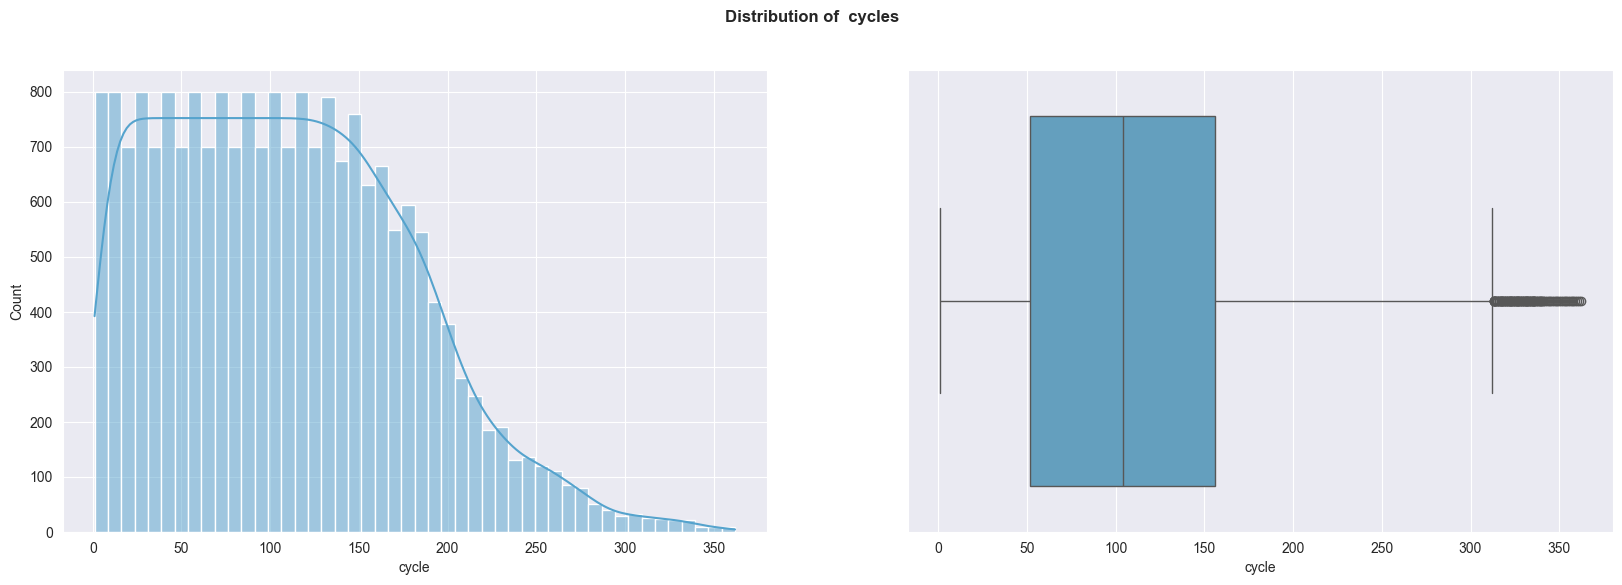

In [7]:
 # Plotting a histogram of cycle of the data
fig , ax = plt.subplots( 1 , 2 , figsize = ( 20 , 6 ) )
sns.histplot( x = 'cycle' ,  data = train_df , kde=True , ax = ax[0])
sns.boxplot( x = 'cycle' , data = train_df , ax = ax[1])

plt.suptitle('Distribution of  cycles' , fontweight = 'bold')

plt.show()

From the graph we can see that the cycles have a mostly univariate distibution from 0 to 150 then the counts start to dip.

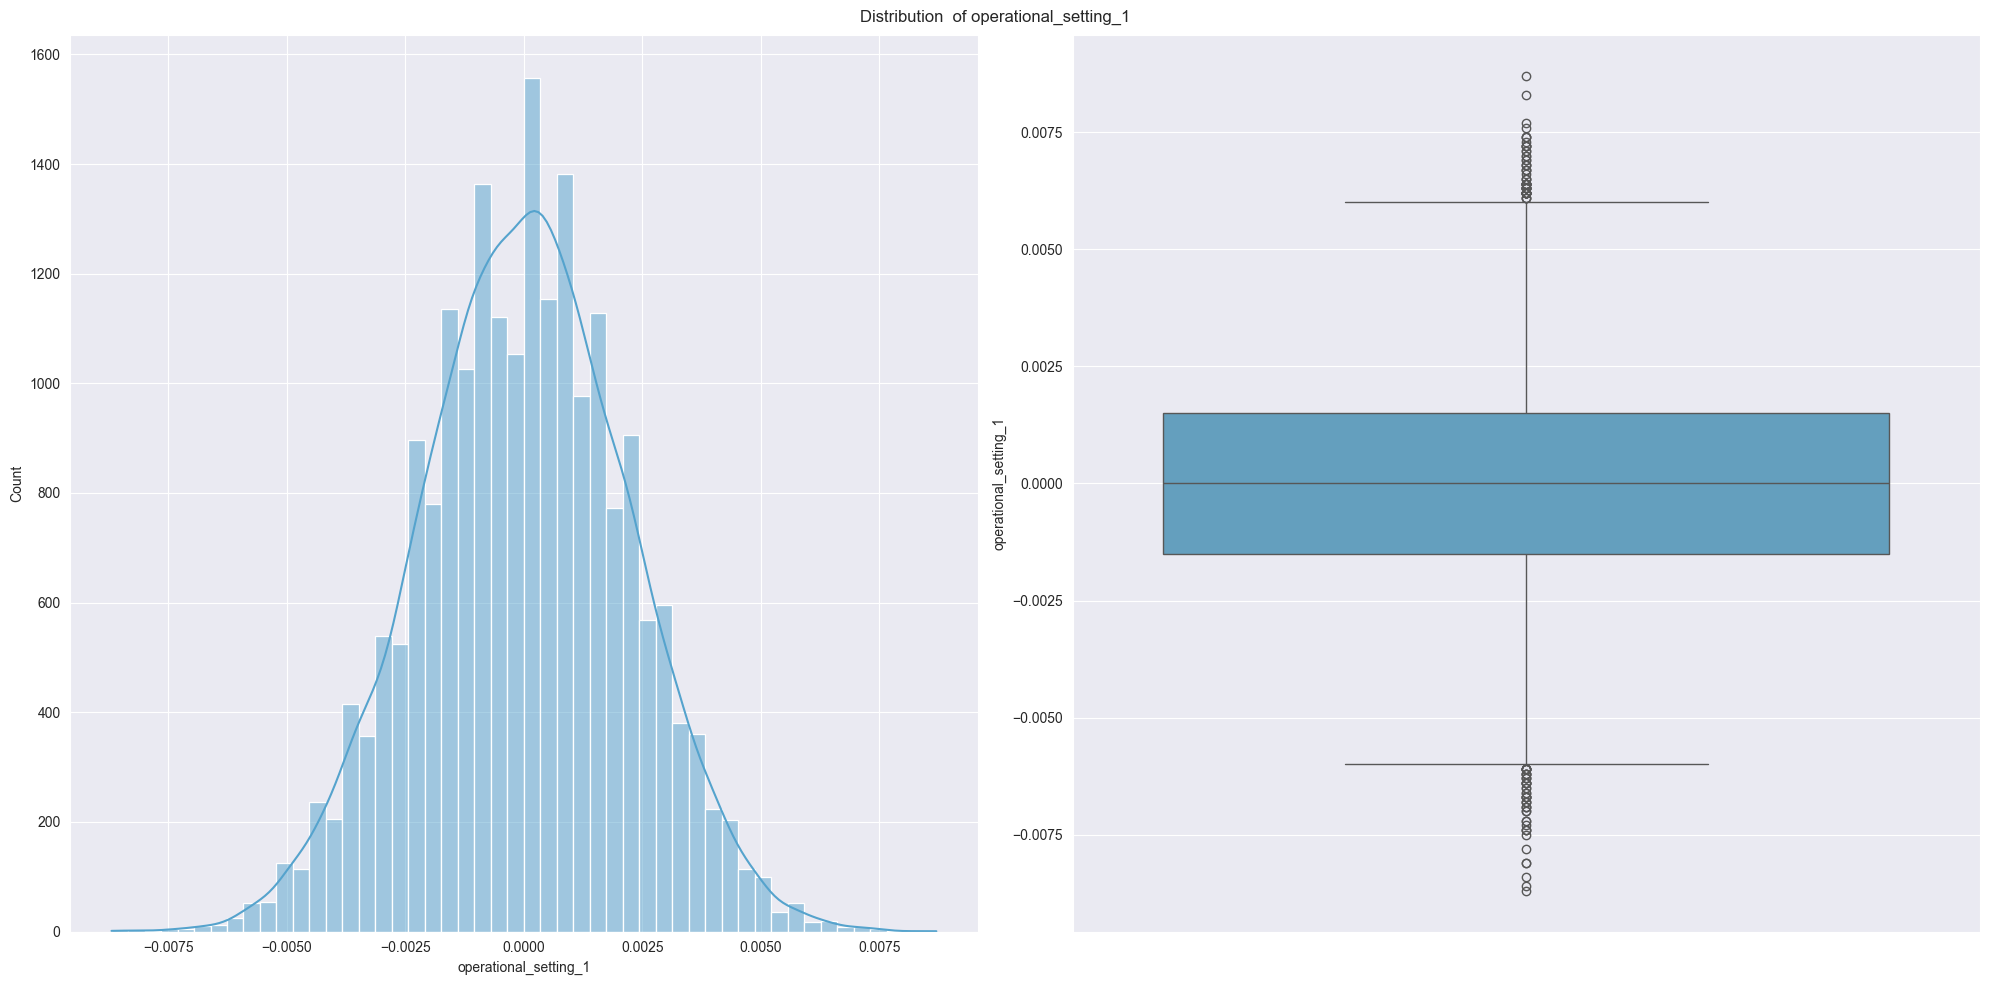

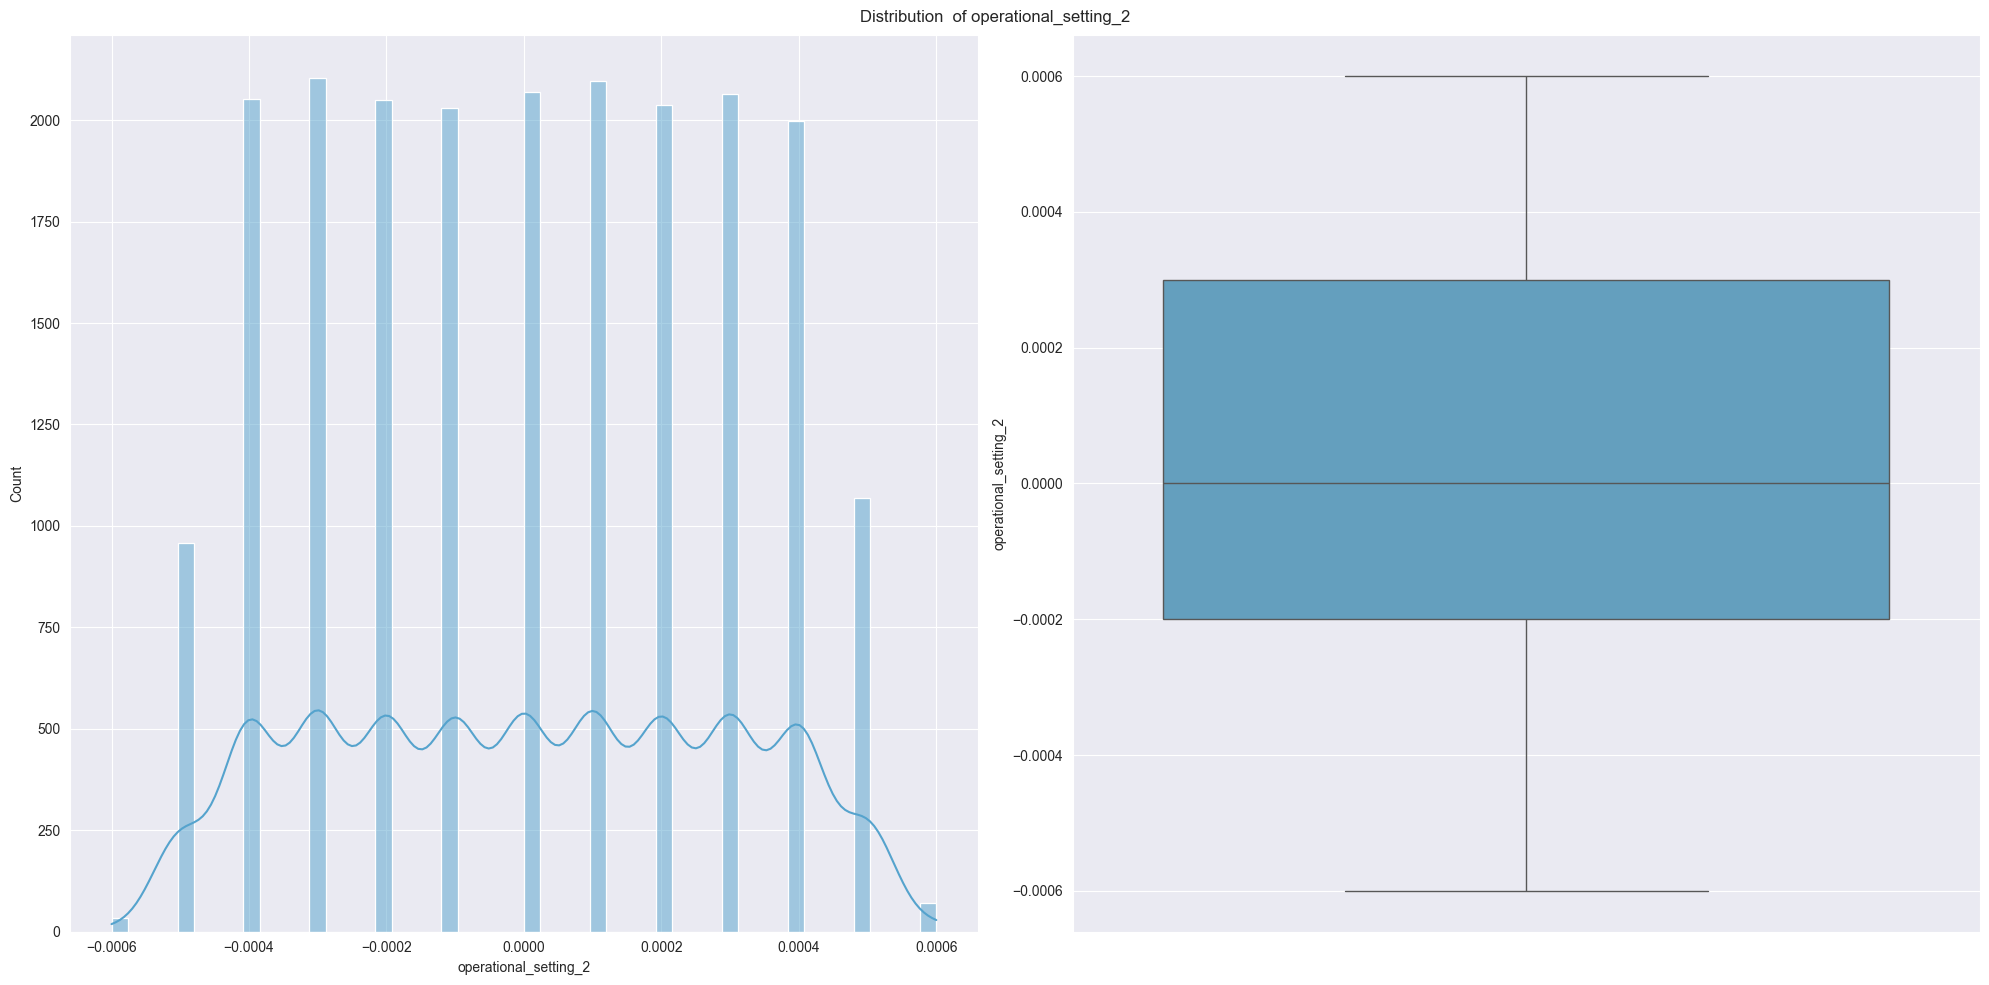

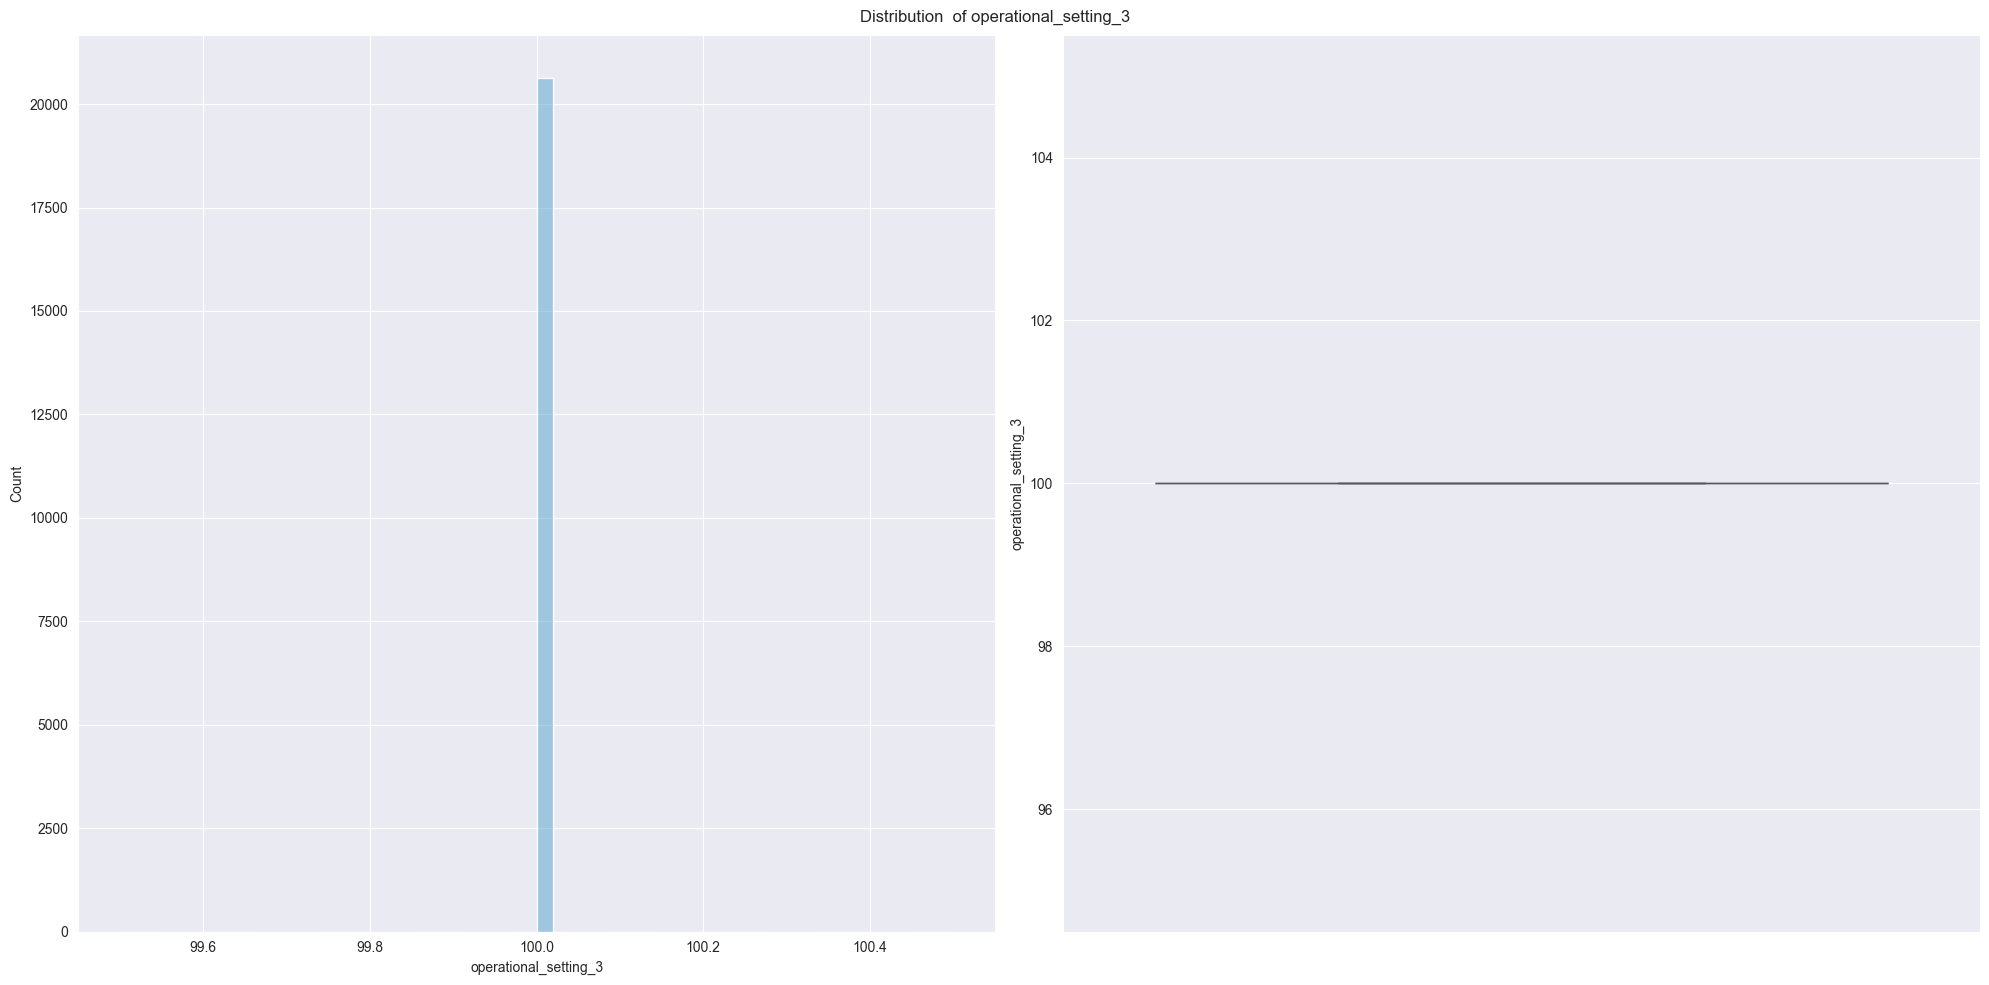

In [8]:
 # Plotting a histogram of operation settings of the data
oper_sett_col = train_df.iloc[:, 2:5]

for col in oper_sett_col.columns:
    fig , ax = plt.subplots( 1 , 2 , figsize = ( 20 , 10 ) )
    sns.histplot(oper_sett_col[col], kde=True, bins=50, ax = ax[0])
    sns.boxplot( oper_sett_col[col] , ax = ax[1])
    plt.suptitle(f'Distribution  of {col}')
    plt.tight_layout()
    plt.show()

from the graphs we can see that operational setting 1 has a normal distribution and from its box plot there are outliers 
operational settings 2 has a multimodial distribution whhich may indicate.I will then move plot the distribution of the operational_settings_2 for sample engines. 

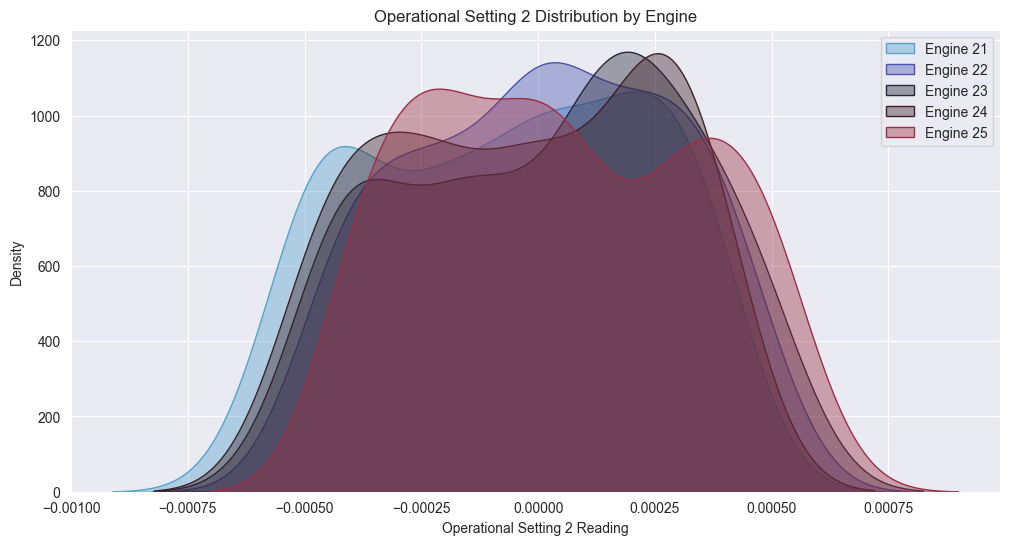

In [18]:
# Optional: pick a few engine_ids to avoid clutter
sample_engines = train_df['engine_id'].unique()[20:25]

plt.figure(figsize=(12, 6))

for engine in sample_engines:
    subset = train_df[train_df['engine_id'] == engine]
    sns.kdeplot(subset['operational_setting_2'], label=f'Engine {engine}', fill=True, alpha=0.4)

plt.title("Operational Setting 2 Distribution by Engine")
plt.xlabel("Operational Setting 2 Reading")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

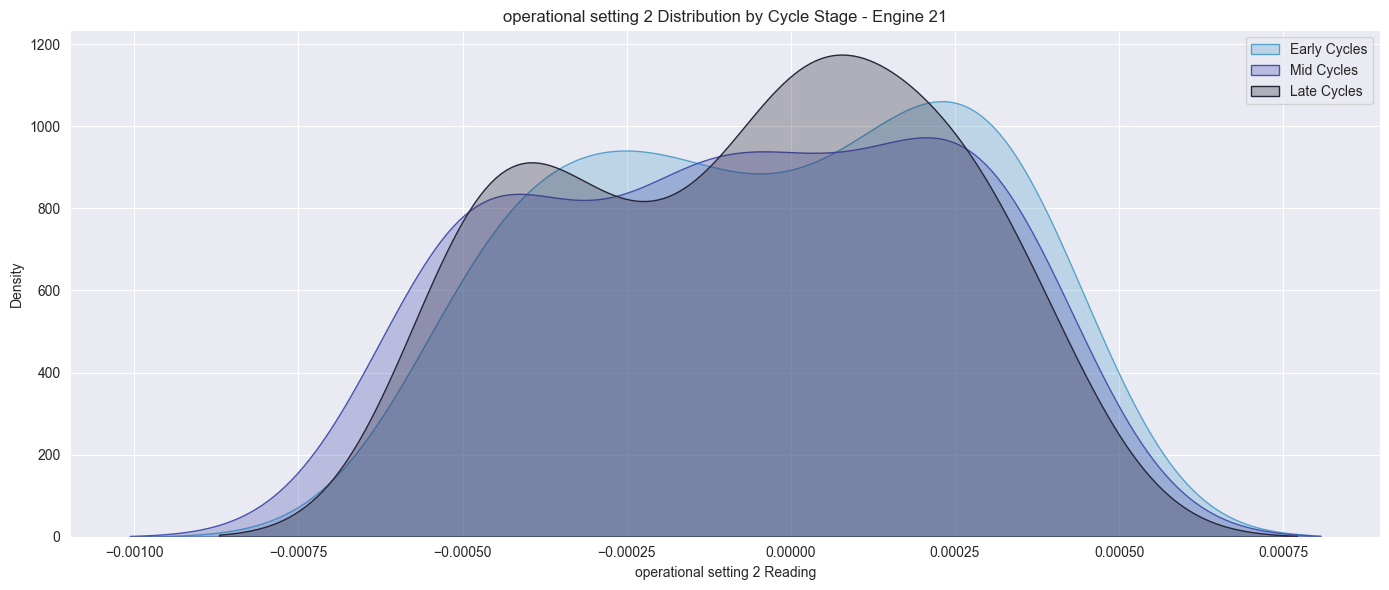

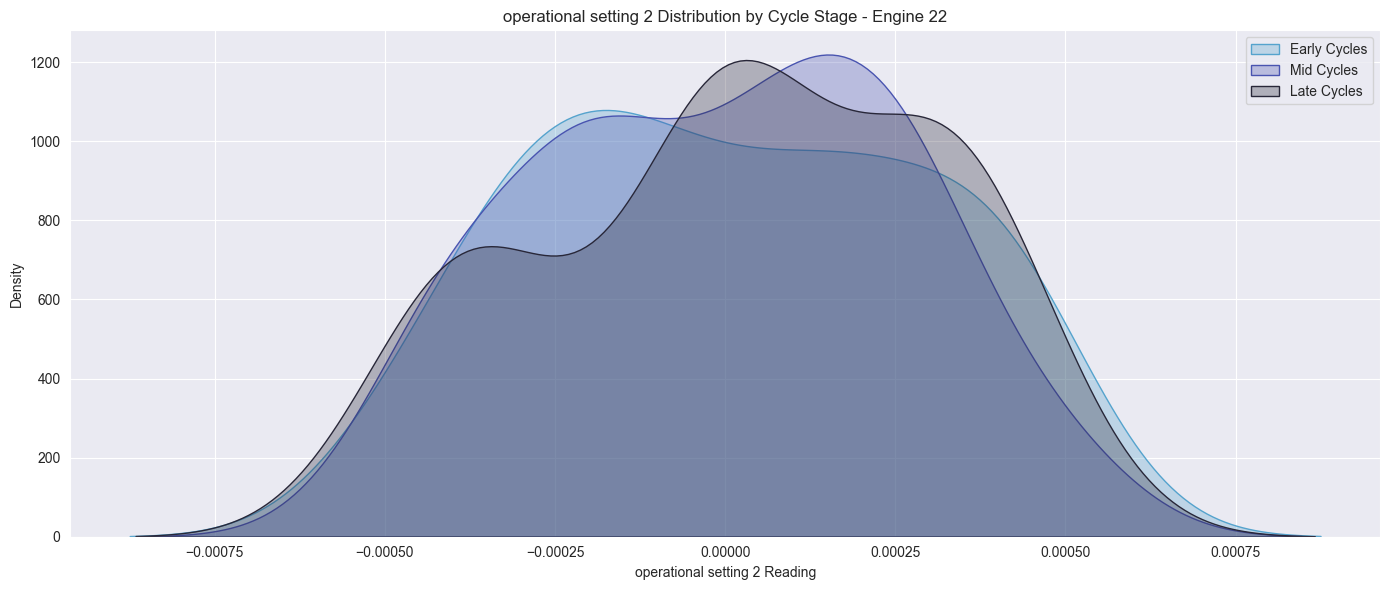

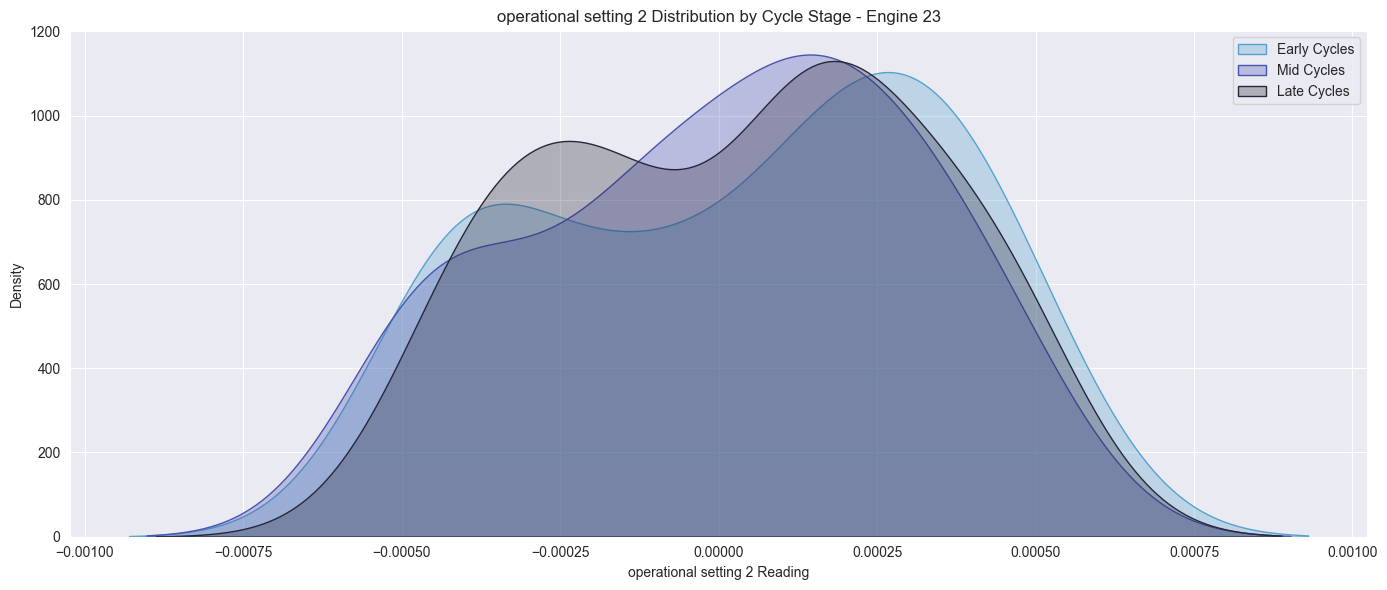

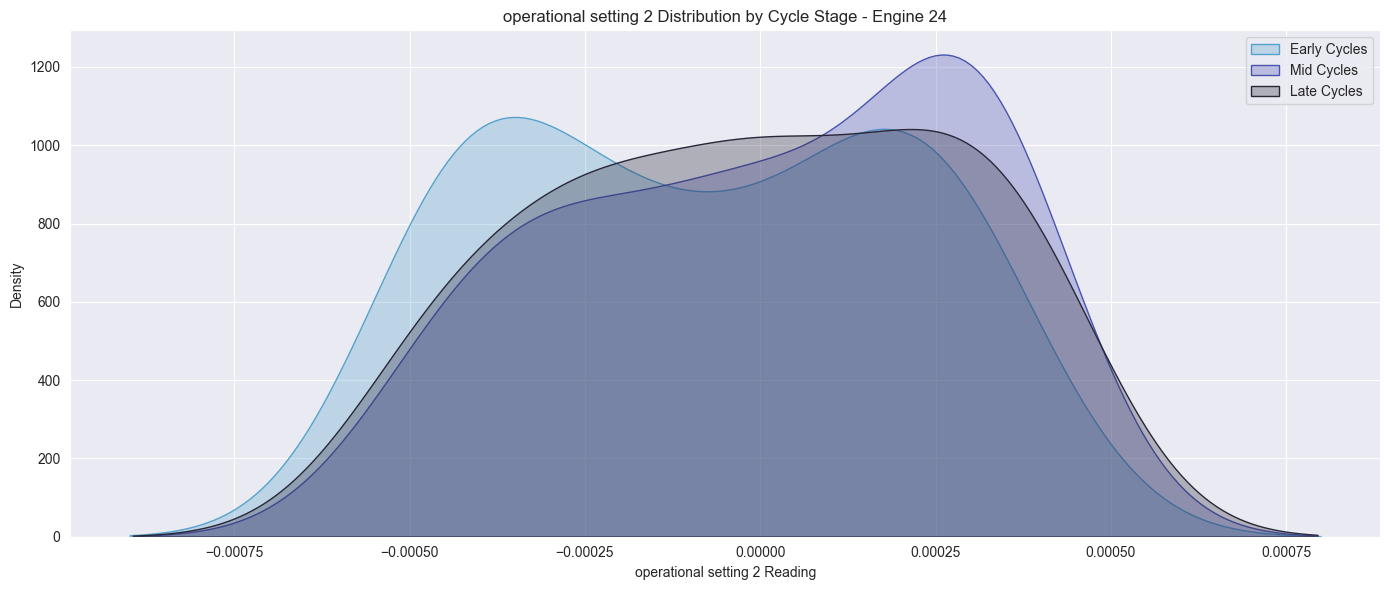

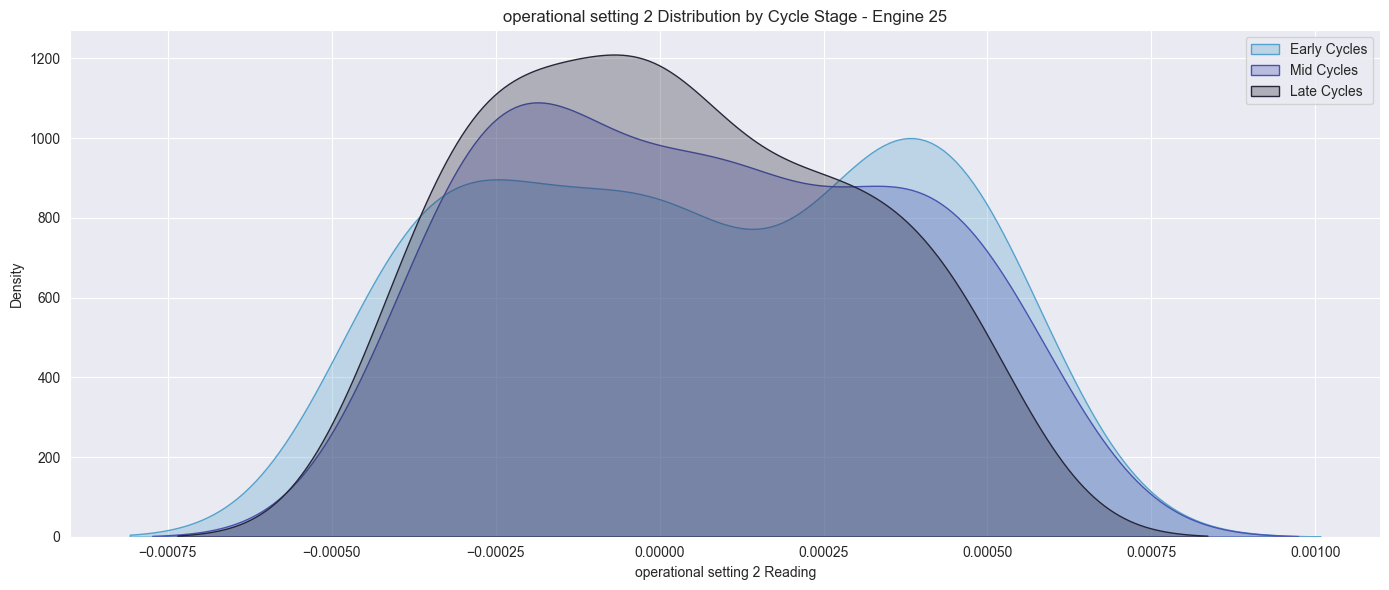

In [17]:
for engine in sample_engines:
    engine_df = train_df[train_df['engine_id'] == engine]
    max_cycle = engine_df['cycle'].max()

    # Define cycle bins: early (0–33%), mid (34–66%), late (67–100%)
    bins = [1, int(max_cycle * 0.33), int(max_cycle * 0.66), max_cycle]
    labels = ['Early', 'Mid', 'Late']

    # Plot
    plt.figure(figsize=(14, 6))
    
    for i in range(3):
        stage_df = engine_df[
            (engine_df['cycle'] >= bins[i]) & 
            (engine_df['cycle'] <= bins[i + 1])
        ]
        setting_data = stage_df['operational_setting_2']
        
        # Plot if there's more than one value (avoid 0 variance issues)
        if setting_data.nunique() > 1:
            sns.kdeplot(setting_data, label=f'{labels[i]} Cycles', fill=True, alpha=0.3)
        elif setting_data.nunique() == 1:
            constant_value = setting_data.iloc[0]
            plt.axvline(x=constant_value, linestyle='--', label=f'{labels[i]} (constant)')
    
    plt.title(f'operational setting 2 Distribution by Cycle Stage - Engine {engine}')
    plt.xlabel('operational setting 2 Reading')
    plt.ylabel('Density')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [9]:
 # Getting max cycle 
max_cycles = train_df.groupby('engine_id')['cycle'].max().to_frame()

display(max_cycles.sort_values(by= 'cycle',ascending=False))
display(max_cycles.describe())


,cycle
engine_id,
69,362
92,341
96,336
67,313
83,293
...,...
58,147
70,137
57,137


,cycle
count,100.000000
mean,206.310000
std,46.342749
min,128.000000
25%,177.000000
50%,199.000000
75%,229.250000
max,362.000000


From the output we can see that engine 69 has the highest number of cycles at 362 while egine 39 has the lowest number of cycles at 128.we can see that the mean maximum cycle is 206.31  while the standard deviation 46.34

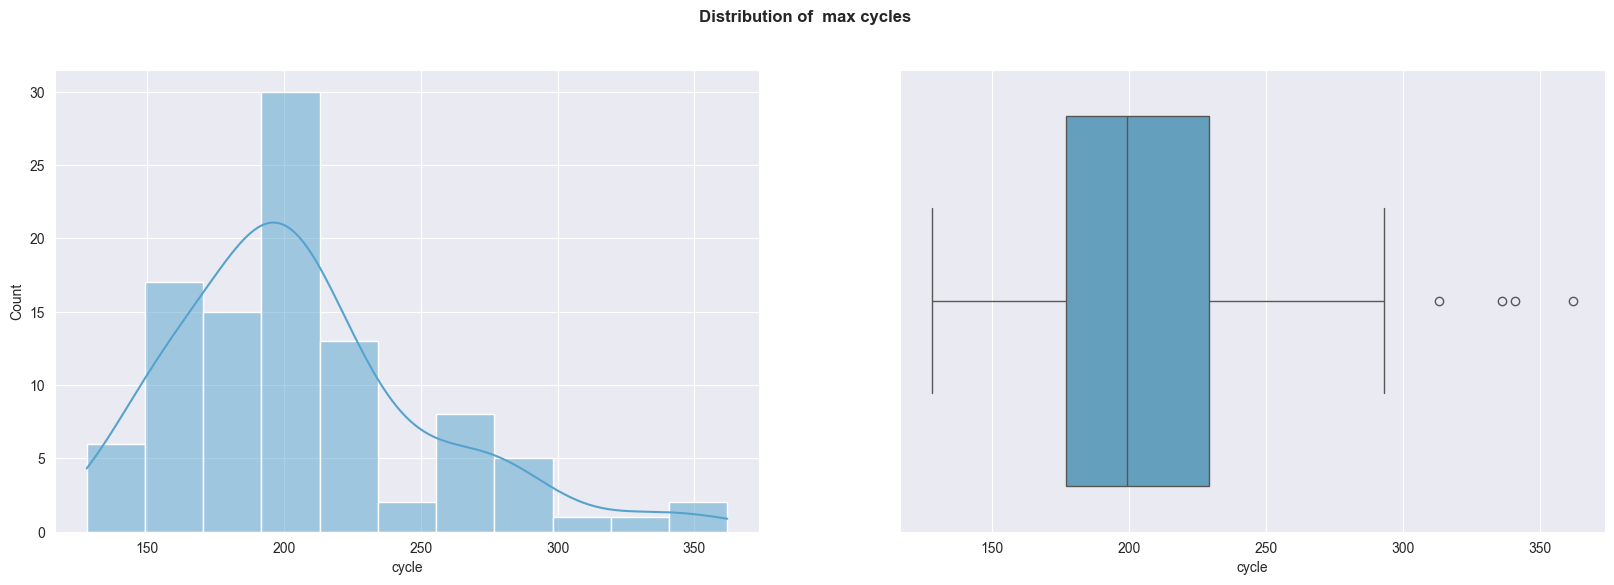

In [10]:
 # Plotting a histogram of max_cycles of the data
fig , ax = plt.subplots( 1 , 2 , figsize = ( 20 , 6 ) )
sns.histplot( x = 'cycle' ,  data = max_cycles , kde=True , ax = ax[0])
sns.boxplot( x = 'cycle' , data = max_cycles , ax = ax[1])

plt.suptitle('Distribution of  max cycles' , fontweight = 'bold')

plt.show()

We can see that the distribution is leftly skewed where most engines have a cycle of 200.from the box plot we can see existance of outliers that have more than 300 cycles 

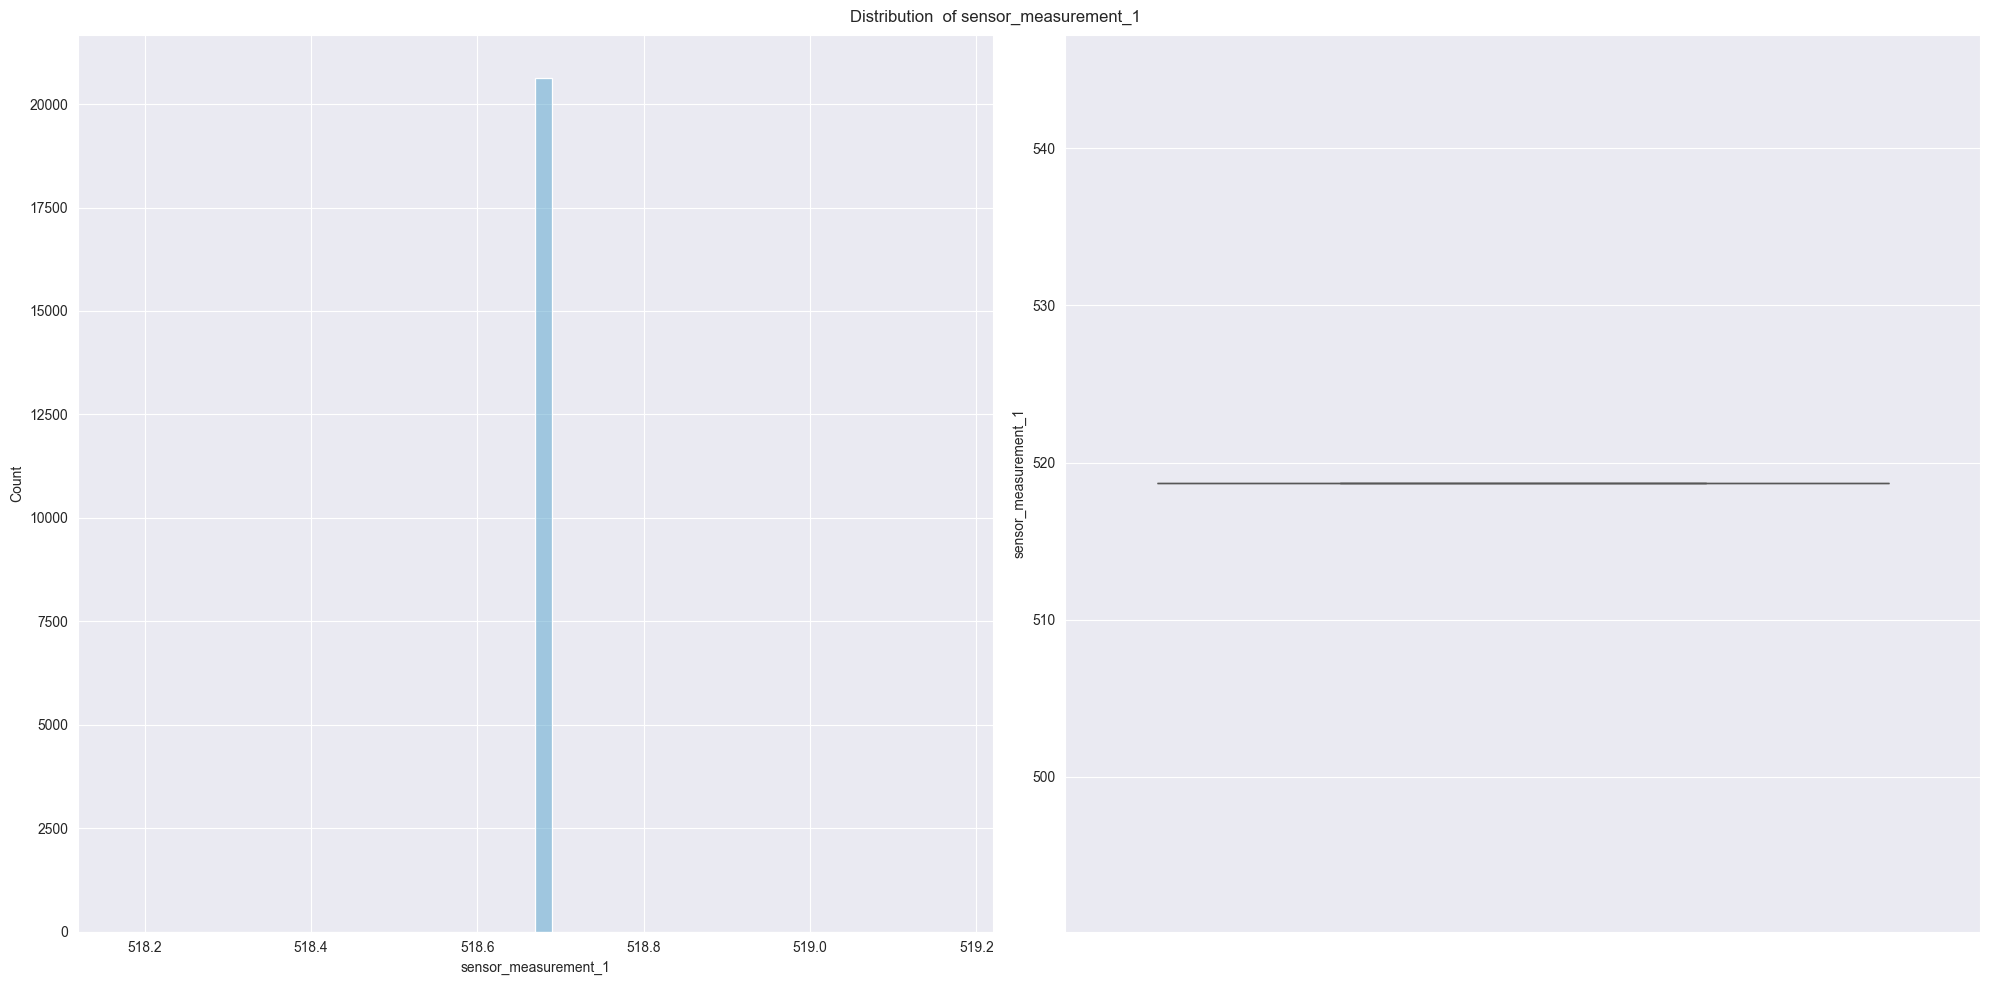

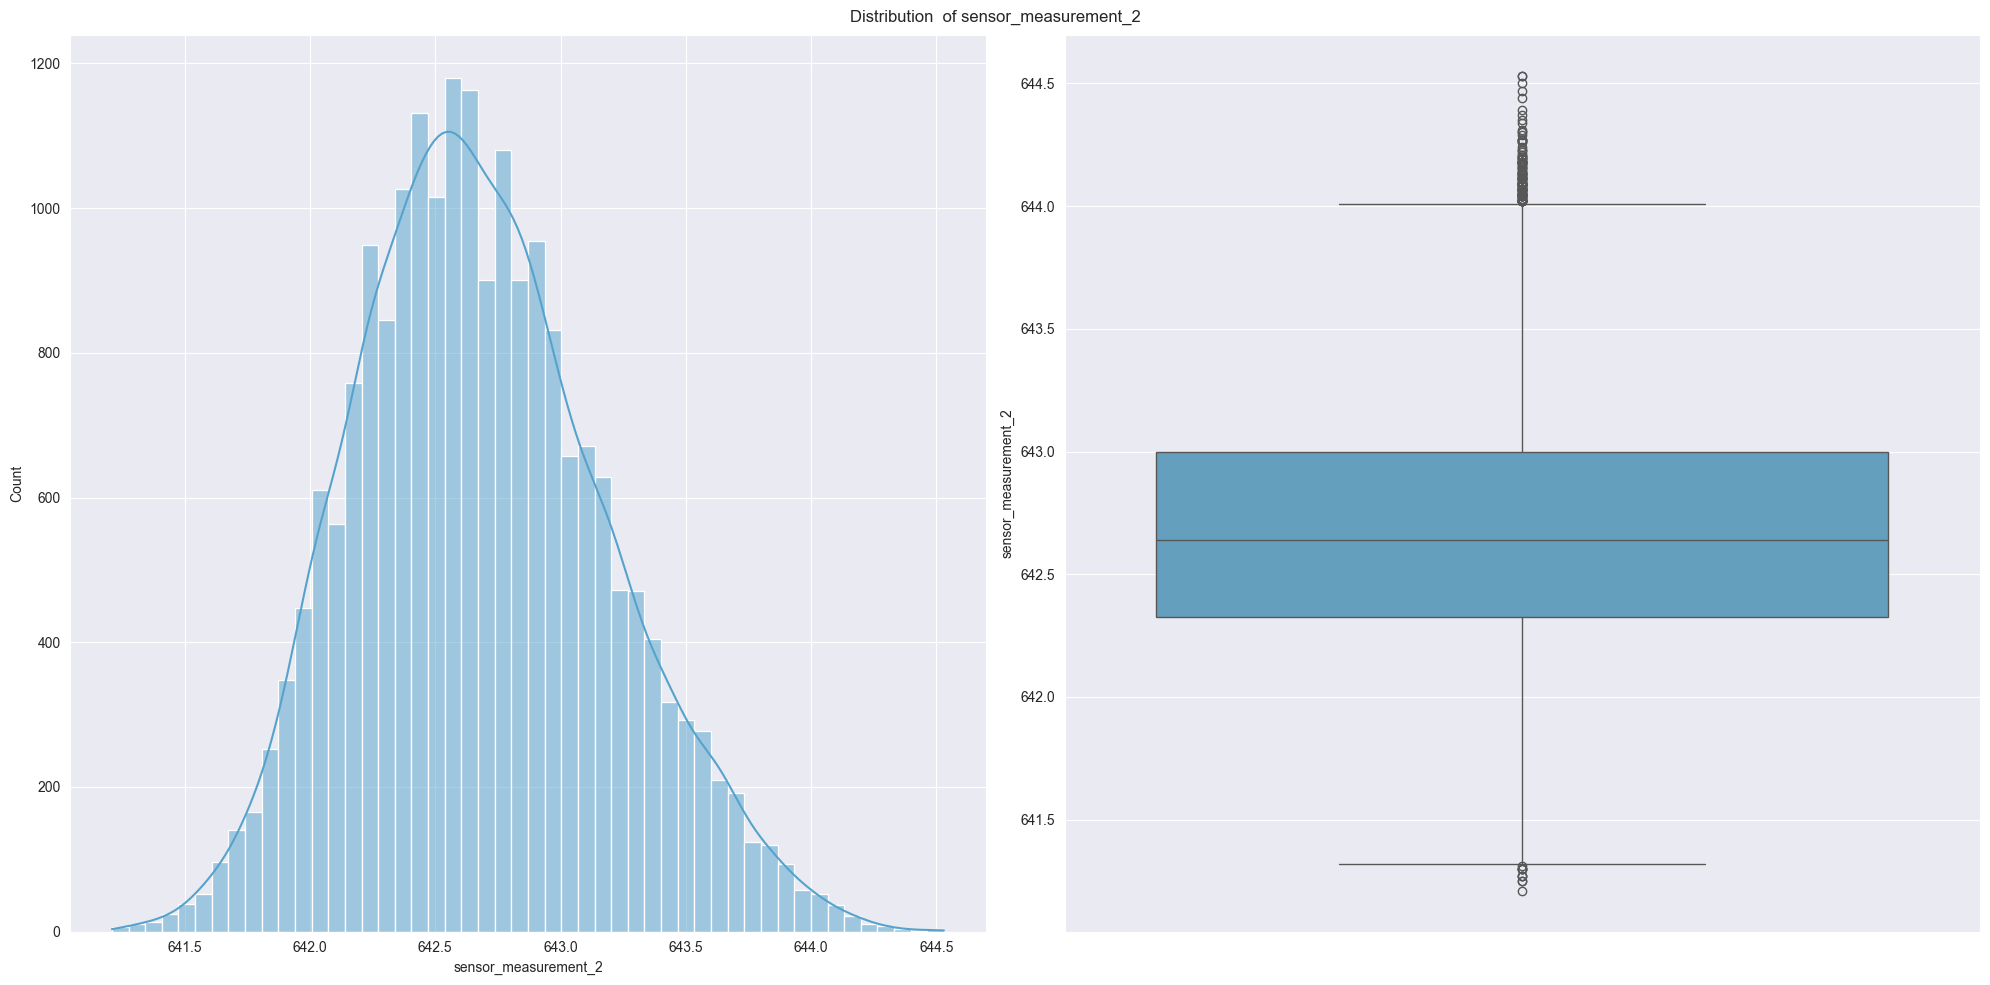

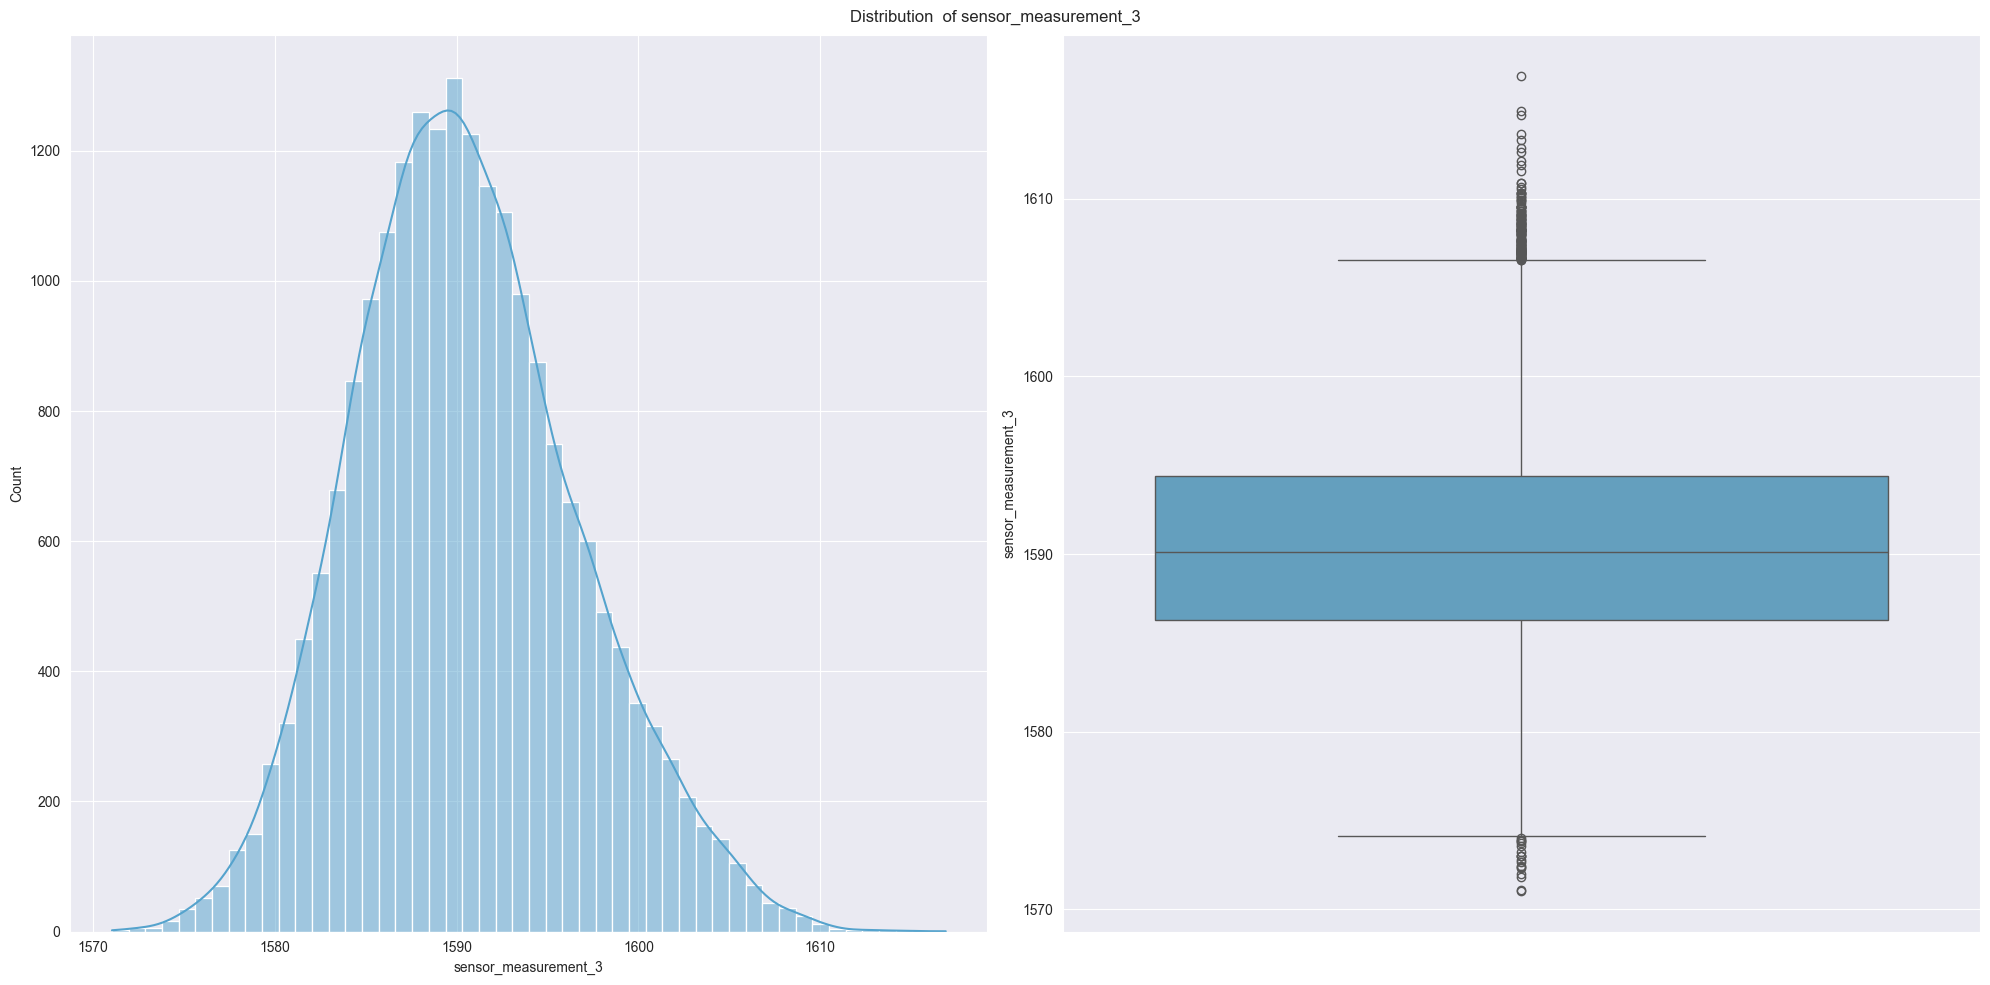

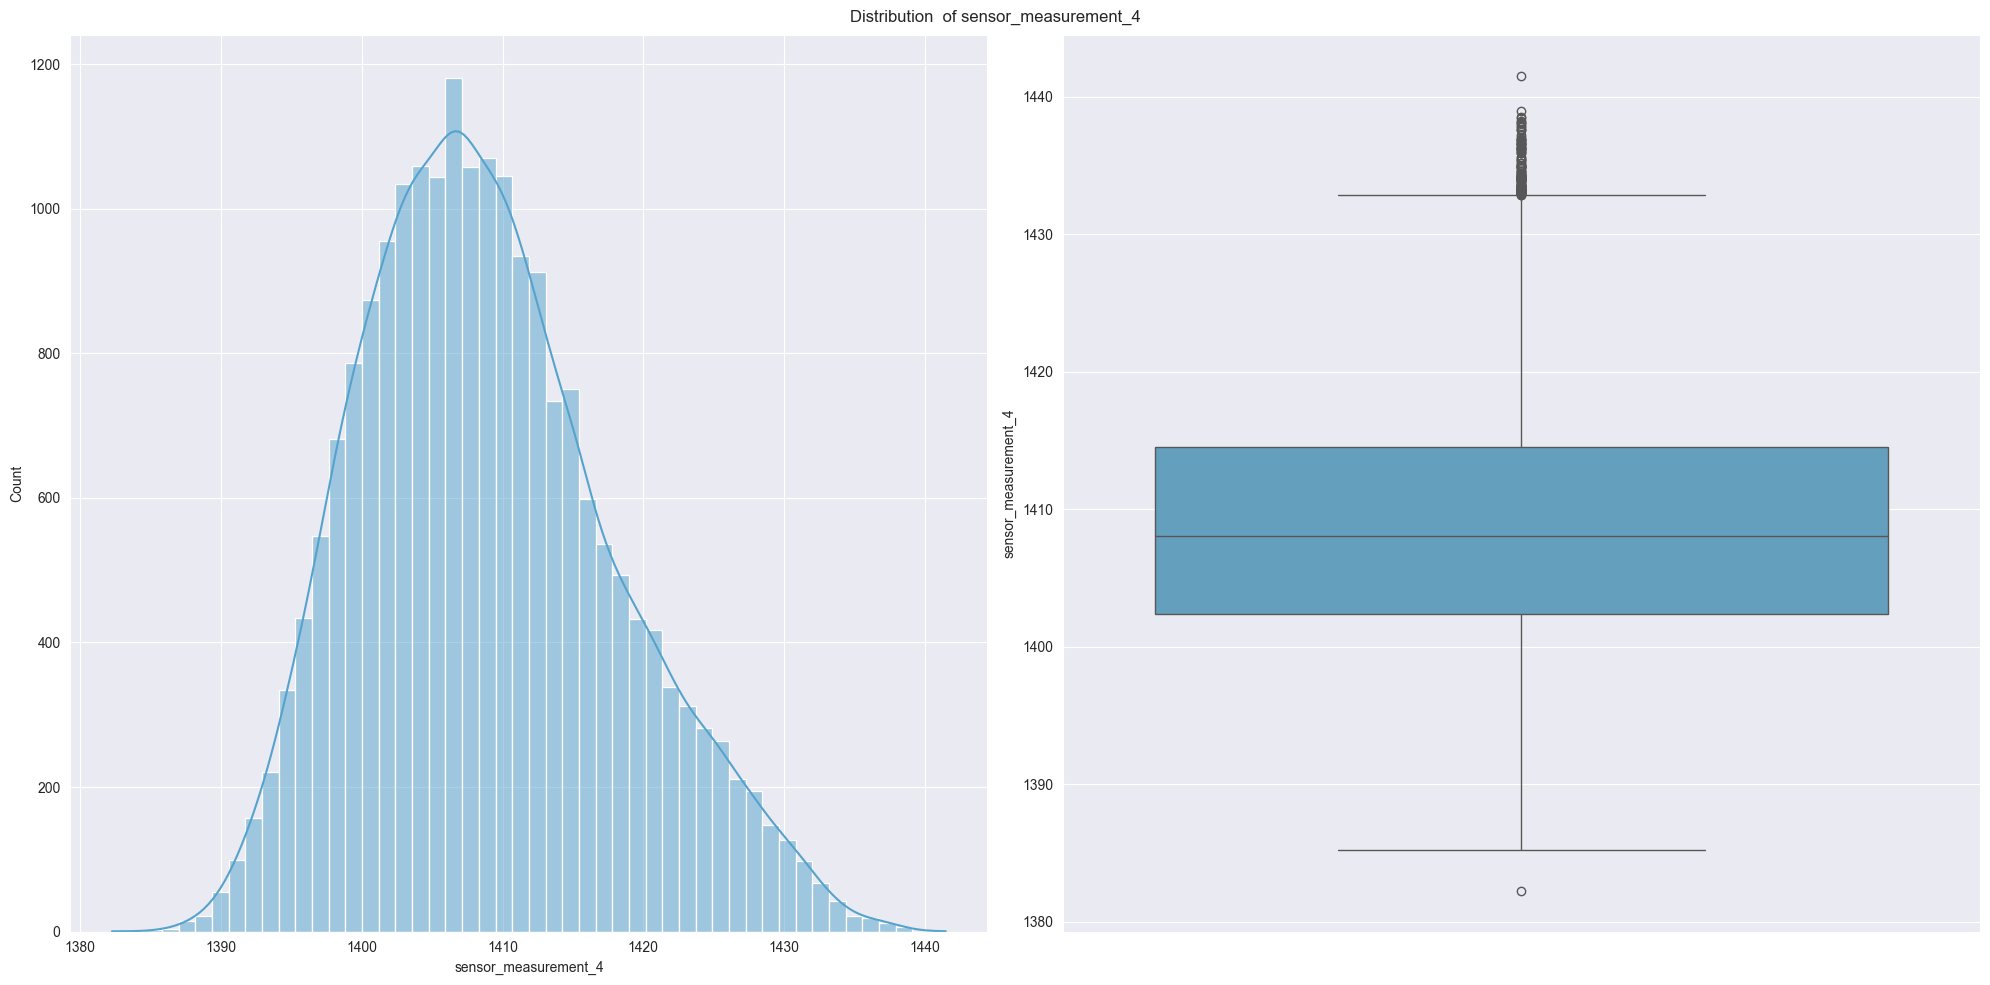

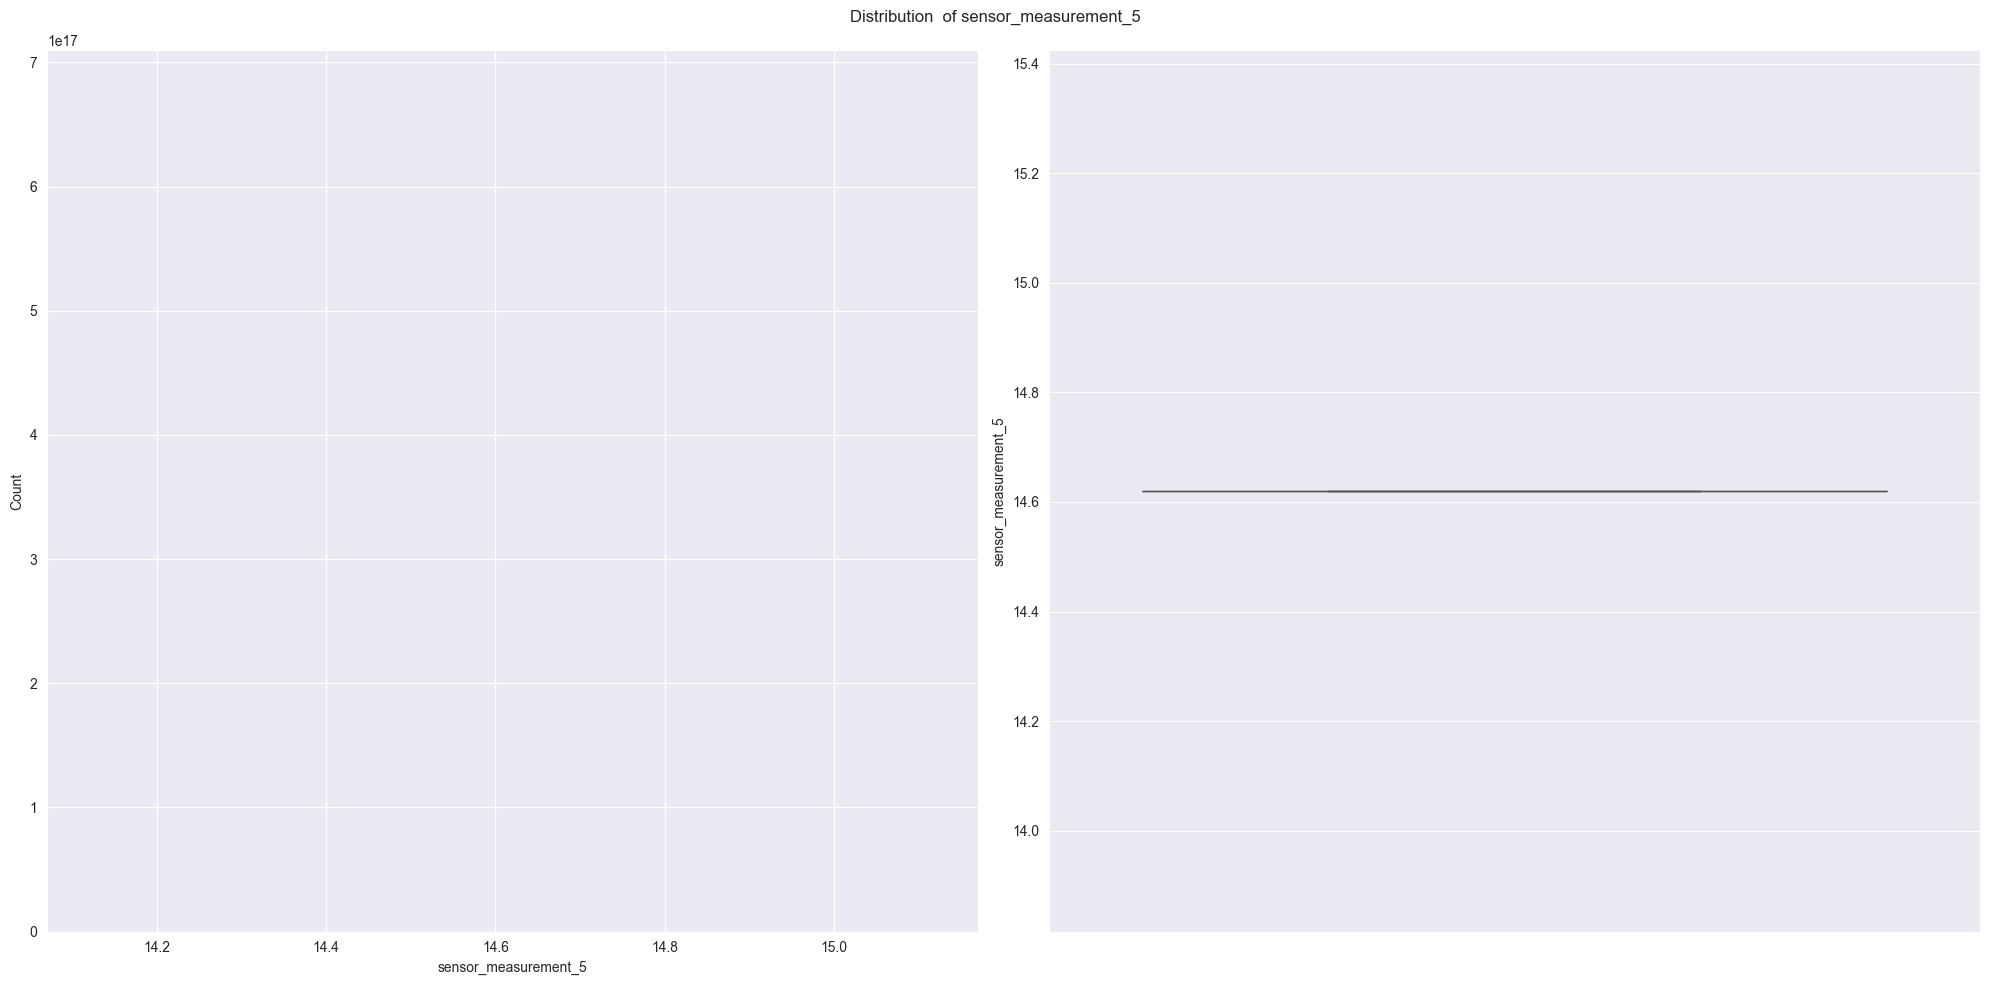

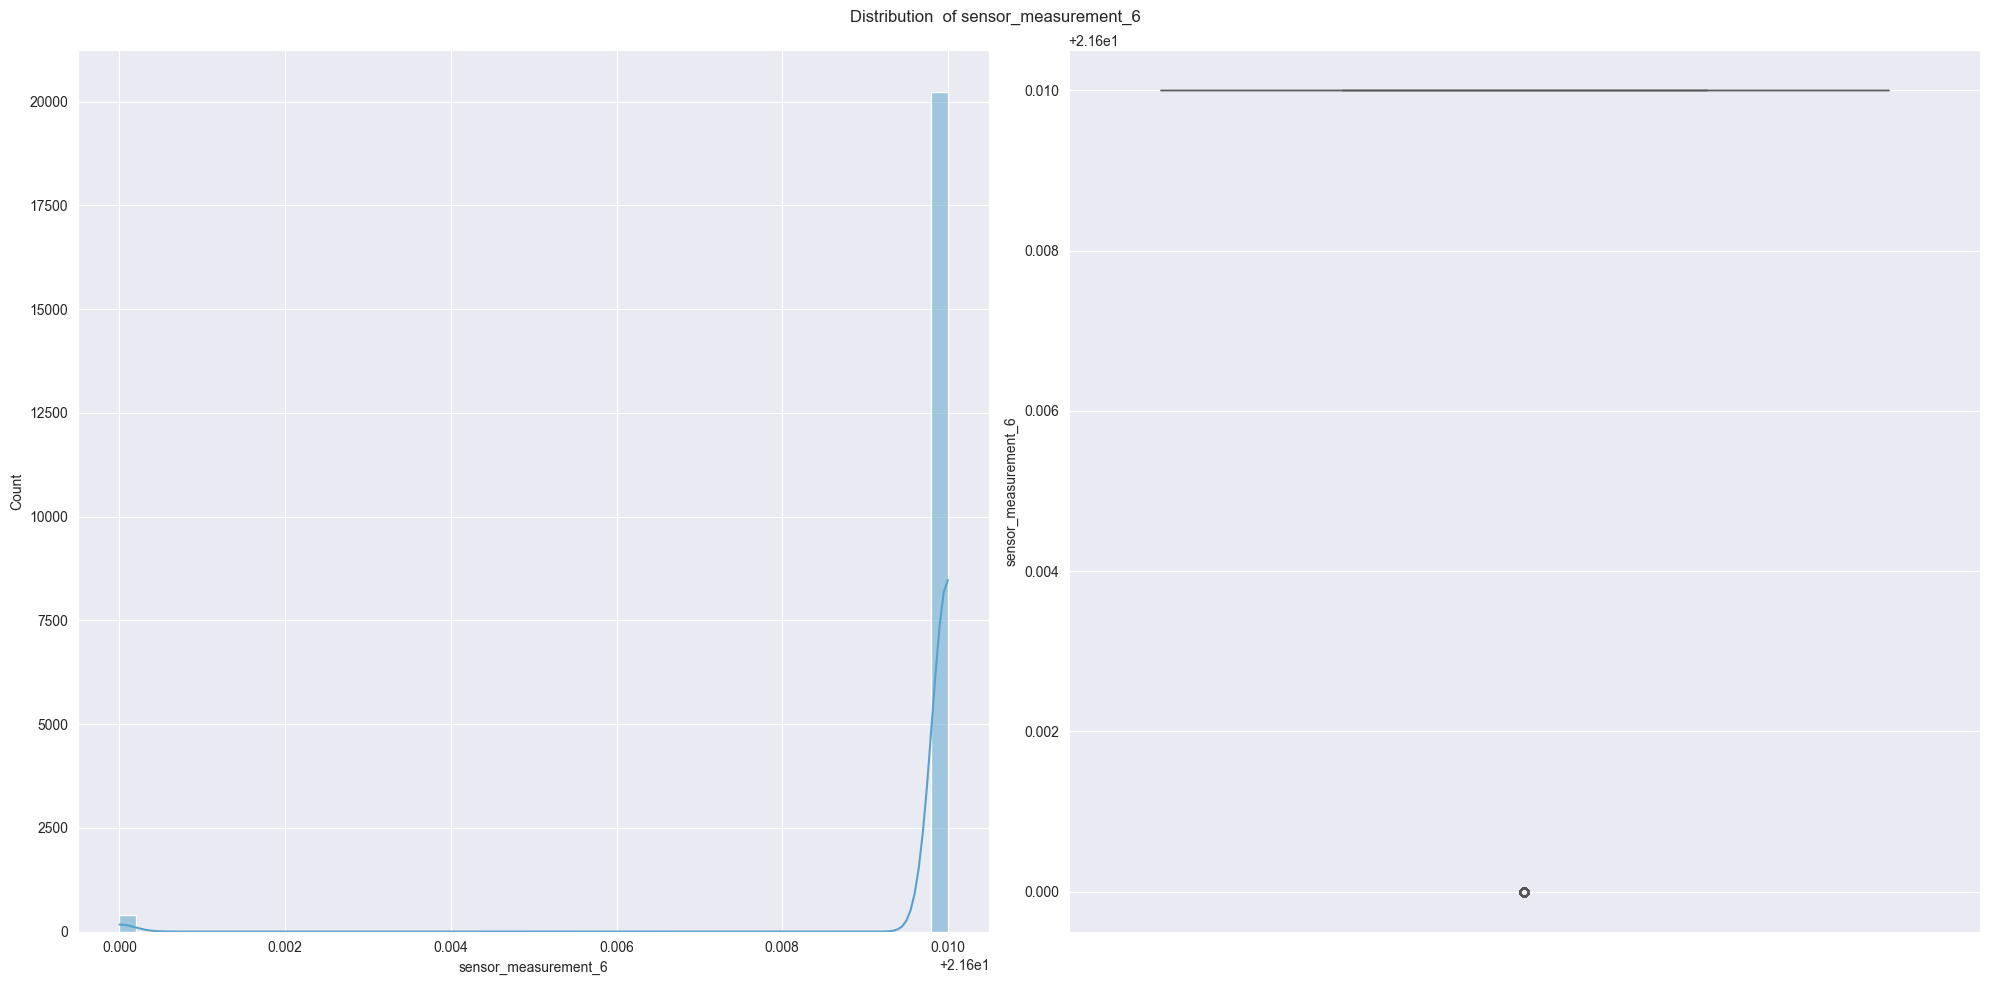

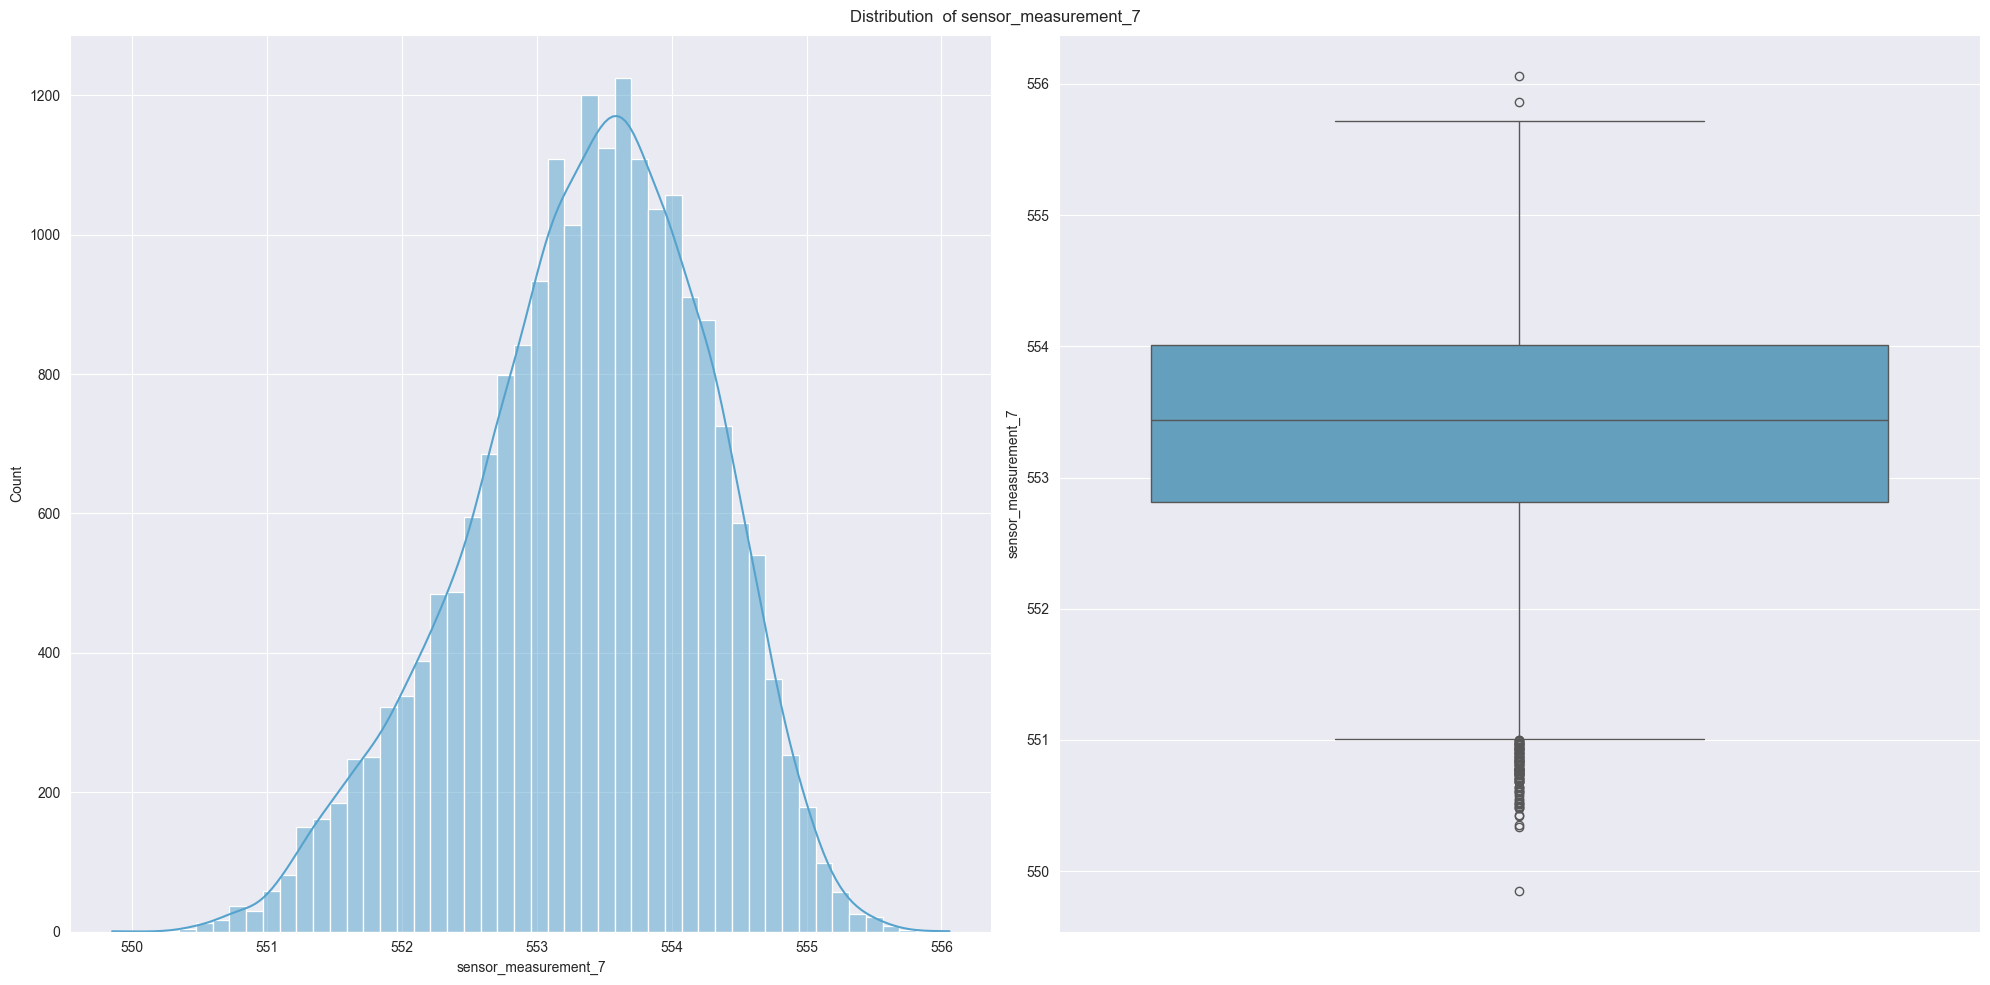

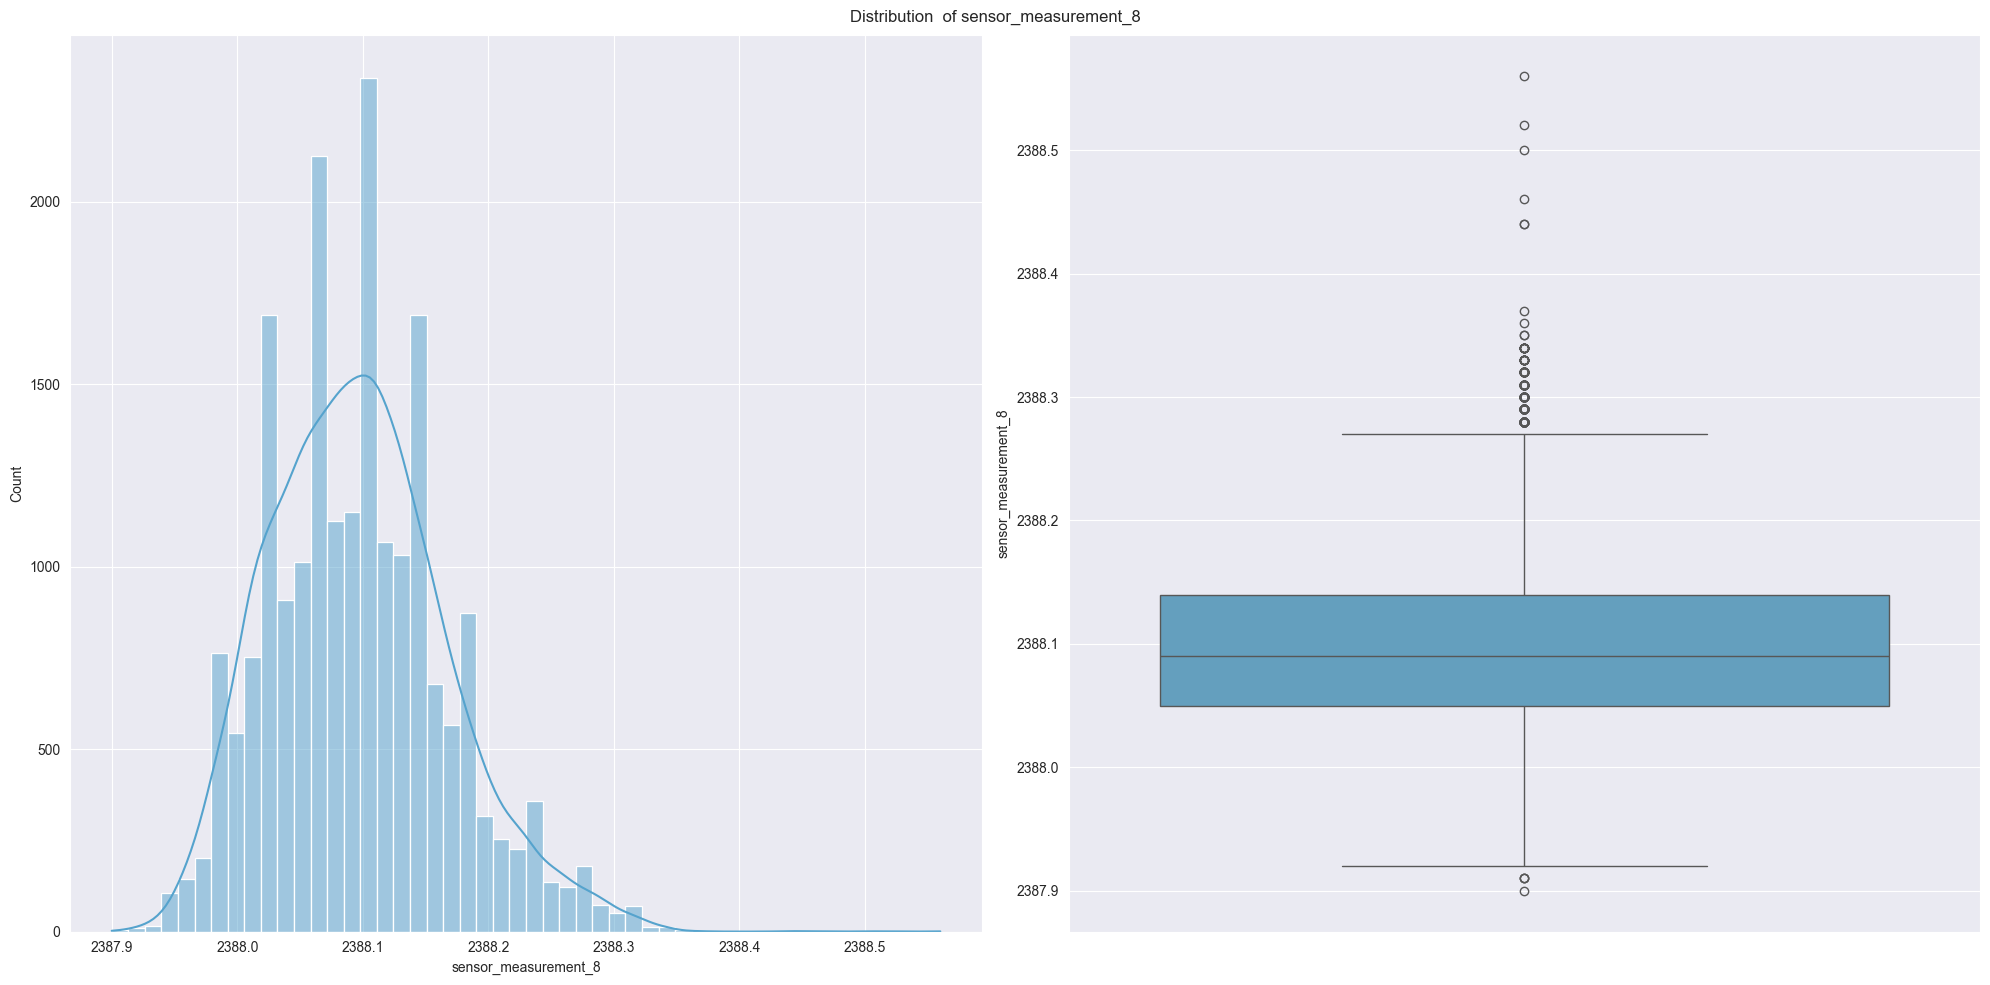

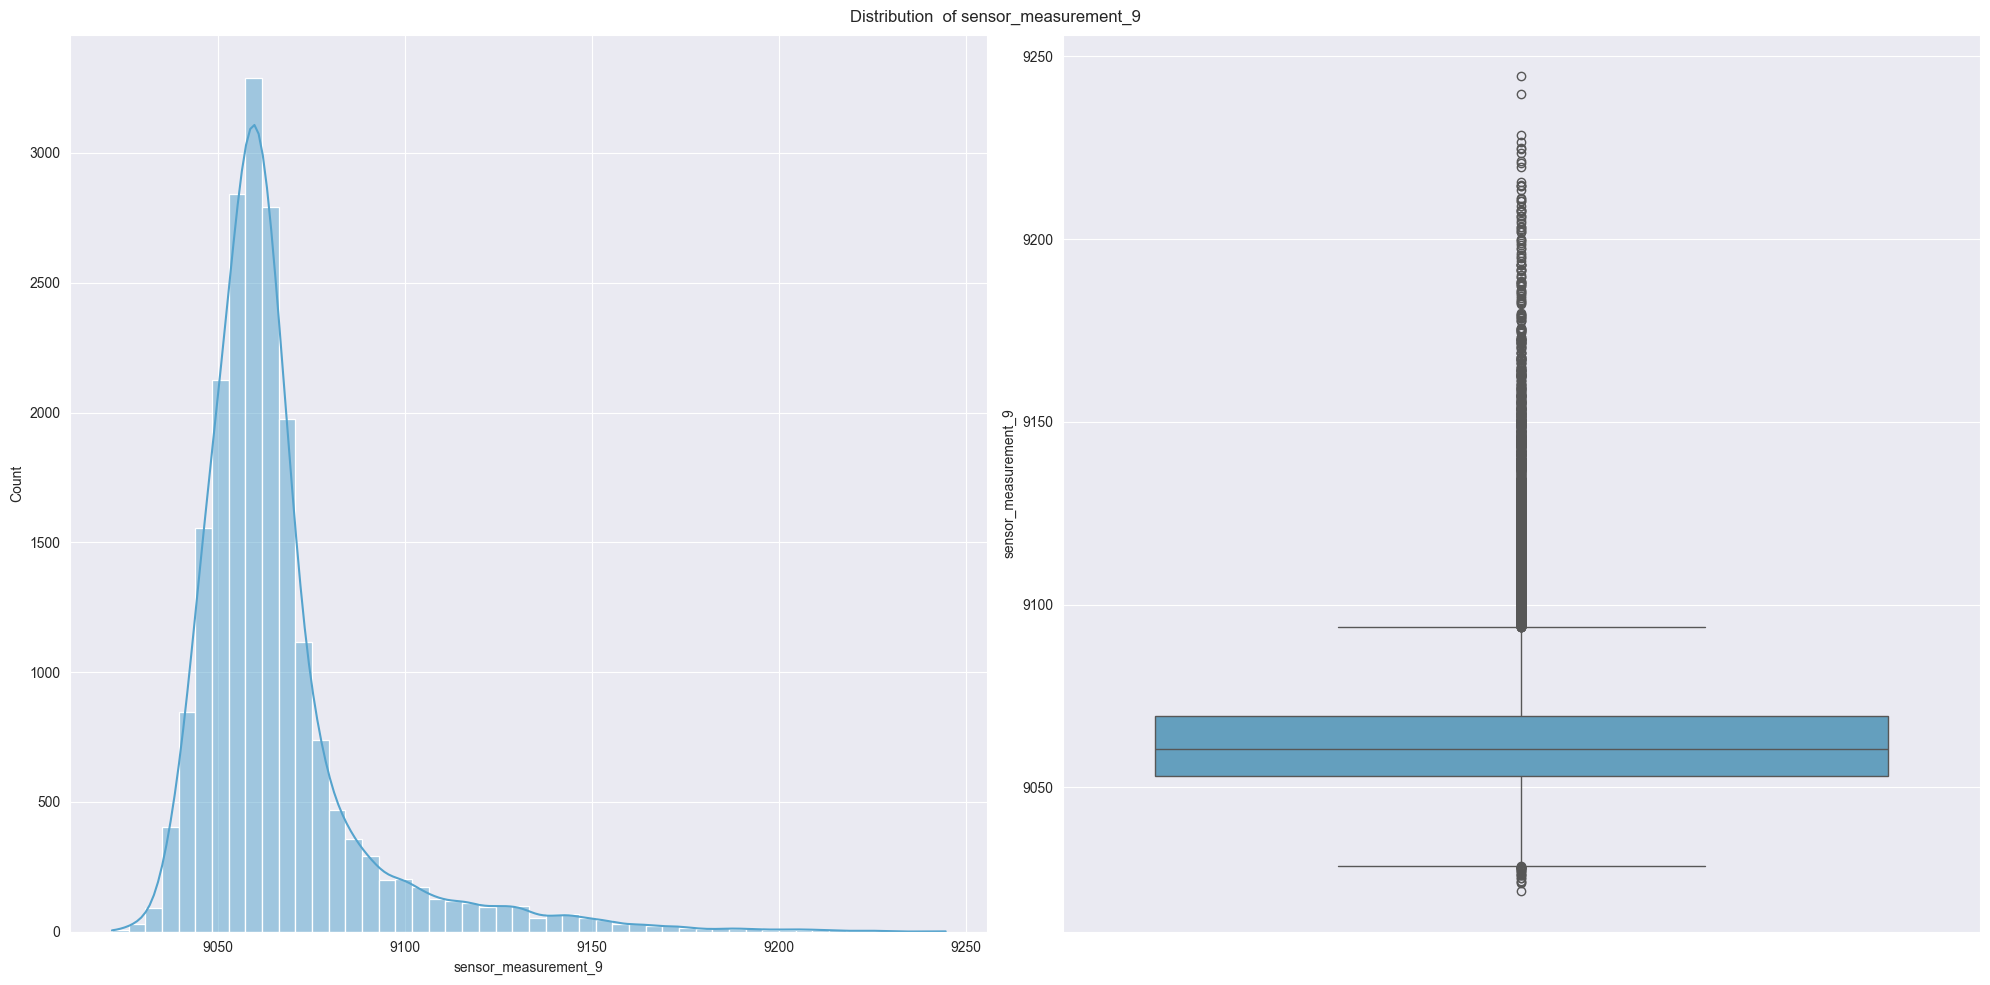

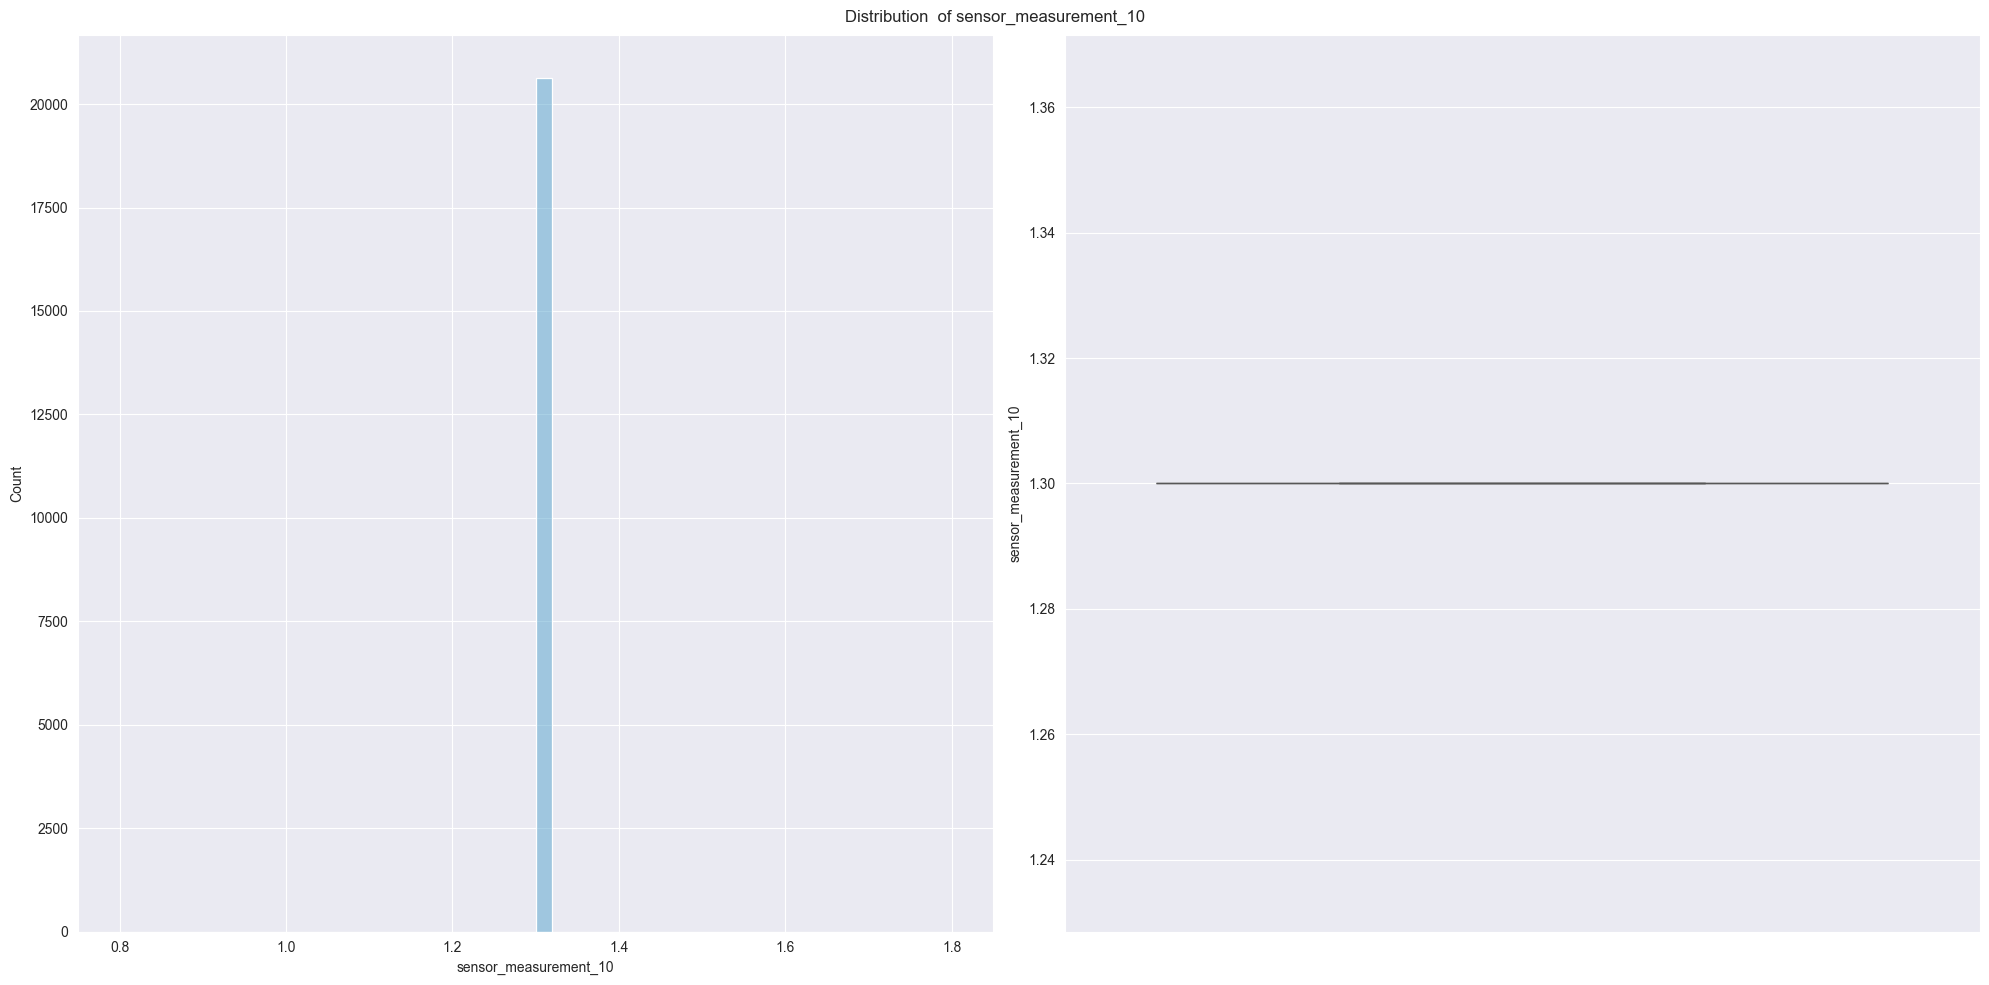

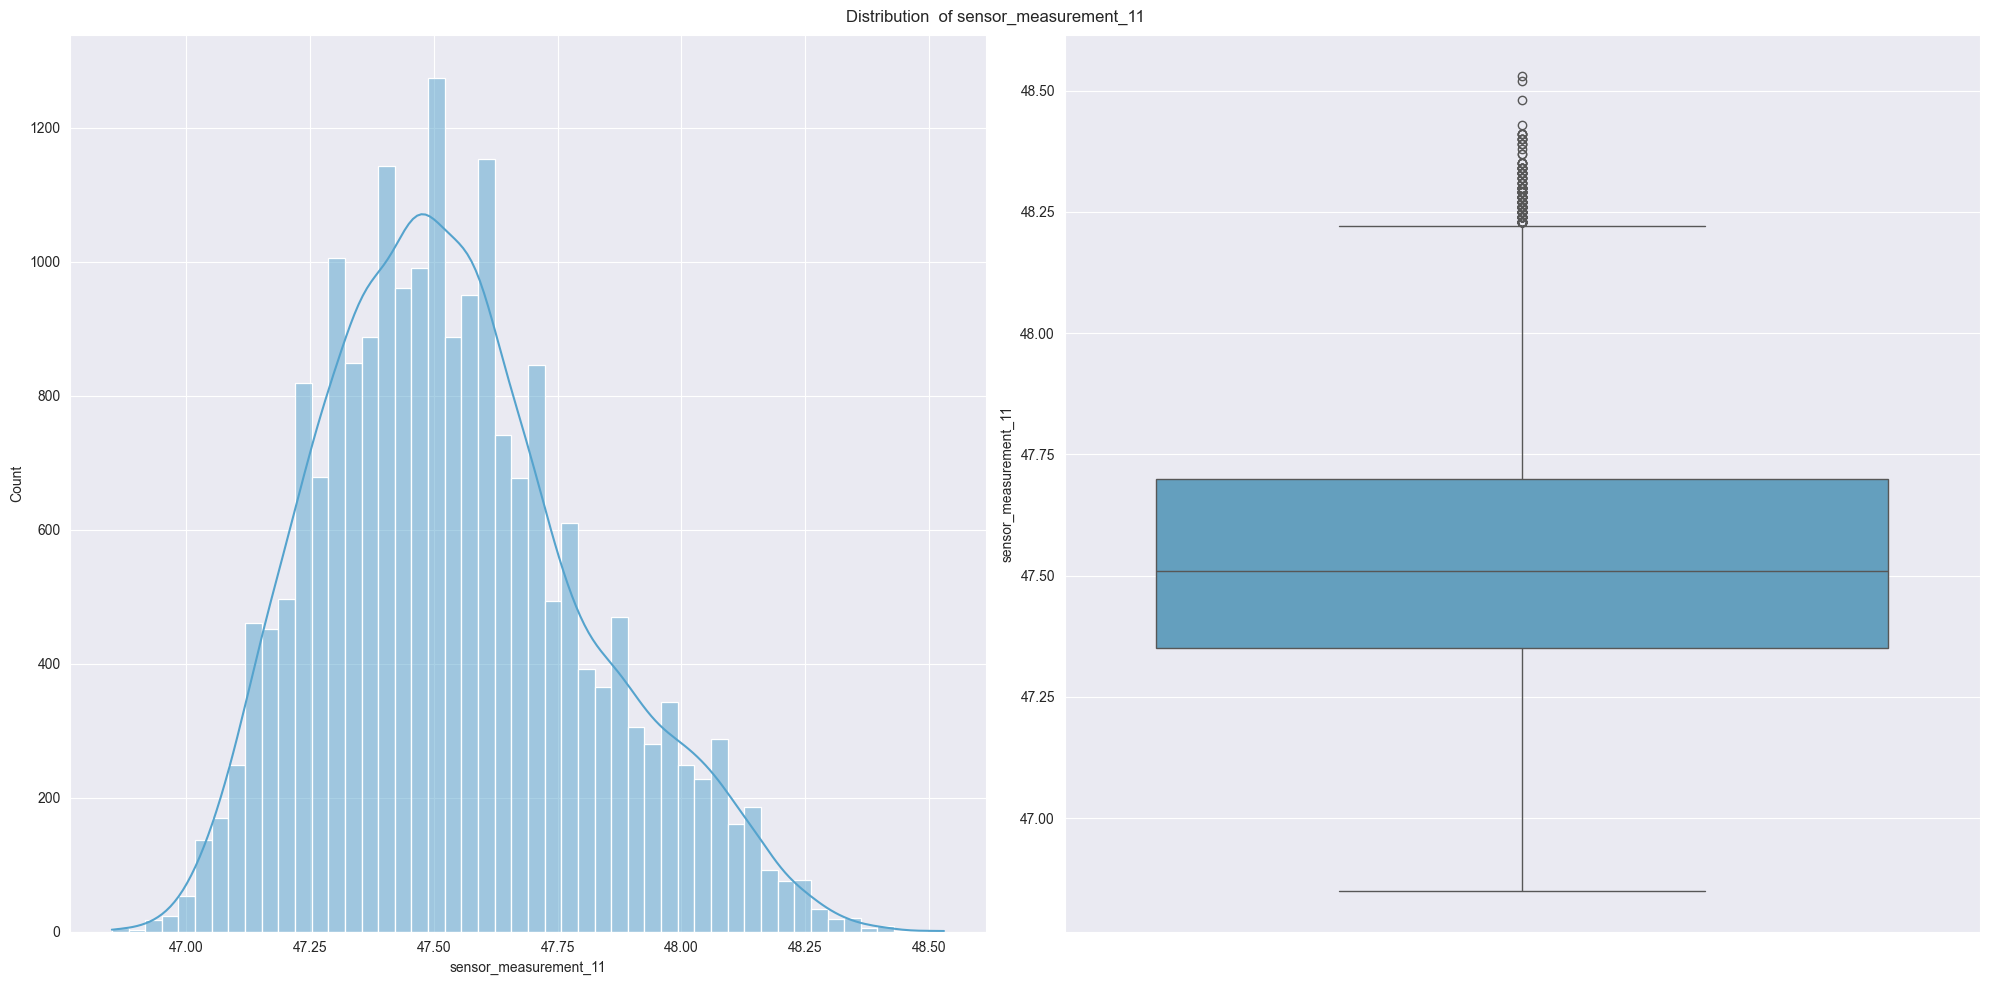

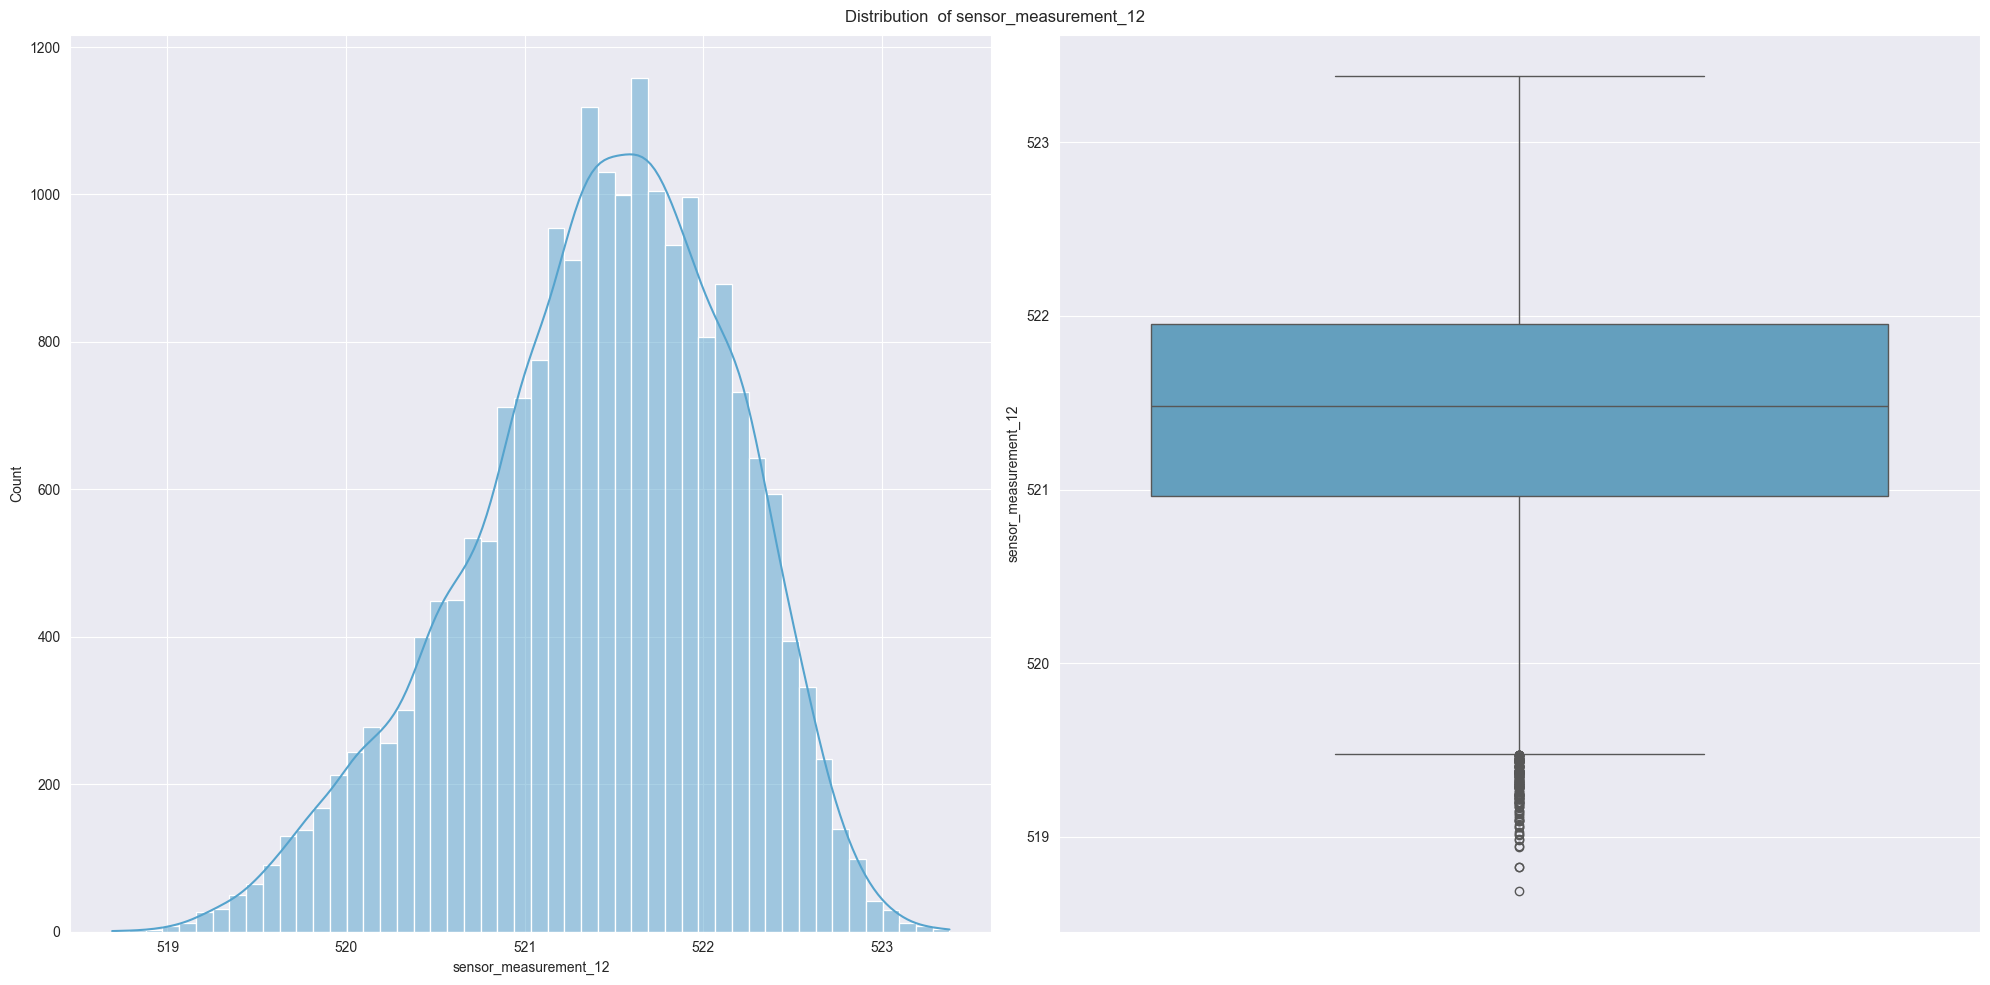

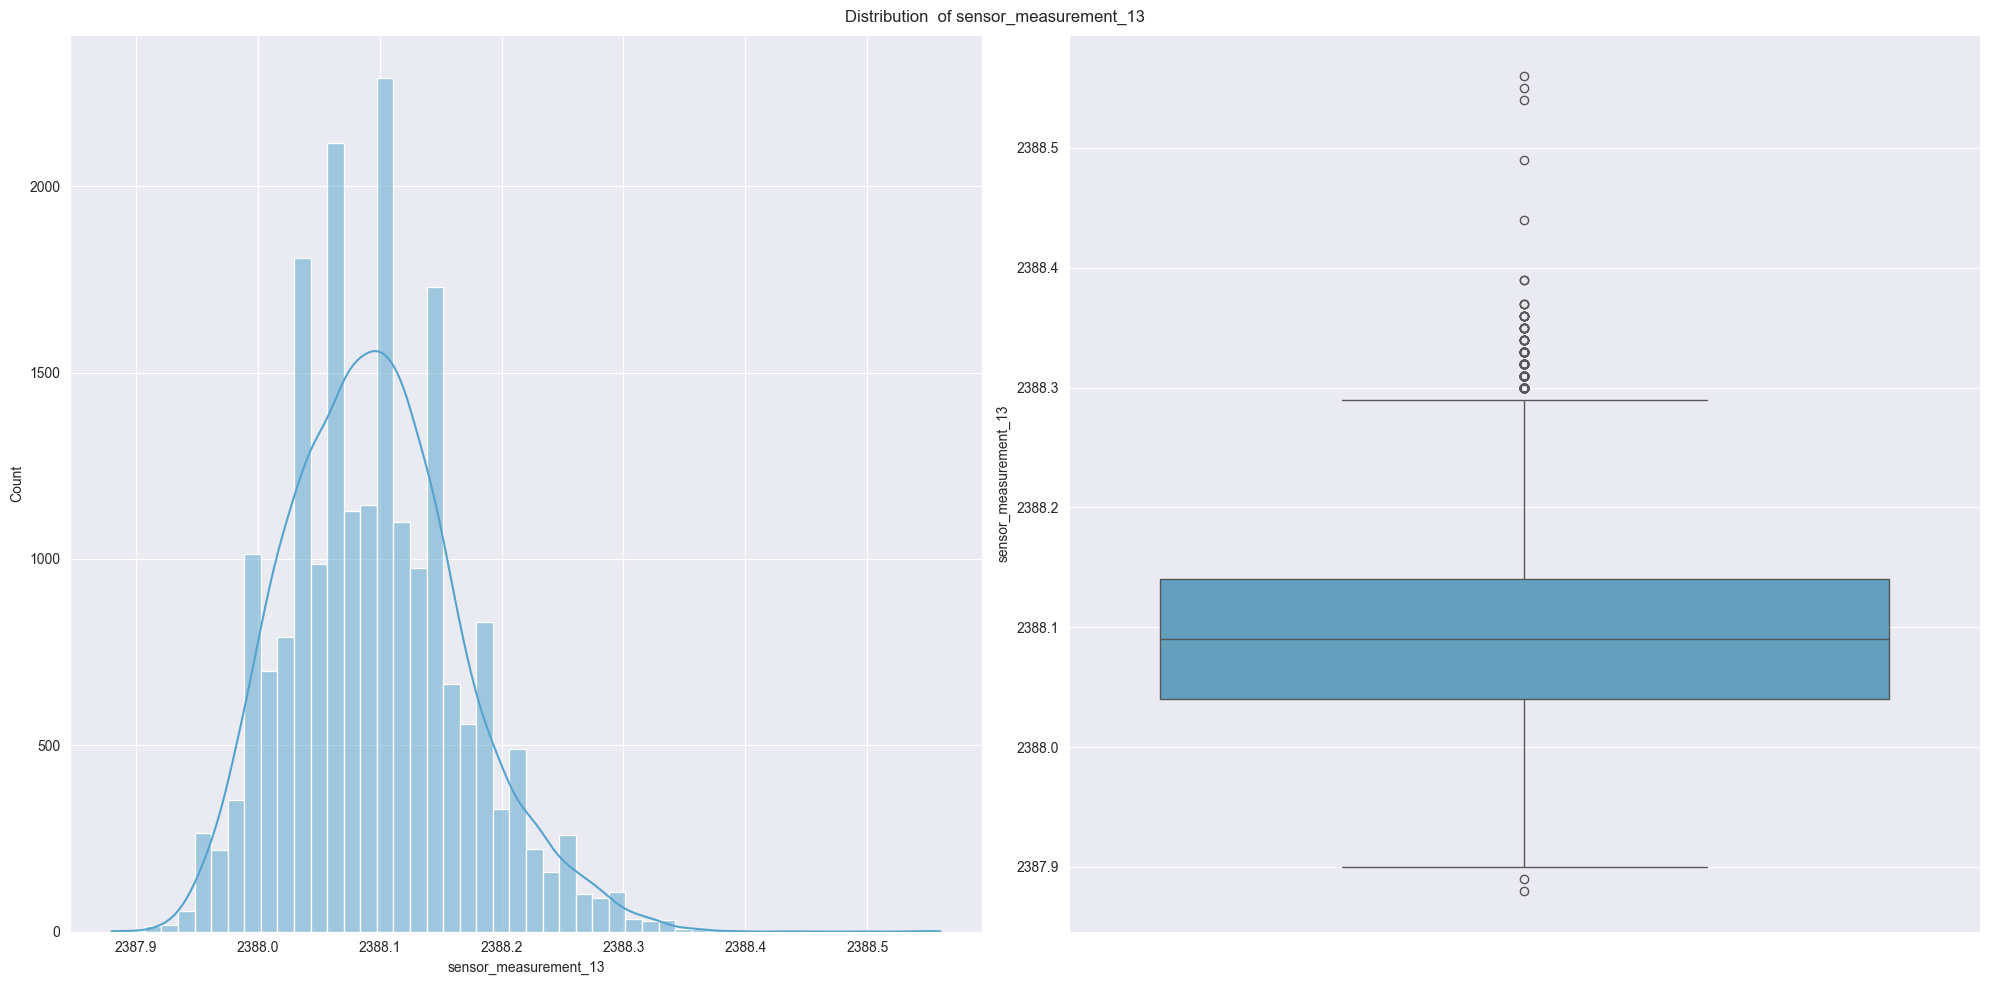

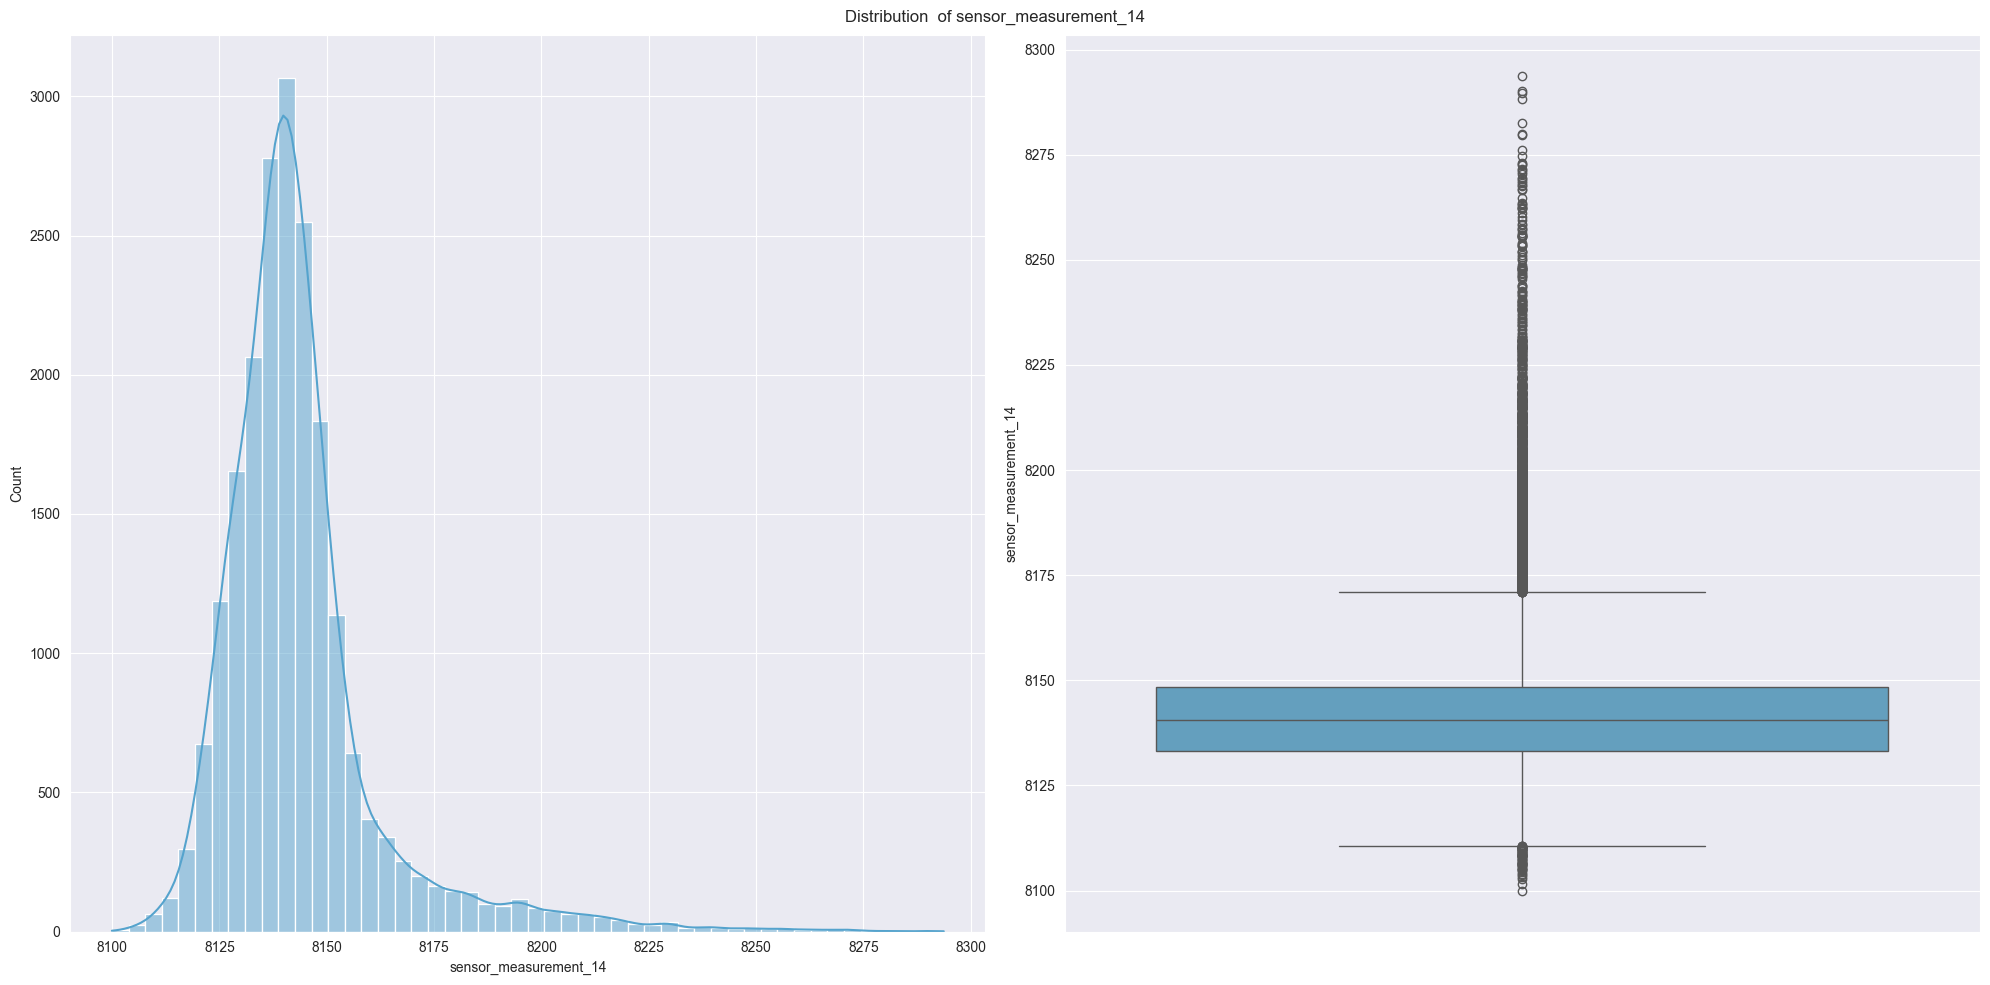

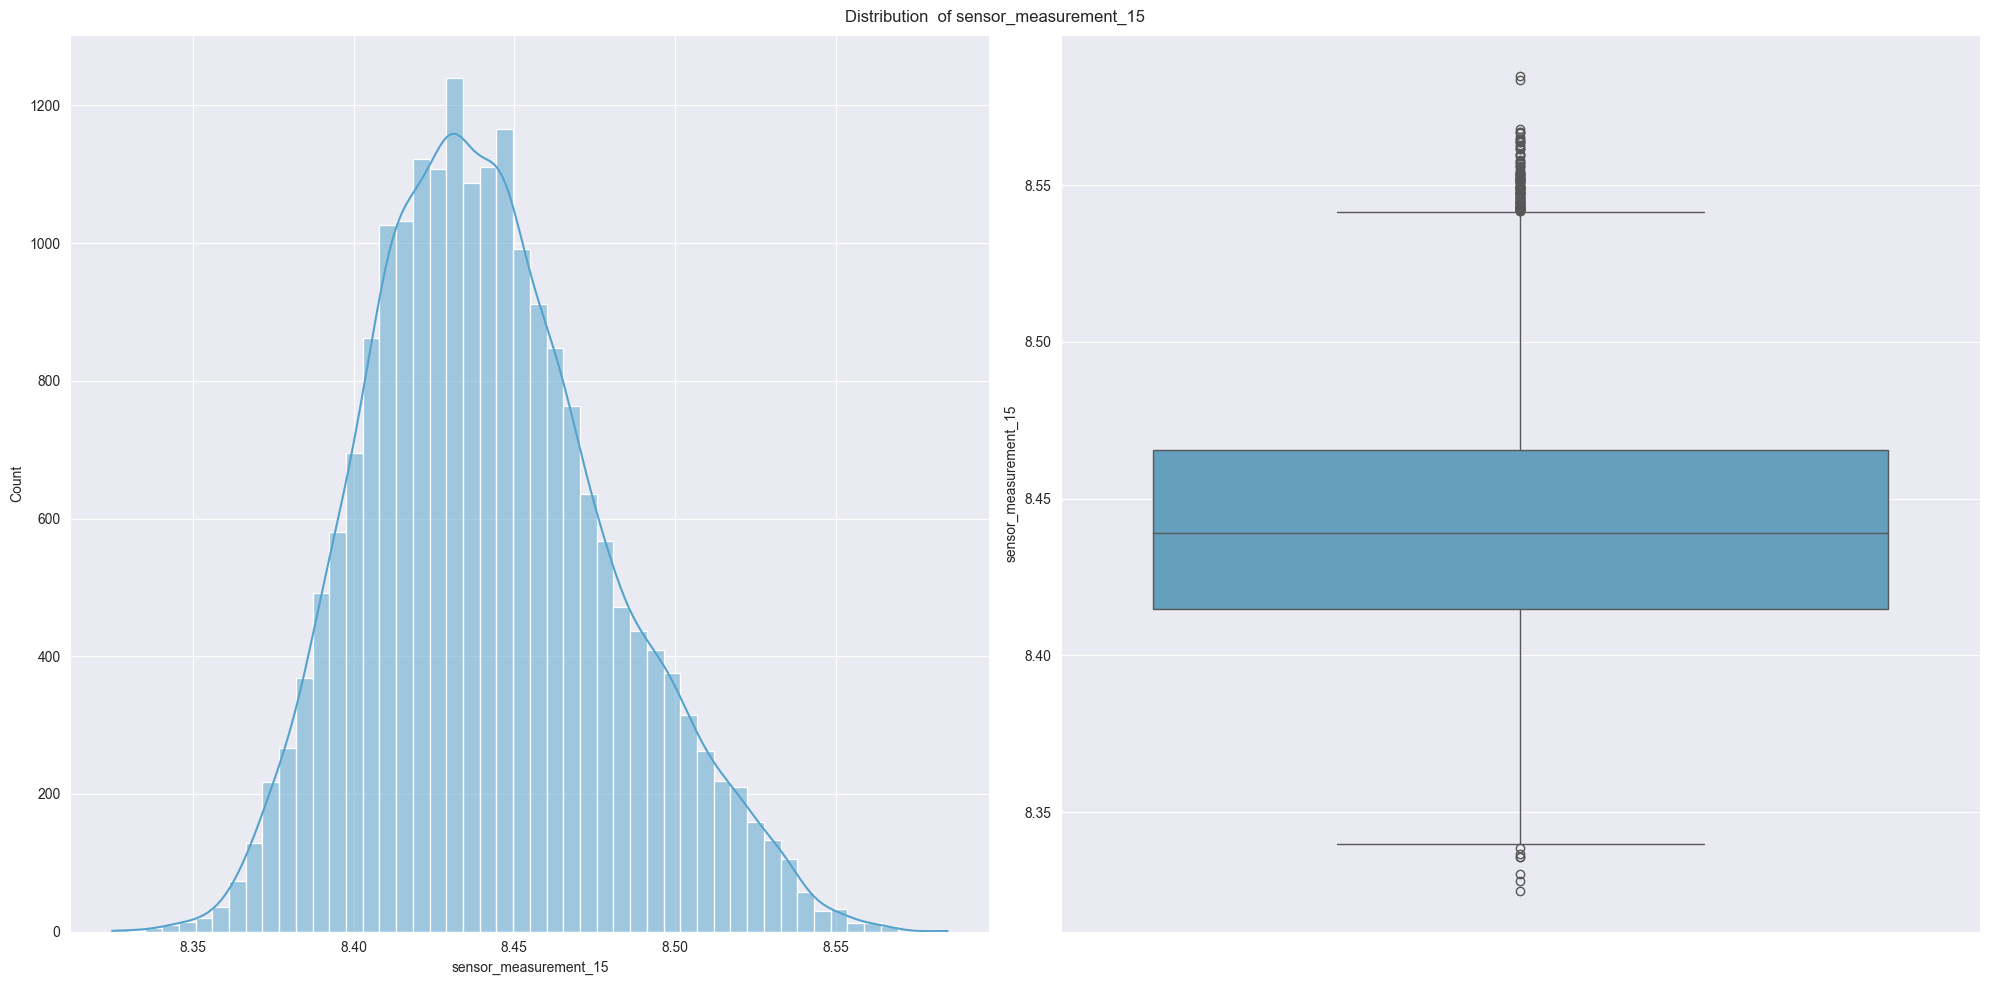

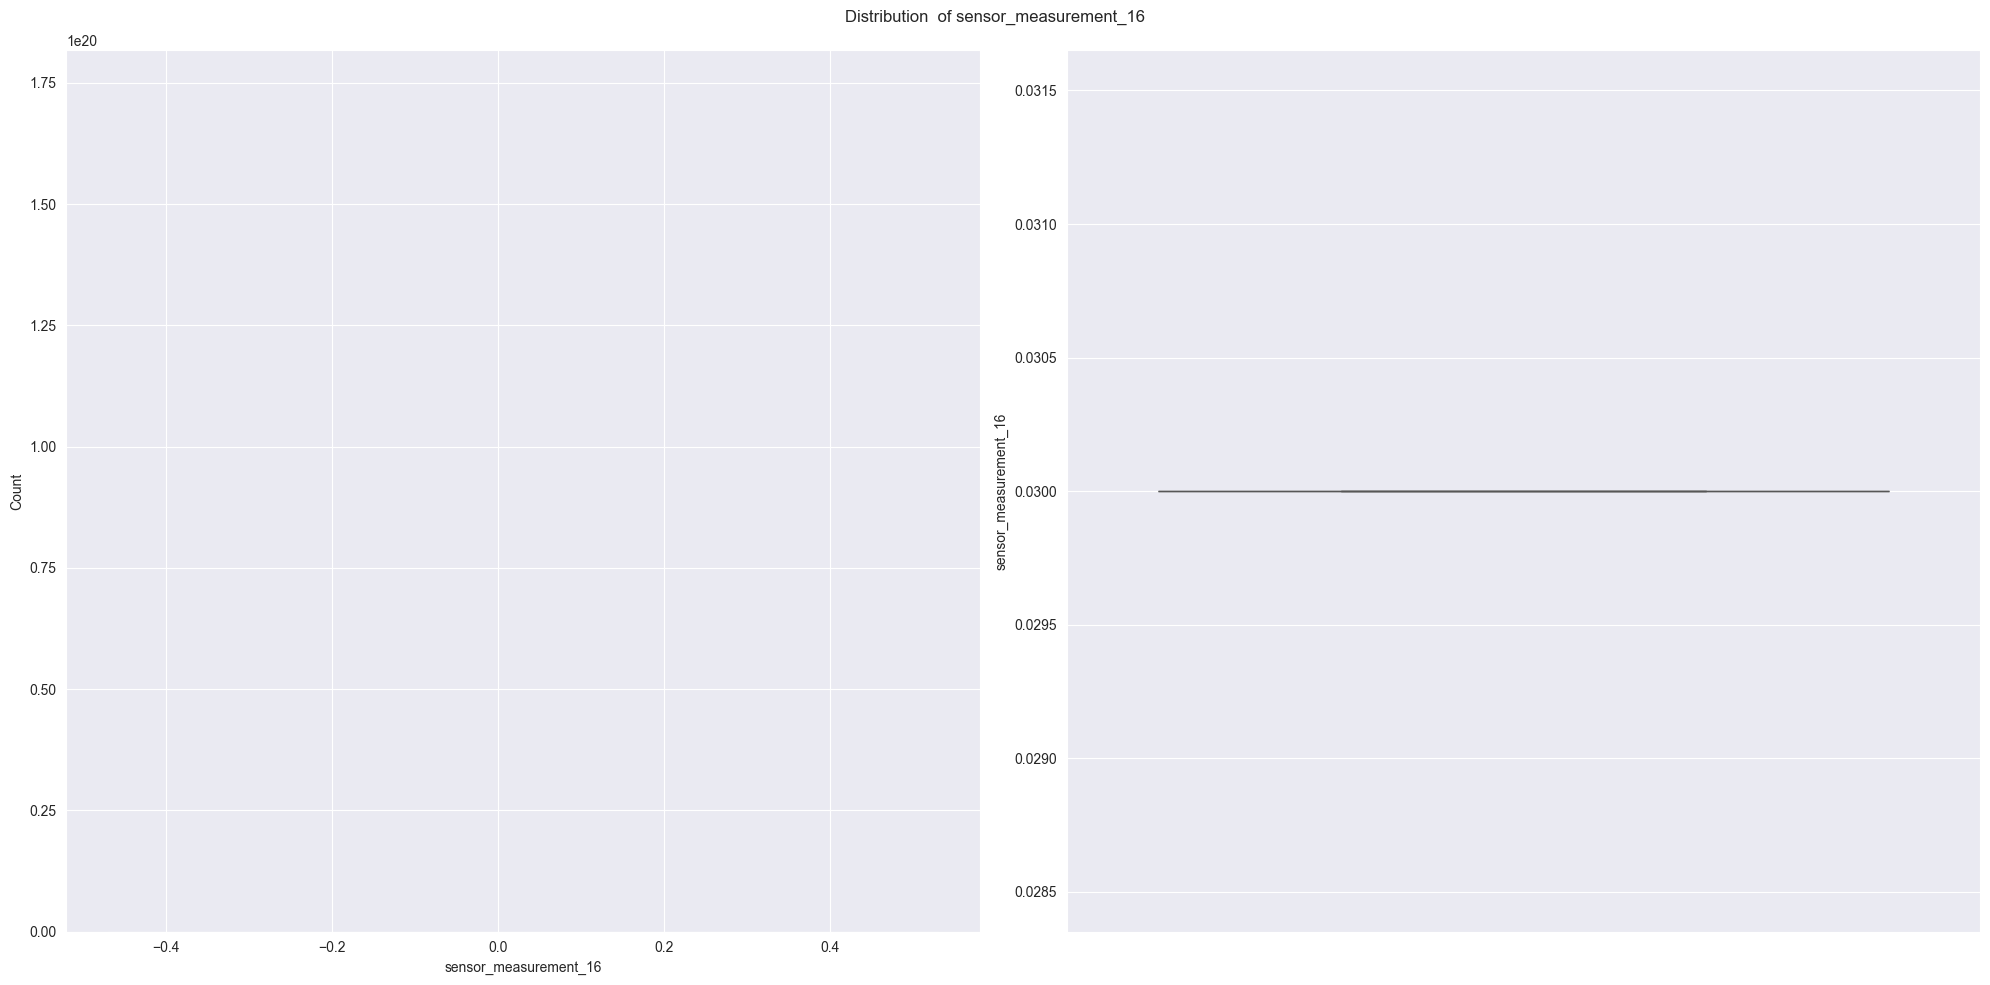

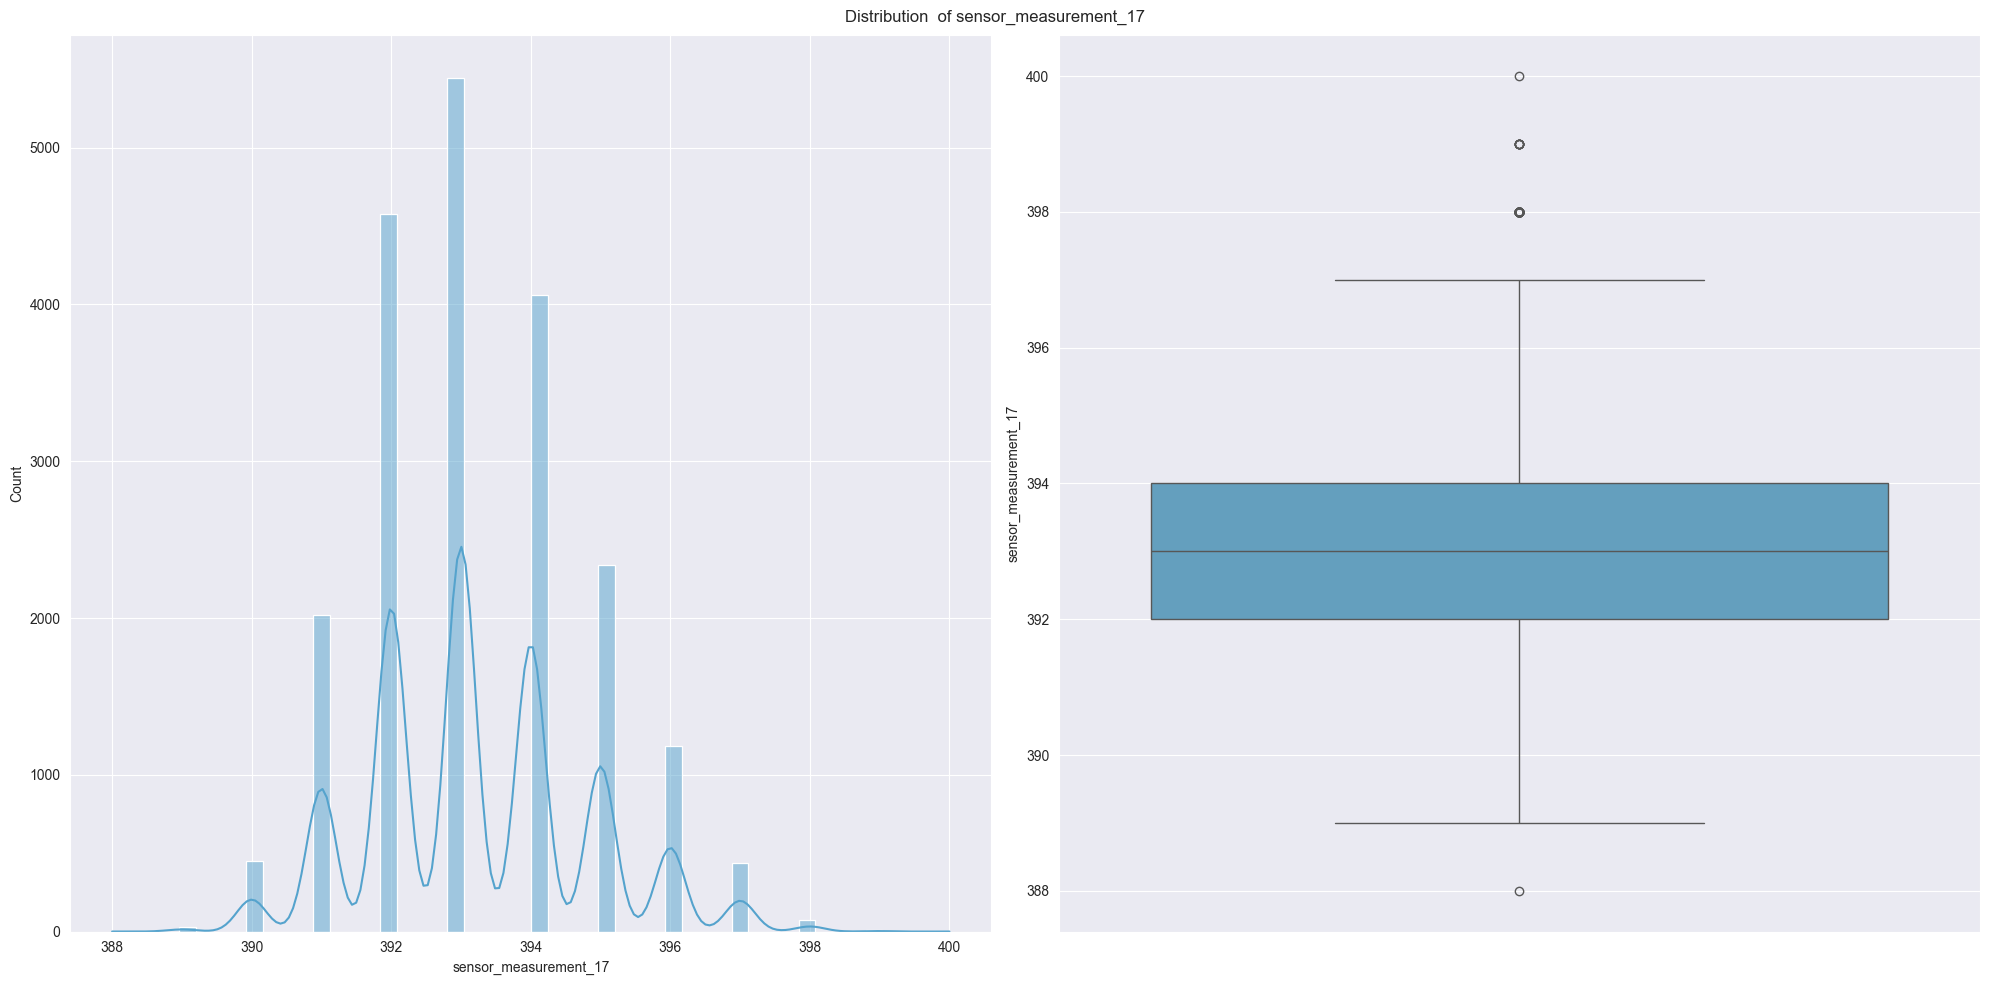

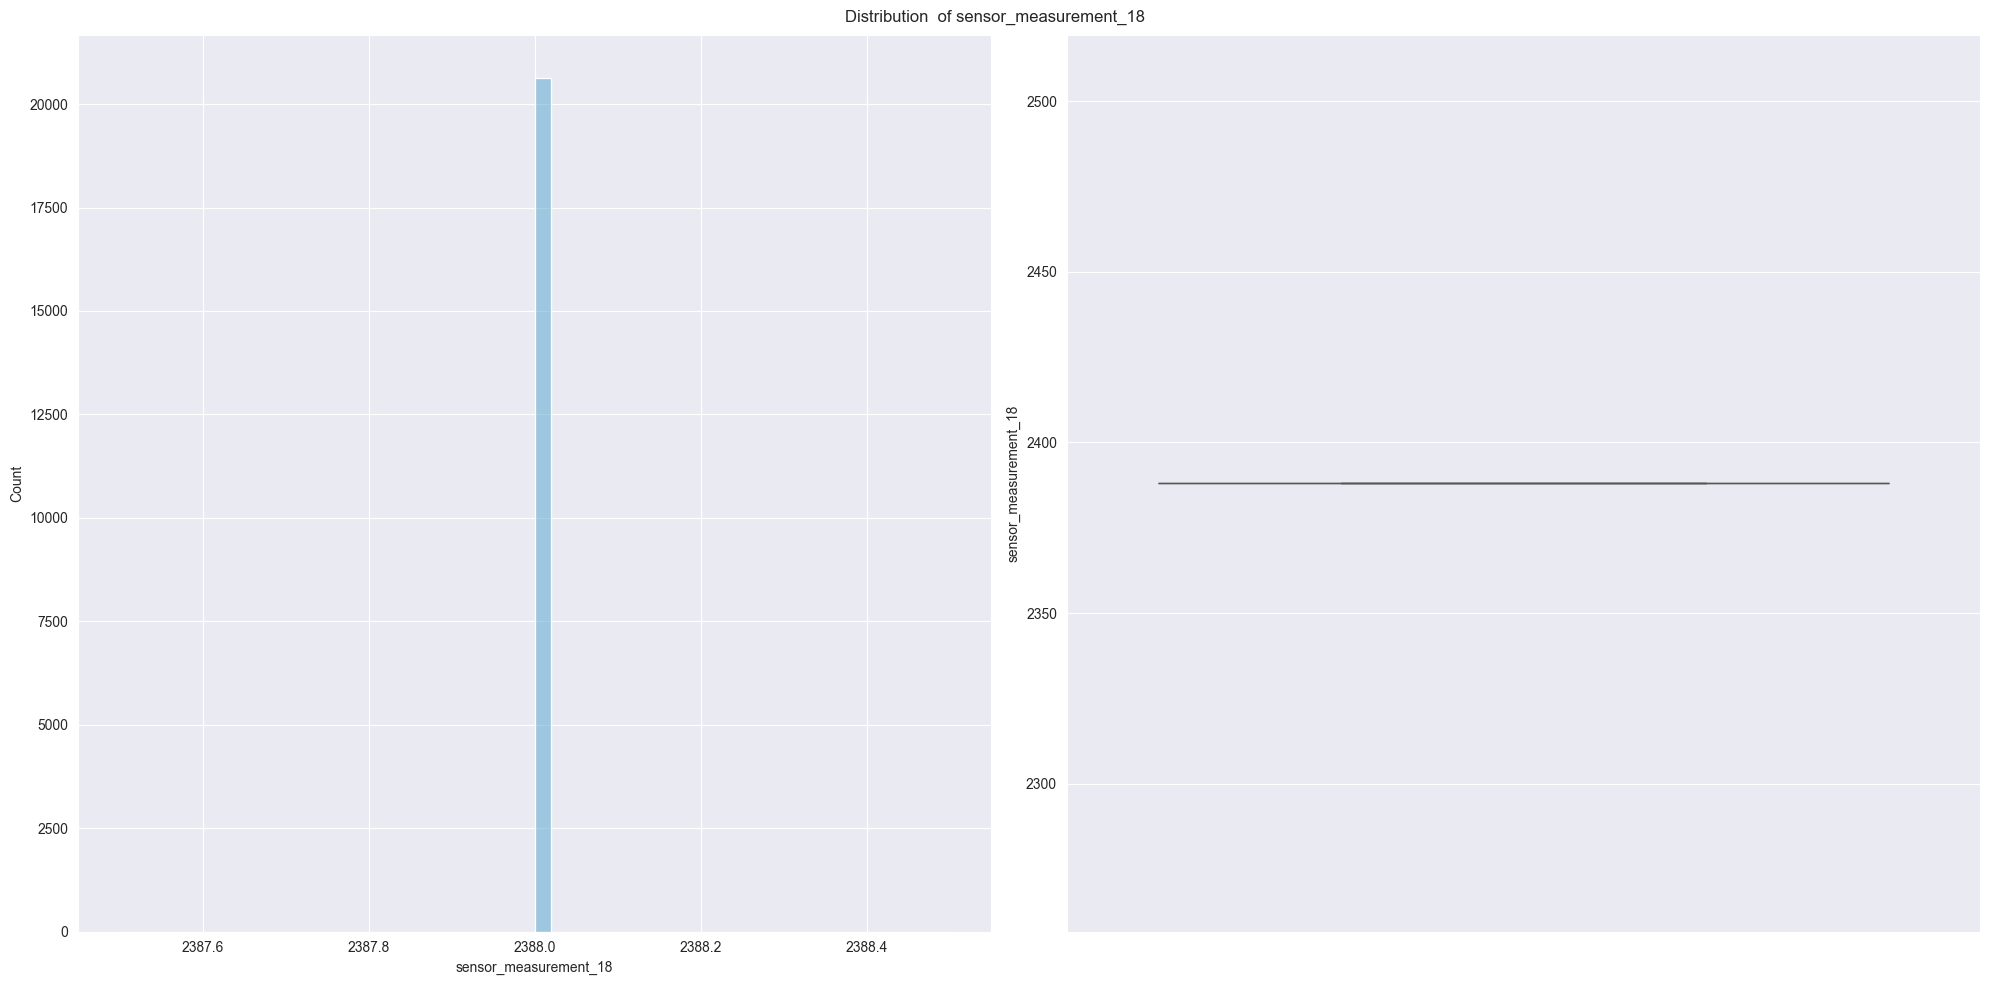

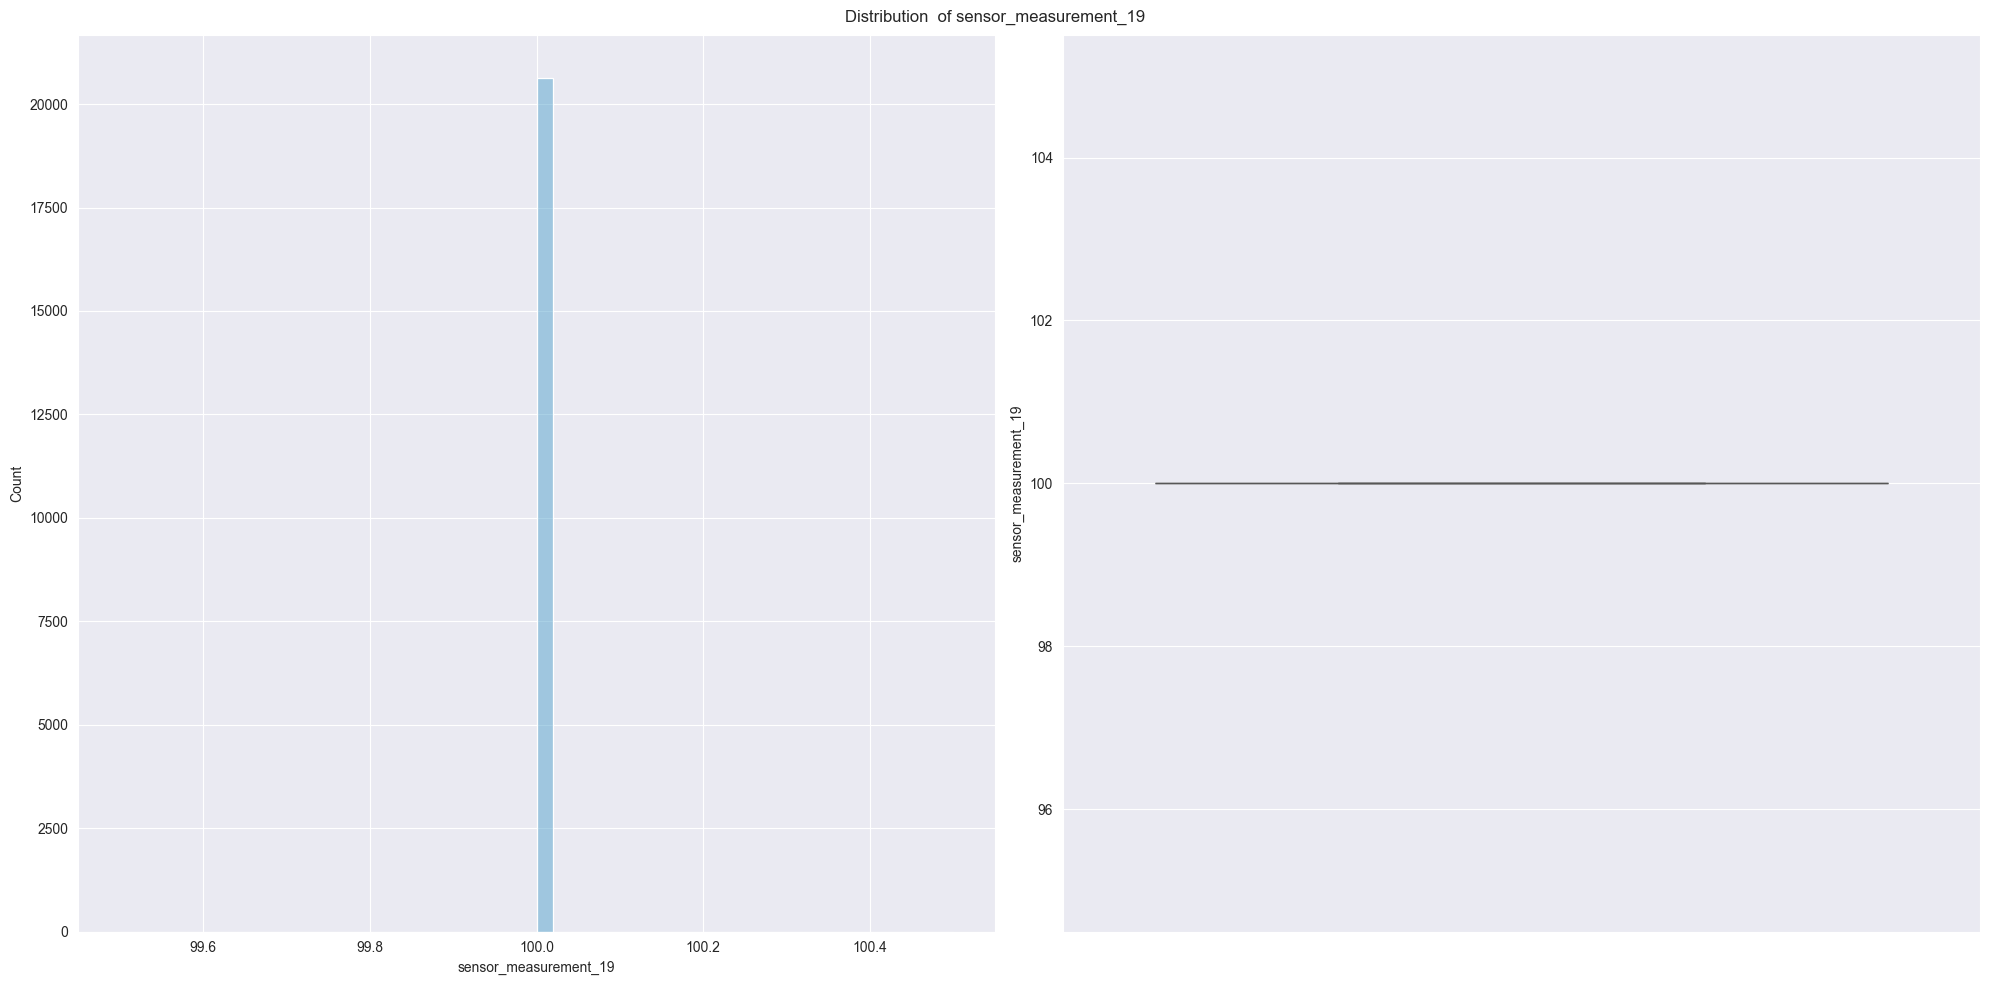

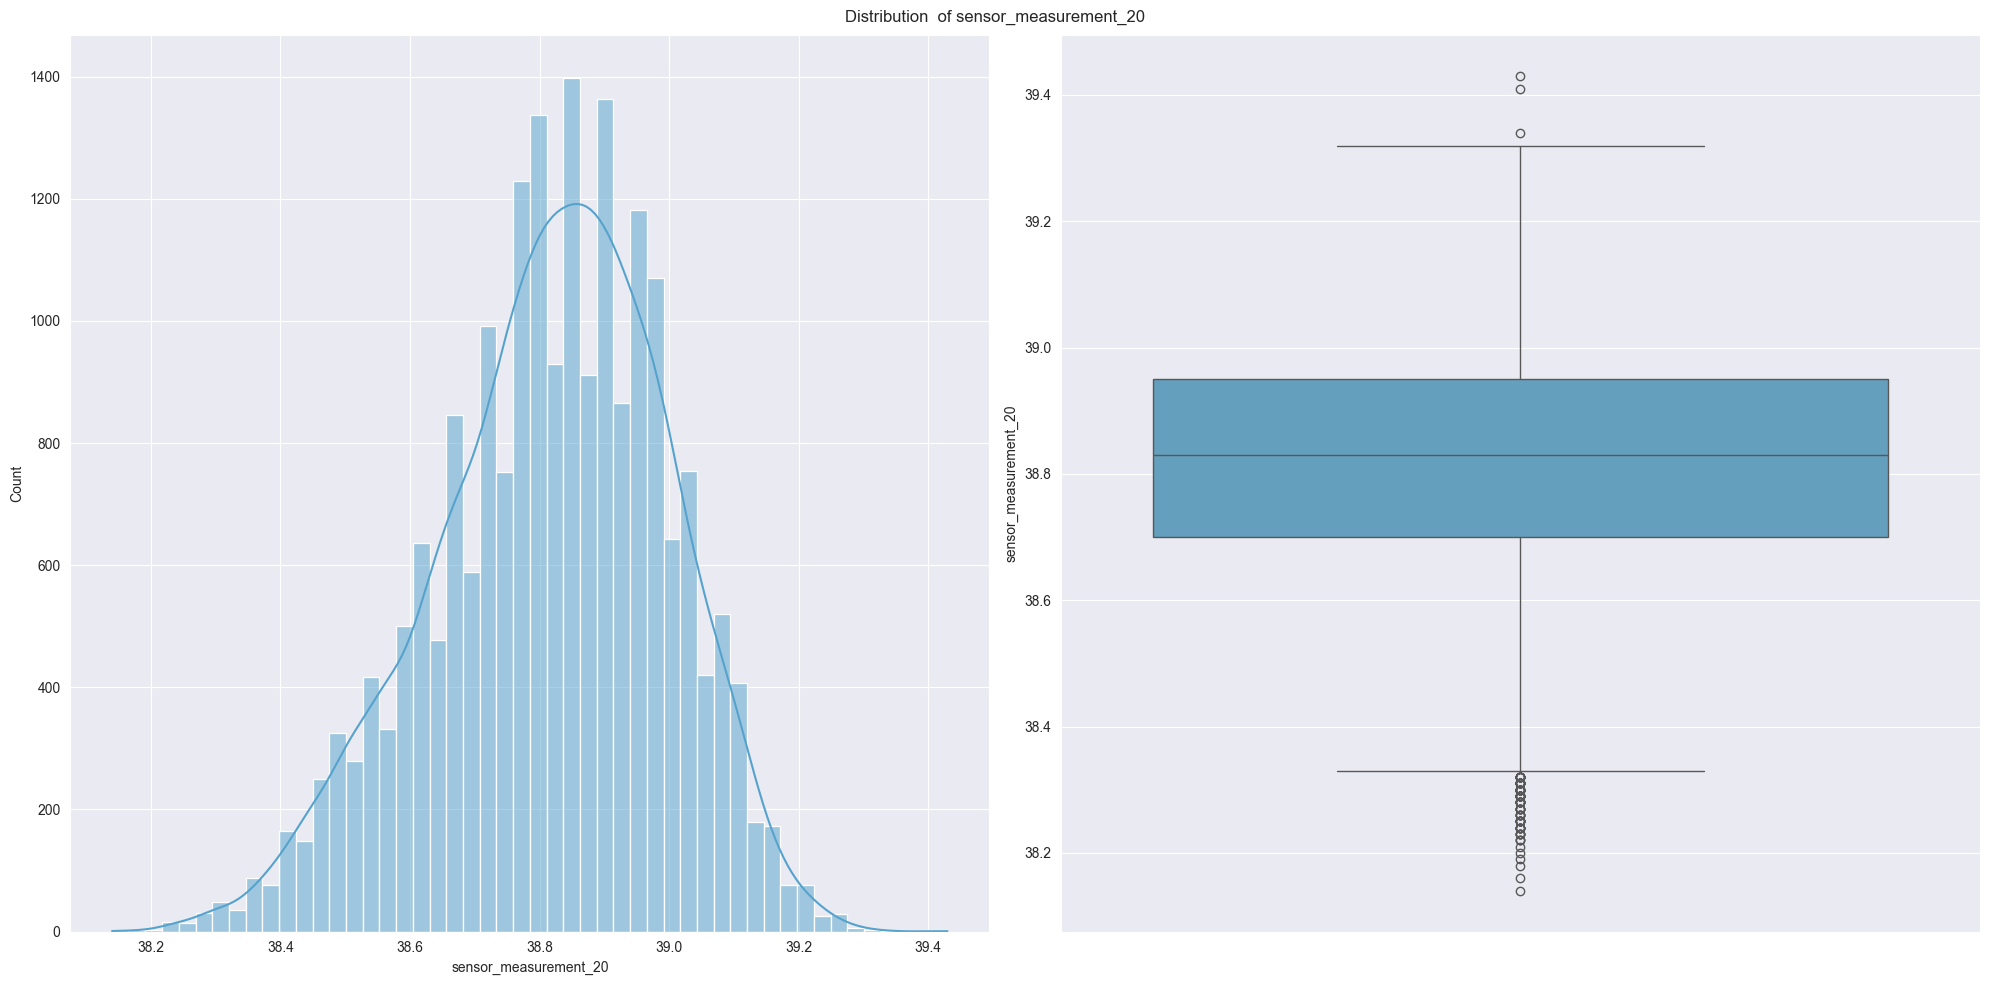

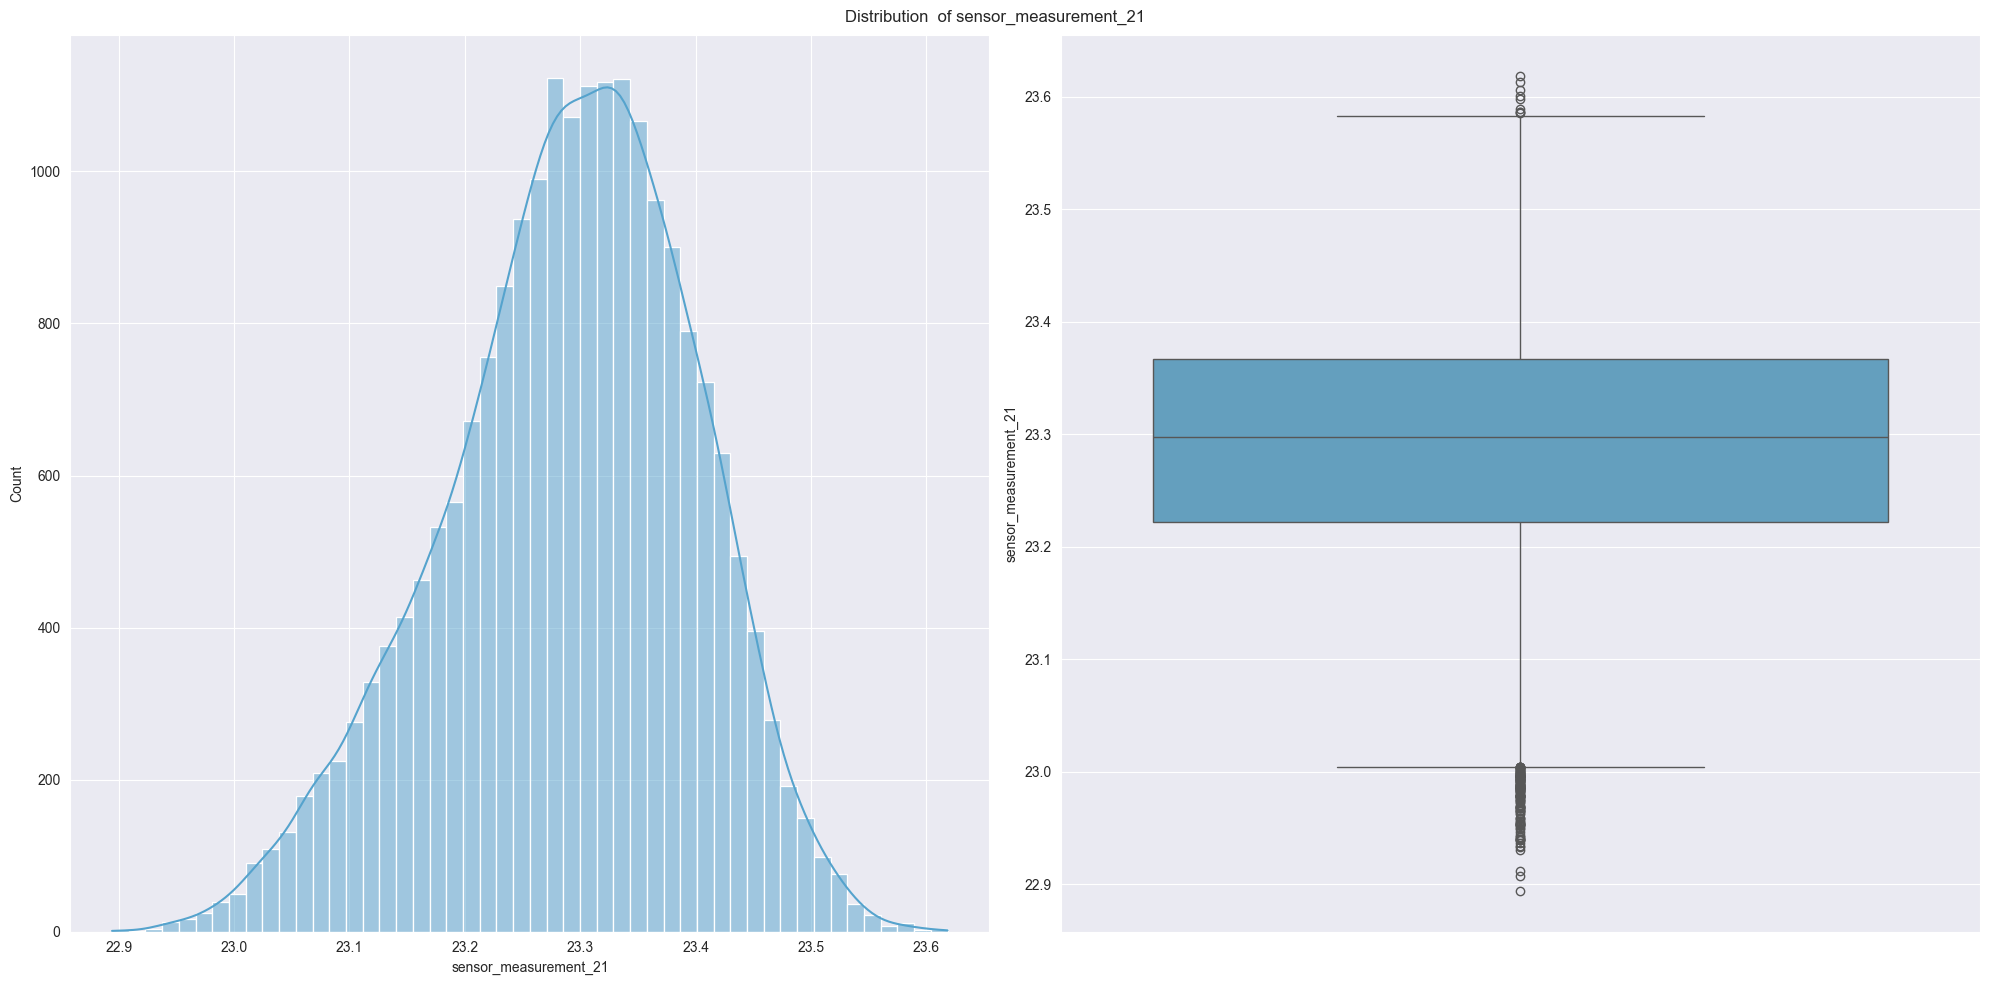

In [11]:
 # plotting the distributions of the sensors
sensor_col = train_df.iloc[:, 5:]

for col in sensor_col.columns:
    fig , ax = plt.subplots( 1 , 2 , figsize = ( 20 , 10 ) )
    sns.histplot(sensor_col[col], kde=True, bins=50, ax = ax[0])
    sns.boxplot( sensor_col[col] , ax = ax[1])
    plt.suptitle(f'Distribution  of {col}')
    plt.tight_layout()
    plt.show()

From the distibutions we can see that Seansot measurements 1,5,6,10,16,18,19 are completley flat which we can drop.
Most of the sensor measurements are are normaly distributes with slight skews but Sensors 9 , 13 , 14 are extremley skewed to the left 
Sensor 17 has a multimodial distribution therefore we will need to further analyze this sensor.

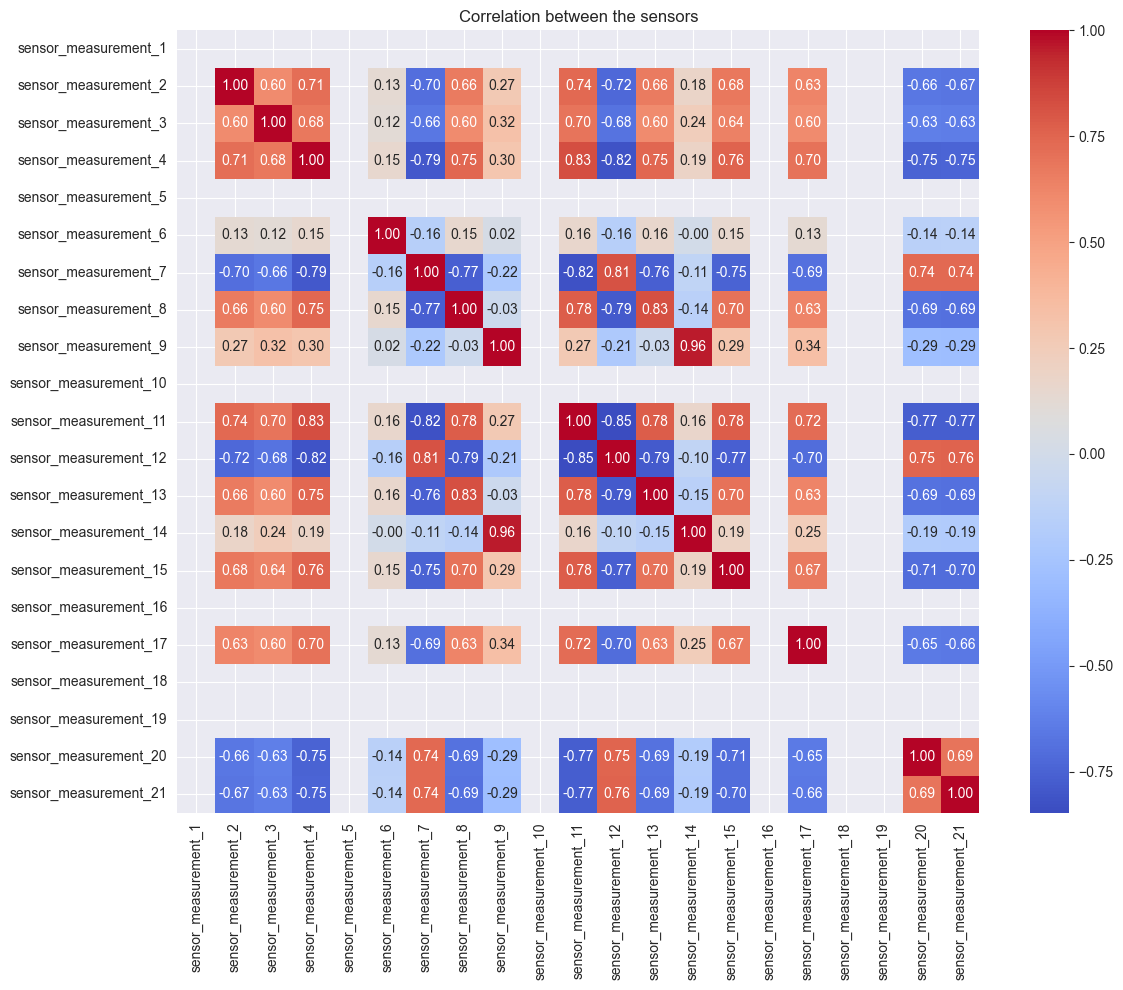

In [12]:
 # generating a heat map for correlation 
correlation = sensor_col.corr()

plt.figure(figsize=(12, 10))  
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between the sensors')
plt.tight_layout()
plt.show()


From the Correlation matrix we can see that the some of the sensor measurements are highly correlated with a corelation coeficient of 0.5 - 0.8 
while othe measurments like 1,5,10,16,18,19 have no correlation while 6 has extremley low correlation confirming that they can be dropped.

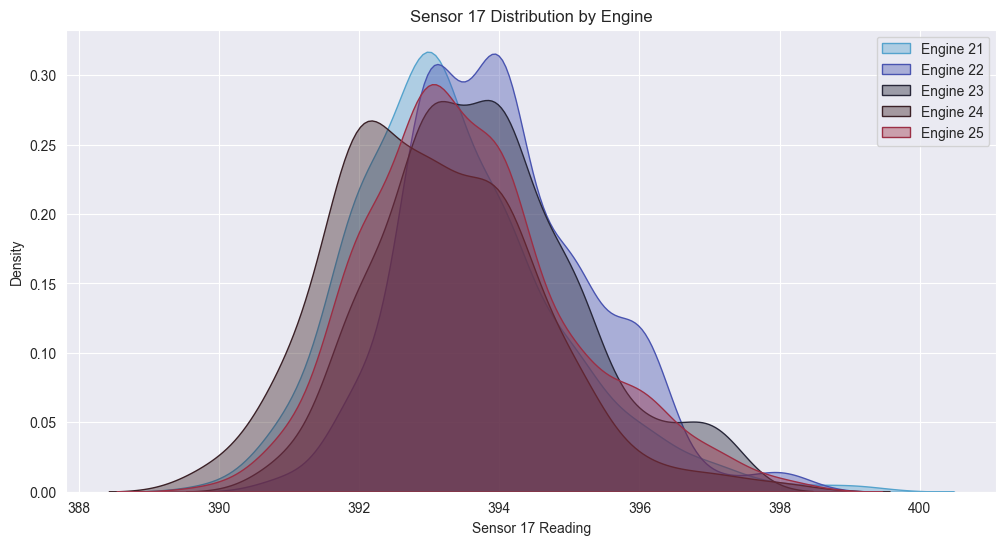

In [13]:
# Optional: pick a few engine_ids to avoid clutter
sample_engines = train_df['engine_id'].unique()[20:25]

plt.figure(figsize=(12, 6))

for engine in sample_engines:
    subset = train_df[train_df['engine_id'] == engine]
    sns.kdeplot(subset['sensor_measurement_17'], label=f'Engine {engine}', fill=True, alpha=0.4)

plt.title("Sensor 17 Distribution by Engine")
plt.xlabel("Sensor 17 Reading")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

We can see that from the selected engines the distributions peak from 392-394  which indicated that there exists a slight overlap but engine 21 slightly shifts to the right therefore indicating a slight separation 
I will therefore move to plotting the kde of engines by cycle.

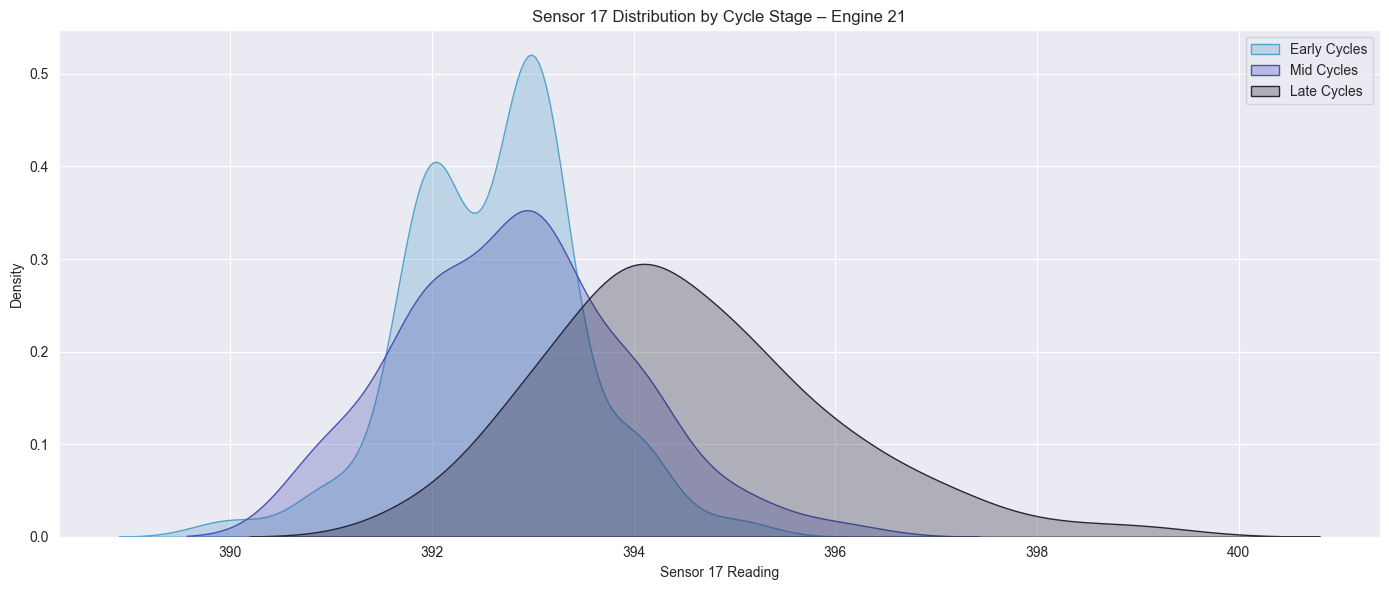

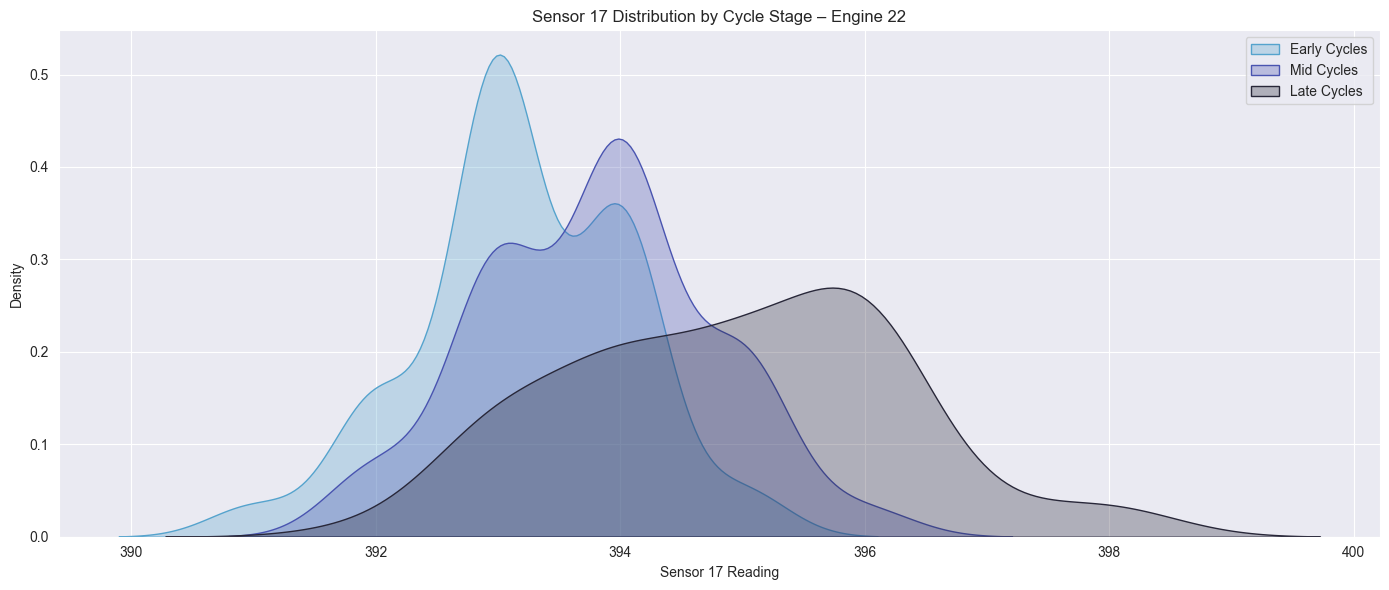

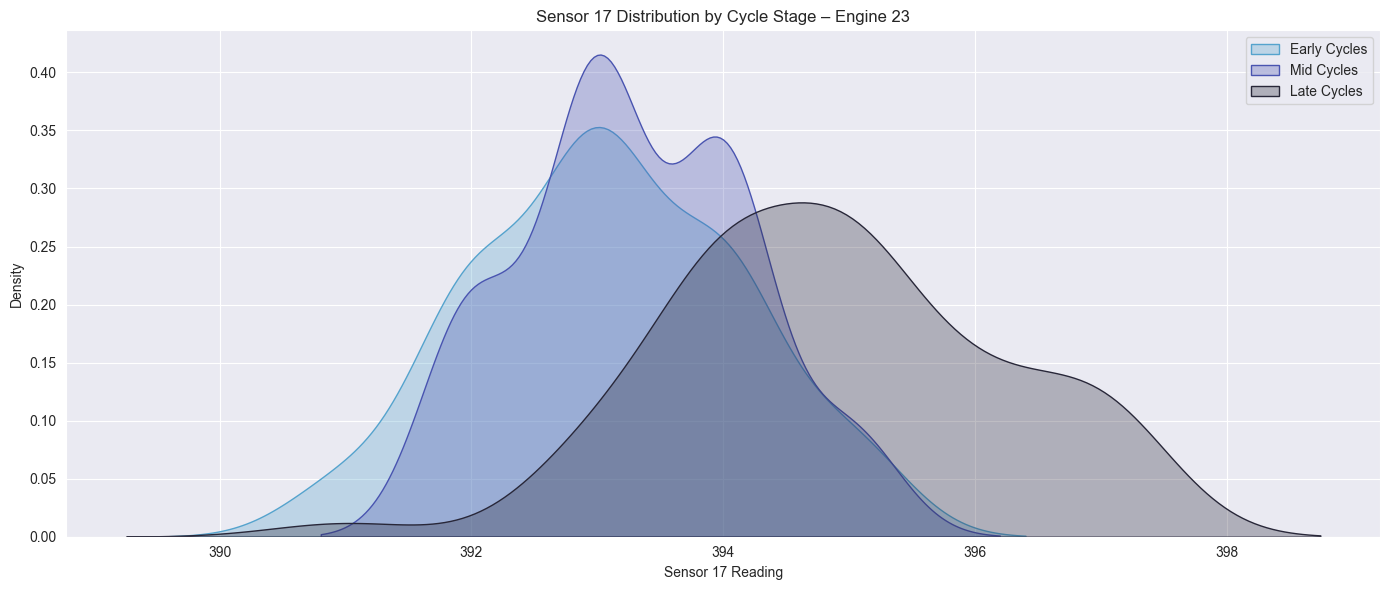

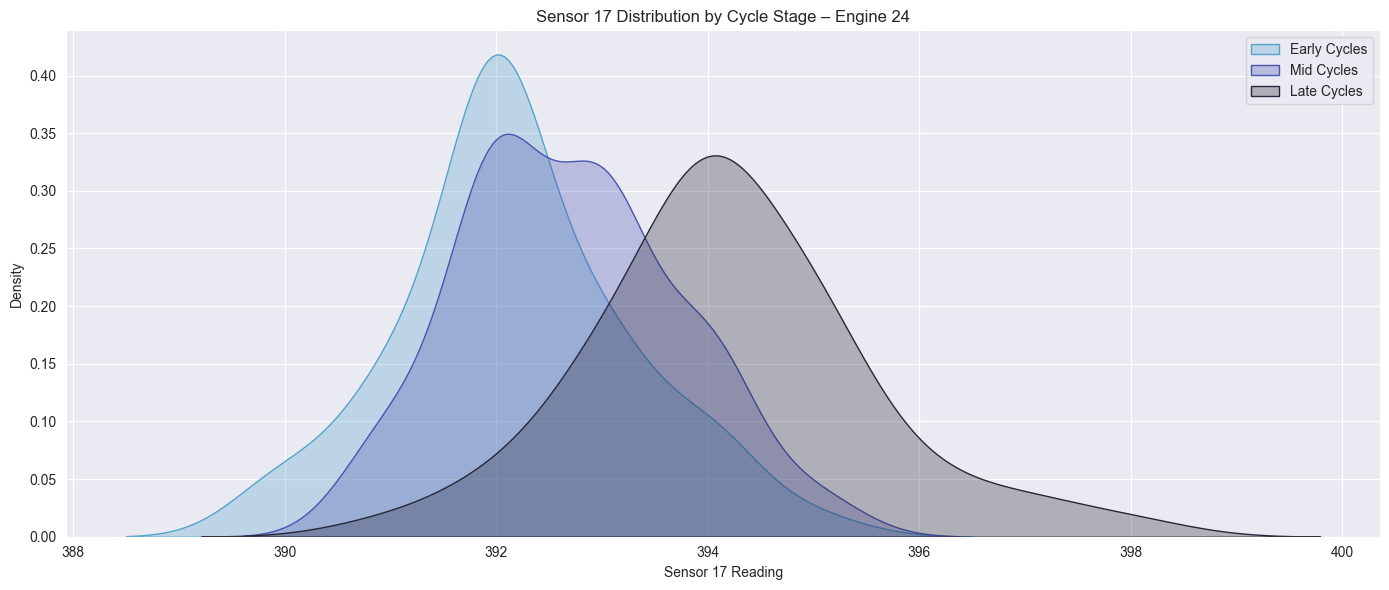

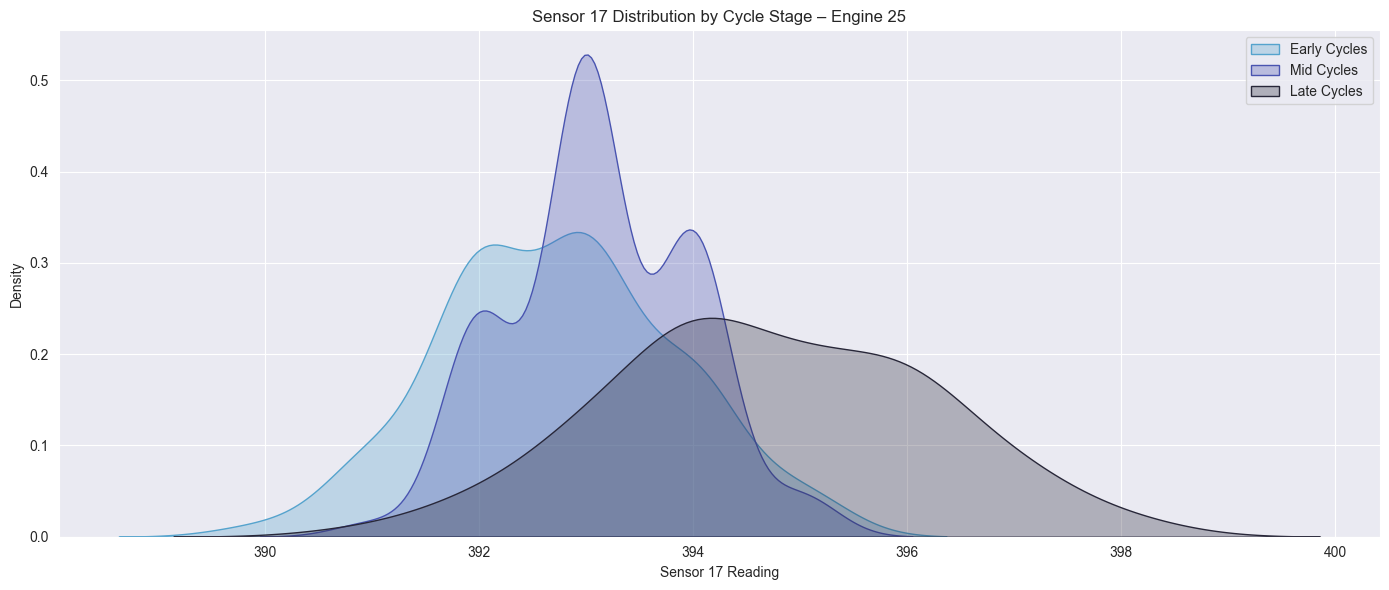

In [ ]:
for engine in sample_engines:
    engine_df = train_df[train_df['engine_id'] == engine]
    max_cycle = engine_df['cycle'].max()

    # Define cycle bins: early (0–33%), mid (34–66%), late (67–100%)
    bins = [1, int(max_cycle * 0.33), int(max_cycle * 0.66), max_cycle]
    labels = ['Early', 'Mid', 'Late']

    # Plot
    plt.figure(figsize=(14, 6))
    
    for i in range(3):
        stage_df = engine_df[
            (engine_df['cycle'] >= bins[i]) & 
            (engine_df['cycle'] <= bins[i + 1])
        ]
        sensor_data = stage_df['sensor_measurement_17']
        
        # Plot if there's more than one value (avoid 0 variance issues)
        if sensor_data.nunique() > 1:
            sns.kdeplot(sensor_data, label=f'{labels[i]} Cycles', fill=True, alpha=0.3)
        elif sensor_data.nunique() == 1:
            constant_value = sensor_data.iloc[0]
            plt.axvline(x=constant_value, linestyle='--', label=f'{labels[i]} (constant)')
    
    plt.title(f'Sensor 17 Distribution by Cycle Stage - Engine {engine}')
    plt.xlabel('Sensor 17 Reading')
    plt.ylabel('Density')
    plt.legend()
    plt.tight_layout()
    plt.show()